# 🌳 Complete Guide to Decision Trees

## 📚 Table of Contents
1. [What are Decision Trees?](#what-are-decision-trees)
2. [How Decision Trees Work](#how-decision-trees-work)
3. [Key Concepts](#key-concepts)
4. [Splitting Criteria](#splitting-criteria)
5. [Tree Parameters](#tree-parameters)
6. [Overfitting and Pruning](#overfitting-and-pruning)
7. [Advantages and Disadvantages](#advantages-and-disadvantages)
8. [Feature Importance](#feature-importance)
9. [Common Pitfalls](#common-pitfalls)
10. [Real-World Applications](#real-world-applications)
11. [Implementation Tips](#implementation-tips)

---

## 🤔 What are Decision Trees?

**Decision Trees** are a type of machine learning algorithm that makes decisions by asking a series of questions about the features of your data. Think of it like a flowchart or a game of "20 Questions" where each question helps narrow down the answer.

### 🎯 The Flowchart Analogy
Imagine deciding whether to go outside:
```
Is it raining?
├─ YES → Is it cold?
│         ├─ YES → Stay inside
│         └─ NO → Take umbrella, go out
└─ NO → Is it sunny?
          ├─ YES → Go outside
          └─ NO → Maybe go outside
```

This is exactly how a decision tree works! Each question is a **split**, each path is a **branch**, and each final answer is a **leaf**.

---

## ⚙️ How Decision Trees Work

### Step-by-Step Process:

1. **Start with all data** at the root of the tree
2. **Find the best question** to split the data (e.g., "Is age > 30?")
3. **Split the data** into groups based on the answer
4. **Repeat the process** for each group (recursive splitting)
5. **Stop when** you reach a stopping criterion
6. **Make predictions** by following the path from root to leaf

### 📊 Visual Example
```
Training Data: [Age, Income, Buy Car?]
[25, 30k, No], [35, 50k, Yes], [22, 25k, No], [45, 70k, Yes]...

Tree Building:
       Age > 30?
      /         \
    NO           YES
   /              \
Buy: No      Income > 40k?
            /            \
          NO              YES
         /                 \
    Buy: Maybe          Buy: Yes
```

---

## 🔑 Key Concepts

### 🌿 **Node**
A point in the tree where a decision is made. Contains a question about a feature.

### 🌱 **Root Node**
The very first node at the top of the tree. Contains the most important question.

### 🍃 **Leaf Node (Terminal Node)**
The final nodes that contain the predictions. No more questions are asked here.

### 🌿 **Internal Node**
Any node that isn't a root or leaf. Contains a question and has children.

### 🔀 **Split**
The process of dividing data based on a feature value (e.g., "Age > 30").

### 🌳 **Depth**
How many levels deep the tree goes. Depth = number of questions from root to deepest leaf.

### 🌿 **Purity**
How "clean" a node is. A pure node contains only one class (all Yes or all No).

### 📏 **Information Gain**
How much a split reduces uncertainty/impurity. Higher gain = better split.

---

## 📐 Splitting Criteria

Decision trees need to decide which questions to ask. They use **splitting criteria** to measure how good a split is:

### 1. **Gini Impurity** (Default)
- **What it measures**: How often a randomly chosen element would be incorrectly labeled
- **Formula**: Gini = 1 - Σ(probability of class i)²
- **Range**: 0 (pure) to 0.5 (maximum impurity for binary classification)
- **When to use**: Generally good default choice
- **Analogy**: How "mixed up" the classes are in a node

**Example**: 
- Node with [8 Yes, 2 No]: Gini = 1 - (0.8² + 0.2²) = 1 - (0.64 + 0.04) = 0.32
- Node with [10 Yes, 0 No]: Gini = 1 - (1² + 0²) = 0 (perfectly pure!)

### 2. **Entropy** (Information Theory)
- **What it measures**: Amount of disorder or uncertainty in the data
- **Formula**: Entropy = -Σ(probability of class i × log₂(probability of class i))
- **Range**: 0 (pure) to 1 (maximum entropy for binary classification)
- **When to use**: When you want slightly more balanced trees
- **Analogy**: How much "information" you need to describe the mix

**Example**:
- Node with [8 Yes, 2 No]: Entropy = -(0.8×log₂(0.8) + 0.2×log₂(0.2)) ≈ 0.72
- Node with [10 Yes, 0 No]: Entropy = 0 (perfectly pure!)

### 3. **Log Loss** (Cross-entropy)
- **What it measures**: Similar to entropy but optimized for probability estimates
- **When to use**: When you need well-calibrated probability predictions
- **Note**: Newer addition to scikit-learn

### 🤝 **Gini vs Entropy: Which to Choose?**
- **Performance**: Usually very similar results (< 1% difference)
- **Speed**: Gini is slightly faster (no logarithm calculation)
- **Interpretability**: Both are equally interpretable
- **Recommendation**: Start with Gini (default), try Entropy if you want to experiment

---

## 🎛️ Tree Parameters

Decision trees have several important parameters that control their behavior:

### 🌊 **max_depth**
- **What it controls**: Maximum number of levels in the tree
- **Default**: None (unlimited depth)
- **Effect**: 
  - Small values → Simple tree, may underfit
  - Large values → Complex tree, may overfit
- **Typical values**: 3-10 for most problems
- **Analogy**: How many questions you're allowed to ask

### 📊 **min_samples_split**
- **What it controls**: Minimum samples required to split an internal node
- **Default**: 2
- **Effect**: Higher values → Simpler tree, less overfitting
- **Typical values**: 2-20
- **Analogy**: "Don't bother splitting unless you have at least X examples"

### 🍃 **min_samples_leaf**
- **What it controls**: Minimum samples required to be at a leaf node
- **Default**: 1
- **Effect**: Higher values → Simpler tree, smoother decision boundaries
- **Typical values**: 1-10
- **Analogy**: "Each final answer must represent at least X examples"

### 🌟 **max_features**
- **What it controls**: Number of features to consider when looking for the best split
- **Default**: None (consider all features)
- **Options**: 
  - Integer: Use exactly that many features
  - Float: Use that fraction of features
  - "sqrt": Use √(total features)
  - "log2": Use log₂(total features)
- **Effect**: Lower values → More randomness, less overfitting
- **Used in**: Random Forests primarily

### ✂️ **ccp_alpha** (Cost Complexity Pruning)
- **What it controls**: Pruning strength
- **Default**: 0.0 (no pruning)
- **Effect**: Higher values → More aggressive pruning, simpler tree
- **Range**: 0.0 to some small positive value (e.g., 0.01)

---

## 🎯 Overfitting and Pruning

### 📈 **The Overfitting Problem**

Decision trees are **prone to overfitting** - they can memorize the training data rather than learning general patterns.

**Signs of Overfitting:**
- Perfect or near-perfect training accuracy (99-100%)
- Much lower test accuracy (e.g., 70-80%)
- Very deep tree with many nodes
- Each leaf contains very few samples

**Why it happens:**
- Trees keep splitting until each leaf is "pure"
- This creates very specific rules that don't generalize
- Like memorizing answers instead of understanding concepts

### ✂️ **Pruning Solutions**

**Pre-pruning (Early Stopping):**
- Stop growing the tree before it gets too complex
- Set limits on depth, min_samples_split, min_samples_leaf
- **Pros**: Fast, prevents overfitting during training
- **Cons**: Might stop too early, miss good splits

**Post-pruning (Cost Complexity Pruning):**
- Grow full tree, then remove less useful branches
- Balance tree complexity vs accuracy
- **Pros**: More sophisticated, finds better balance
- **Cons**: Slower (grow full tree first)

### 🎚️ **Finding the Right Balance**

```python
# Example of testing different depths
depths = [3, 5, 7, 10, None]
for depth in depths:
    tree = DecisionTreeClassifier(max_depth=depth)
    # Train and evaluate...
    # Look for: Train accuracy, Test accuracy, Gap between them
```

**Goal**: Find the depth where test accuracy is highest, not where training accuracy is highest!

---

## ✅ Advantages and Disadvantages

### ✅ **Advantages**

1. **Easy to Understand and Interpret**
   - Visual representation as flowchart
   - Can explain any prediction step-by-step
   - Non-experts can follow the logic

2. **No Data Preprocessing Required**
   - Handles numerical and categorical features
   - No need for feature scaling
   - Handles missing values reasonably well

3. **Feature Selection Built-in**
   - Automatically identifies important features
   - Ignores irrelevant features
   - Provides feature importance scores

4. **Fast Predictions**
   - Once trained, predictions are very fast
   - Just follow a path from root to leaf
   - O(log n) complexity for balanced trees

5. **Handles Non-linear Relationships**
   - Can capture complex interactions between features
   - No assumptions about data distribution
   - Works with any type of data

6. **Multi-class and Multi-output**
   - Naturally handles multiple classes
   - Can predict multiple targets simultaneously

### ❌ **Disadvantages**

1. **Prone to Overfitting**
   - Can memorize training data
   - High variance (small data changes → big tree changes)
   - Needs careful parameter tuning

2. **Biased Toward Features with Many Values**
   - Prefers features with more possible splits
   - Can favor continuous over categorical features
   - May create unfair advantages for some features

3. **Difficulty with Linear Relationships**
   - Inefficient at modeling simple linear relationships
   - Creates many splits for what could be one line
   - Other algorithms (linear regression) better for linear patterns

4. **Unstable**
   - Small changes in data can create very different trees
   - High variance in predictions
   - Ensemble methods (Random Forest) help with this

5. **Can Create Overly Complex Trees**
   - Without proper stopping criteria
   - Hard to interpret when very large
   - May not generalize well

---

## 🎯 Feature Importance

One of the most powerful aspects of decision trees is **feature importance** - understanding which features matter most for predictions.

### 📊 **How Feature Importance Works**

Decision trees calculate importance based on:
- **How often** a feature is used for splitting
- **How much** each split improves purity (reduces Gini/entropy)
- **How many samples** are affected by each split

**Formula**: Importance = (samples at node / total samples) × (impurity decrease)

### 🔍 **Interpreting Feature Importance**

```python
# Get feature importances
importances = tree.feature_importances_

# Values sum to 1.0
# Higher values = more important features
# 0.0 = feature never used in tree
```

**Example Interpretation:**
- Feature A: 0.45 → Very important (45% of decision-making)
- Feature B: 0.30 → Important (30% of decision-making)  
- Feature C: 0.15 → Somewhat important
- Feature D: 0.10 → Less important
- Feature E: 0.00 → Not used at all

### ⚠️ **Feature Importance Caveats**

1. **Only measures importance in THIS tree**
   - Different tree might rank features differently
   - Correlated features might randomly get chosen over others

2. **Biased toward numerical features**
   - Features with more possible splits get higher importance
   - Doesn't mean they're actually more predictive

3. **Local vs Global importance**
   - Tree shows importance for this specific dataset
   - May not generalize to new data

---

## 🚫 Common Pitfalls

### 1. **Default Parameters = Overfitting**
```python
# ❌ Dangerous - will likely overfit
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

# ✅ Better - control complexity
tree = DecisionTreeClassifier(max_depth=7, min_samples_split=10)
tree.fit(X_train, y_train)
```

### 2. **Ignoring Train vs Test Performance**
```python
# ❌ Only looking at training accuracy
print(f"Accuracy: {tree.score(X_train, y_train)}")

# ✅ Compare both training and test
print(f"Train accuracy: {tree.score(X_train, y_train)}")
print(f"Test accuracy: {tree.score(X_test, y_test)}")
# If train >> test, you're overfitting!
```

### 3. **Not Visualizing the Tree**
```python
# ✅ Always visualize small trees to understand them
from sklearn.tree import plot_tree
plt.figure(figsize=(12, 8))
plot_tree(tree, max_depth=3, feature_names=feature_names, 
          class_names=class_names, filled=True)
plt.show()
```

### 4. **Treating Feature Importance as Gospel**
- Feature importance is specific to your tree/data
- Correlated features might randomly get chosen
- Use as a guide, not absolute truth
- Consider multiple trees (Random Forest) for more stable importance

### 5. **Forgetting About Class Imbalance**
```python
# ✅ Handle imbalanced classes
tree = DecisionTreeClassifier(class_weight='balanced')
# Or provide custom weights
```

---

## 🌍 Real-World Applications

### 1. **Medical Diagnosis**
```
Chest Pain?
├─ YES → Age > 50?
│        ├─ YES → High Risk
│        └─ NO → Check BP...
└─ NO → Other symptoms?...
```
- Doctors can follow and trust the logic
- Explainable AI for critical decisions
- Can incorporate expert knowledge

### 2. **Credit Approval**
```
Income > $50k?
├─ YES → Credit Score > 700?
│        ├─ YES → APPROVE
│        └─ NO → Check debt ratio...
└─ NO → REJECT
```
- Must be explainable for regulatory compliance
- Clear rules for loan officers
- Can identify discriminatory patterns

### 3. **Customer Segmentation**
- Divide customers into groups for marketing
- "High spenders are young professionals with incomes > $75k"
- Marketing teams can easily understand and act on rules

### 4. **Fraud Detection**
```
Transaction Amount > $1000?
├─ YES → Time of day = Night?
│        ├─ YES → Location = Foreign?
│        │        ├─ YES → FLAG FRAUD
│        │        └─ NO → Check history...
│        └─ NO → NORMAL
└─ NO → NORMAL
```

### 5. **Manufacturing Quality Control**
- "If temperature > 180°F AND pressure < 50 PSI → Defective"
- Engineers can understand and fix root causes
- Clear rules for automated systems

### 6. **Sports Analytics**
- Player performance prediction
- Game strategy (when to punt, go for it, etc.)
- Draft picks based on player characteristics

---

## 💡 Implementation Tips

### 🔧 **sklearn Implementation Pattern**

```python
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# 1. Start with basic tree
tree = DecisionTreeClassifier(random_state=42)

# 2. Try different max_depth values
depths = [3, 5, 7, 10, 15, None]
best_depth = None
best_score = 0

for depth in depths:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    scores = cross_val_score(tree, X_train, y_train, cv=5)
    if scores.mean() > best_score:
        best_score = scores.mean()
        best_depth = depth

# 3. Train final model
final_tree = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
final_tree.fit(X_train, y_train)

# 4. Evaluate
train_score = final_tree.score(X_train, y_train)
test_score = final_tree.score(X_test, y_test)
print(f"Train: {train_score:.3f}, Test: {test_score:.3f}")

# 5. Visualize (if not too big)
if final_tree.tree_.node_count < 50:
    plt.figure(figsize=(15, 10))
    plot_tree(final_tree, filled=True, feature_names=feature_names)
    plt.show()

# 6. Feature importance
importances = final_tree.feature_importances_
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values('importance', ascending=False)
print(feature_importance_df.head(10))
```

### 🚀 **Performance Tips**

1. **Start Simple, Then Complexify**
   - Begin with max_depth=5
   - Increase only if needed and test score improves

2. **Use Cross-Validation**
   - Don't trust single train/test split
   - Use 5-fold or 10-fold cross-validation

3. **Consider Random Forest**
   - Usually better performance than single tree
   - More stable feature importance
   - Built-in overfitting protection

4. **Prune Aggressively**
   - Better to underfit slightly than overfit badly
   - Use validation curve to find optimal complexity

### 🧪 **Experimentation Checklist**

- [ ] Try different max_depth values (3, 5, 7, 10, 15)
- [ ] Test min_samples_split (2, 5, 10, 20)
- [ ] Test min_samples_leaf (1, 5, 10)
- [ ] Compare Gini vs Entropy
- [ ] Visualize tree structure (if small enough)
- [ ] Check feature importances
- [ ] Compare with Random Forest
- [ ] Use cross-validation for all comparisons
- [ ] Check for overfitting (train vs test gap)

---

## 🎓 Key Takeaways

### 🌟 **Decision Trees are Great For:**
- **Interpretability** - everyone can understand the decisions
- **Mixed data types** - handles numerical and categorical naturally  
- **Feature selection** - automatically finds important features
- **Non-linear patterns** - captures complex relationships
- **Baseline models** - quick to try and often surprisingly good

### ⚠️ **Decision Trees Struggle With:**
- **Overfitting** - memorizes training data too easily
- **Instability** - small data changes create very different trees
- **Linear relationships** - inefficient compared to linear models
- **Bias** - favors features with many possible values

### 🎯 **Best Practices:**
1. **Always limit complexity** (max_depth, min_samples_split)
2. **Compare training vs test performance** to detect overfitting
3. **Use cross-validation** for reliable performance estimates
4. **Visualize small trees** to understand decision logic
5. **Consider Random Forest** for better performance
6. **Interpret feature importance carefully** - it's tree-specific

### 🚀 **When to Use Decision Trees:**
- Need interpretable models
- Mixed data types
- Want to understand feature importance
- Baseline comparison with other algorithms
- Domain experts need to validate logic

### 🚫 **When NOT to Use Decision Trees:**
- Linear relationships dominate
- Very high-dimensional data
- Need most accurate predictions (use Random Forest instead)
- Data has lots of noise
- Small datasets (prone to overfitting)

---

*Remember: Decision trees are like a conversation with your data - they ask questions and follow logical paths to reach conclusions. Master the art of asking the right questions (parameter tuning) and you'll have a powerful, interpretable tool! 🌳*

Decision Tree Classifier Teaching Experiments

TREE DEPTH AND OVERFITTING
Depth 1        : Train=0.200, Test=0.193, Gap=0.008, Nodes=   3
Depth 2        : Train=0.322, Test=0.311, Gap=0.011, Nodes=   7
Depth 3        : Train=0.492, Test=0.480, Gap=0.013, Nodes=  15
Depth 5        : Train=0.706, Test=0.672, Gap=0.033, Nodes=  53
Depth 7        : Train=0.911, Test=0.826, Gap=0.085, Nodes= 117
Depth 10       : Train=0.994, Test=0.857, Gap=0.136, Nodes= 227
Depth 15       : Train=1.000, Test=0.852, Gap=0.148, Nodes= 241
Depth 20       : Train=1.000, Test=0.852, Gap=0.148, Nodes= 241
Depth Unlimited: Train=1.000, Test=0.852, Gap=0.148, Nodes= 241

SPLITTING CRITERIA COMPARISON

Digits Dataset:
------------------------------
  gini    : Train=0.994, Test=0.857
  entropy : Train=1.000, Test=0.828
  log_loss: Train=1.000, Test=0.828

Wine Dataset:
------------------------------
  gini    : Train=1.000, Test=0.963
  entropy : Train=1.000, Test=0.907
  log_loss: Train=1.000, Test=0.907

Breast C

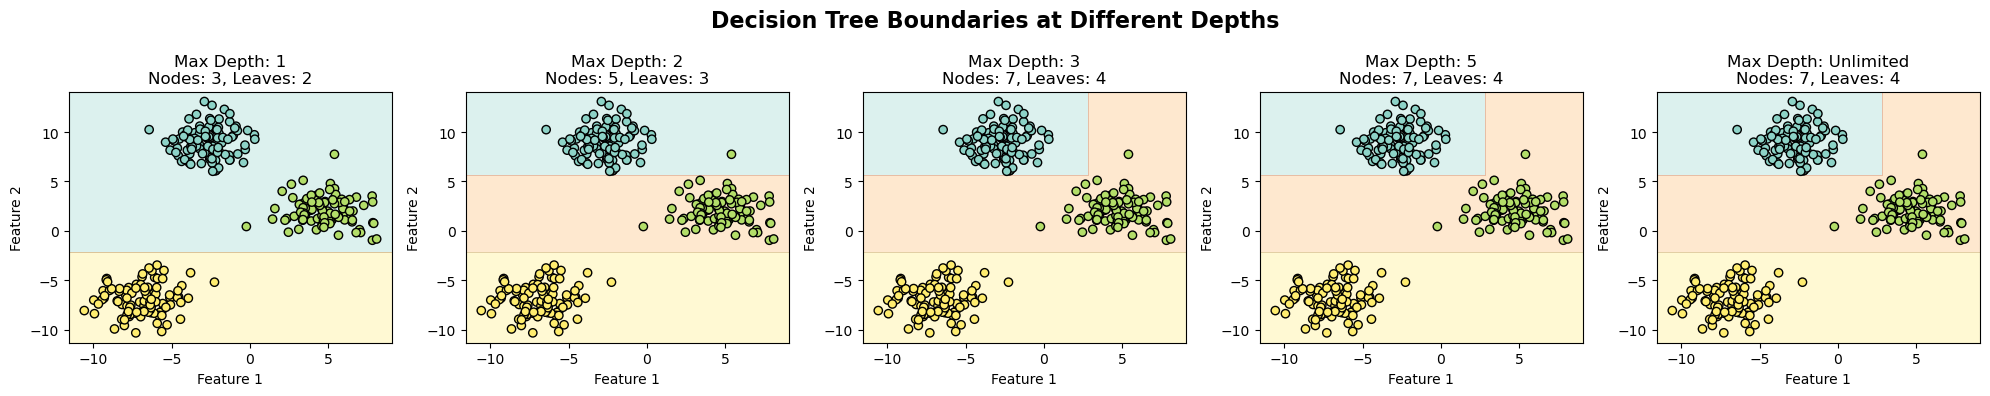

🔍 Observe how deeper trees create more complex decision boundaries!


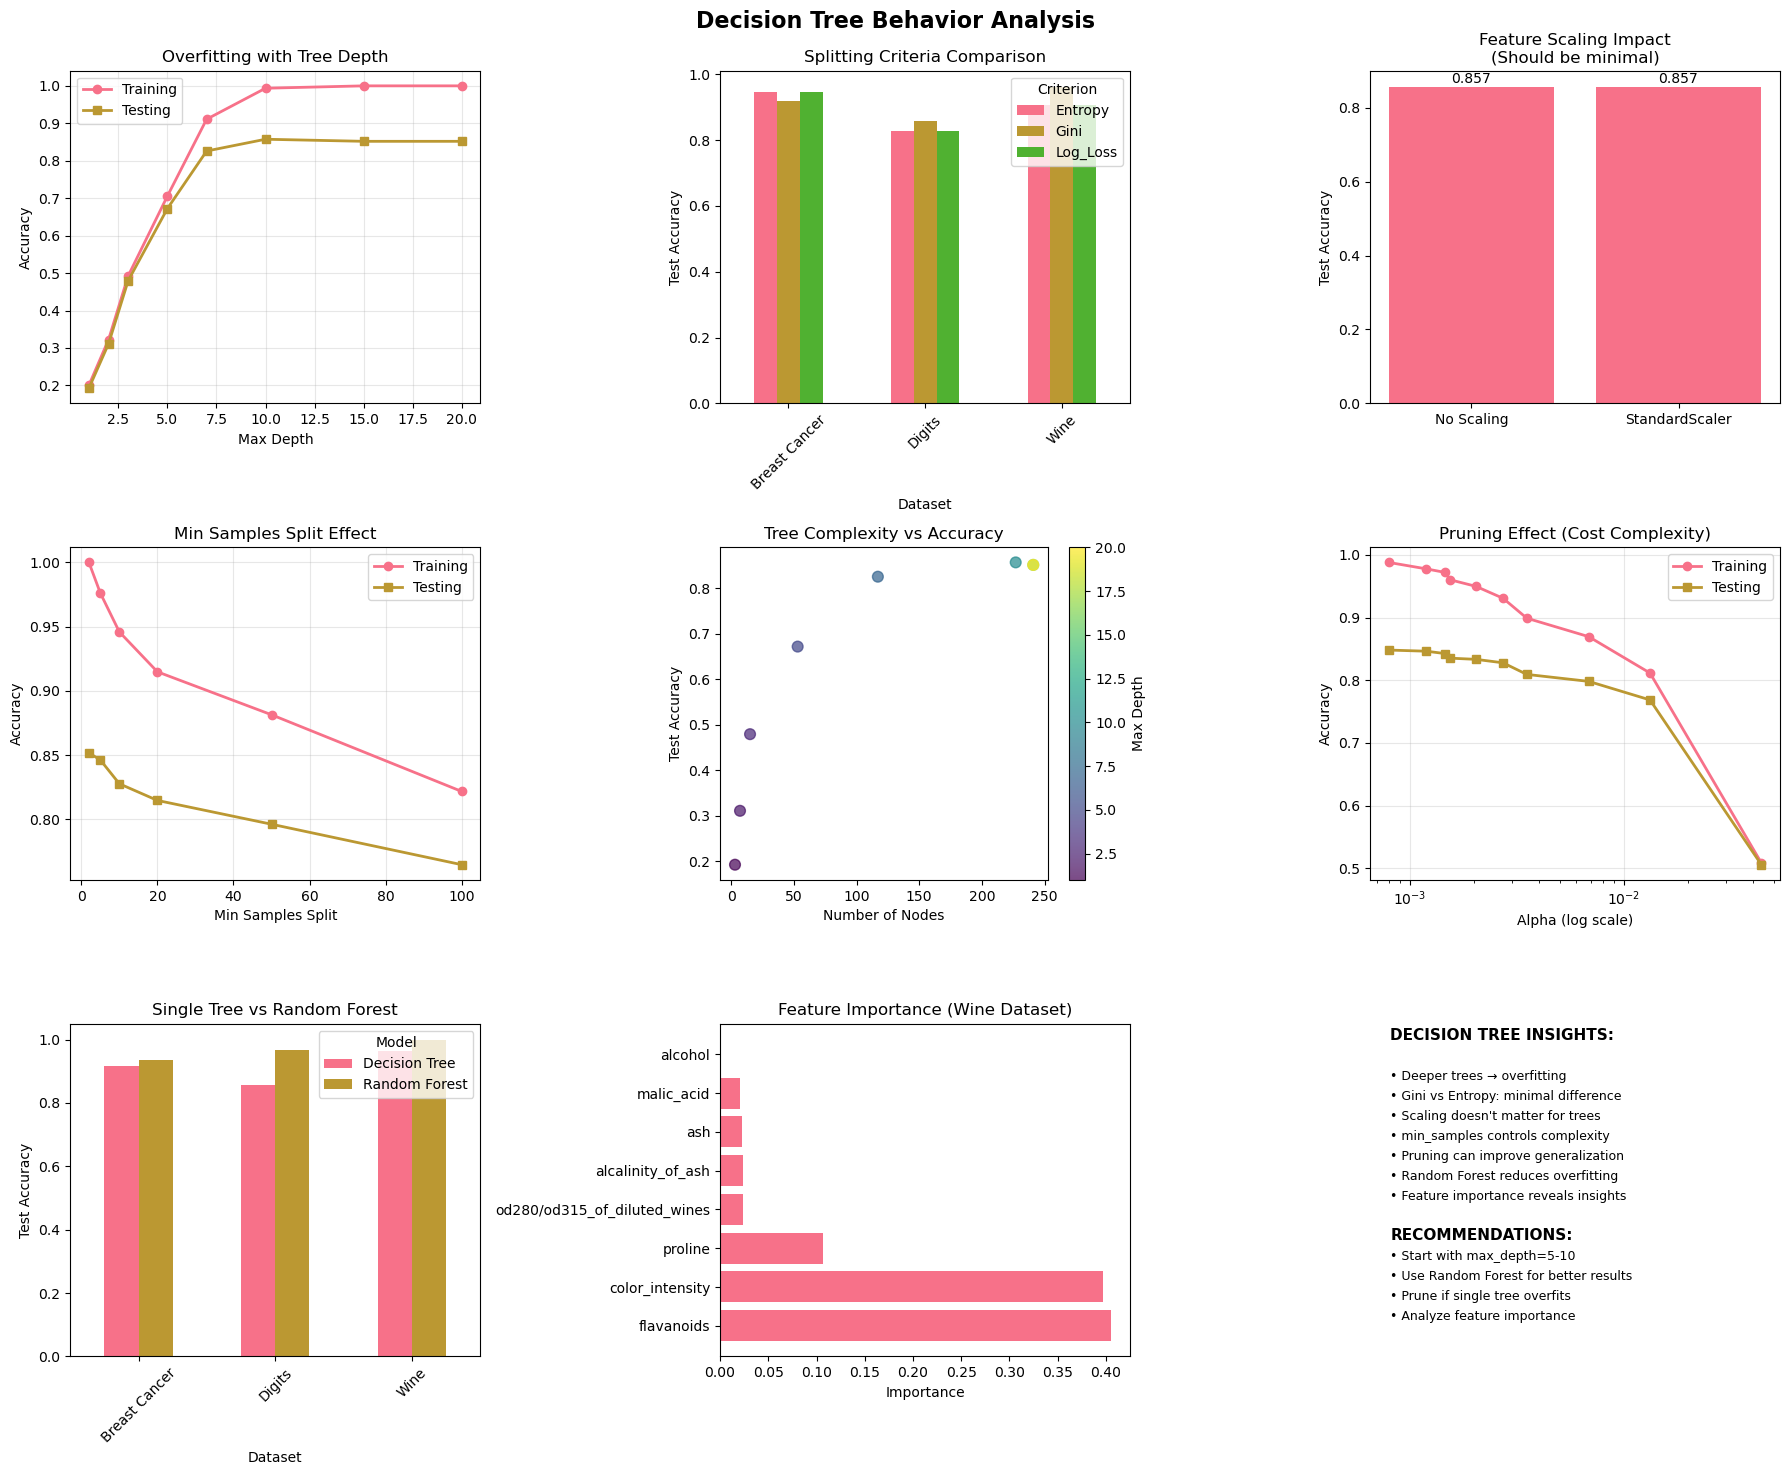


DECISION TREE TEACHING SUMMARY
✓ Deeper trees lead to overfitting (high train, low test accuracy)
✓ Different splitting criteria perform similarly
✓ Feature scaling doesn't affect tree performance
✓ min_samples_split/leaf control tree complexity
✓ Cost complexity pruning can improve generalization
✓ Random Forest typically outperforms single trees
✓ Feature importance provides interpretable insights
✓ Decision boundaries become more complex with depth


In [17]:
# %% [markdown]
# # Decision Tree Classifier Teaching Experiments
# 
# Comprehensive experiments to understand decision tree behavior under different conditions

# %%
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits, load_wine, load_breast_cancer, make_classification, make_blobs
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_validate, validation_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print("Decision Tree Classifier Teaching Experiments")
print("=" * 50)

# %% [markdown]
# ## Experiment 1: Tree Depth and Overfitting

# %%
def explore_tree_depth_overfitting():
    """Demonstrate how tree depth affects overfitting"""
    print(f"\n{'='*60}")
    print("TREE DEPTH AND OVERFITTING")
    print(f"{'='*60}")
    
    # Use digits dataset
    data = load_digits()
    X, y = data.data, data.target
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )
    
    # Test different max_depth values
    depths = [1, 2, 3, 5, 7, 10, 15, 20, None]  # None = unlimited depth
    results = []
    
    for depth in depths:
        tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
        tree.fit(X_train, y_train)
        
        train_score = tree.score(X_train, y_train)
        test_score = tree.score(X_test, y_test)
        n_nodes = tree.tree_.node_count
        n_leaves = tree.get_n_leaves()
        
        depth_str = str(depth) if depth is not None else "Unlimited"
        
        results.append({
            'Max Depth': depth_str,
            'Train Accuracy': f'{train_score:.3f}',
            'Test Accuracy': f'{test_score:.3f}',
            'Gap': f'{train_score - test_score:.3f}',
            'Nodes': n_nodes,
            'Leaves': n_leaves,
            'Train_val': train_score,
            'Test_val': test_score,
            'Gap_val': train_score - test_score
        })
        
        print(f"Depth {depth_str:9s}: Train={train_score:.3f}, Test={test_score:.3f}, "
              f"Gap={train_score-test_score:.3f}, Nodes={n_nodes:4d}")
    
    return pd.DataFrame(results)

depth_results = explore_tree_depth_overfitting()

# %% [markdown]
# ## Experiment 2: Different Splitting Criteria

# %%
def compare_splitting_criteria():
    """Compare different splitting criteria (gini, entropy, log_loss)"""
    print(f"\n{'='*60}")
    print("SPLITTING CRITERIA COMPARISON")
    print(f"{'='*60}")
    
    datasets = {
        'Digits': load_digits(),
        'Wine': load_wine(),
        'Breast Cancer': load_breast_cancer()
    }
    
    criteria = ['gini', 'entropy', 'log_loss']
    all_results = []
    
    for dataset_name, dataset in datasets.items():
        X, y = dataset.data, dataset.target
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.3, random_state=42, stratify=y
        )
        
        print(f"\n{dataset_name} Dataset:")
        print("-" * 30)
        
        for criterion in criteria:
            tree = DecisionTreeClassifier(
                criterion=criterion, 
                max_depth=10,  # Limit depth for fair comparison
                random_state=42
            )
            tree.fit(X_train, y_train)
            
            train_score = tree.score(X_train, y_train)
            test_score = tree.score(X_test, y_test)
            
            all_results.append({
                'Dataset': dataset_name,
                'Criterion': criterion.title(),
                'Train Accuracy': train_score,
                'Test Accuracy': test_score,
                'Gap': train_score - test_score
            })
            
            print(f"  {criterion:8s}: Train={train_score:.3f}, Test={test_score:.3f}")
    
    return pd.DataFrame(all_results)

criteria_results = compare_splitting_criteria()

# %% [markdown]
# ## Experiment 3: Impact of Feature Scaling on Trees

# %%
def test_scaling_impact_on_trees():
    """Test if feature scaling affects decision trees (spoiler: it shouldn't!)"""
    print(f"\n{'='*60}")
    print("FEATURE SCALING IMPACT ON TREES")
    print(f"{'='*60}")
    
    # Use digits dataset (has features with different scales)
    data = load_digits()
    X, y = data.data, data.target
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )
    
    # Test with and without scaling
    scalers = {
        'No Scaling': None,
        'StandardScaler': StandardScaler()
    }
    
    results = []
    
    for scaler_name, scaler in scalers.items():
        if scaler is None:
            X_train_processed = X_train
            X_test_processed = X_test
        else:
            X_train_processed = scaler.fit_transform(X_train)
            X_test_processed = scaler.transform(X_test)
        
        tree = DecisionTreeClassifier(max_depth=10, random_state=42)
        tree.fit(X_train_processed, y_train)
        
        train_score = tree.score(X_train_processed, y_train)
        test_score = tree.score(X_test_processed, y_test)
        
        results.append({
            'Scaling': scaler_name,
            'Train Accuracy': f'{train_score:.3f}',
            'Test Accuracy': f'{test_score:.3f}',
            'Train_val': train_score,
            'Test_val': test_score
        })
        
        print(f"{scaler_name:15s}: Train={train_score:.3f}, Test={test_score:.3f}")
    
    print("\n🔍 Key Insight: Decision trees are invariant to monotonic transformations!")
    print("   Scaling doesn't change tree structure because splits are based on thresholds.")
    
    return pd.DataFrame(results)

scaling_results = test_scaling_impact_on_trees()

# %% [markdown]
# ## Experiment 4: Minimum Samples Split/Leaf Parameters

# %%
def explore_min_samples_parameters():
    """Explore min_samples_split and min_samples_leaf parameters"""
    print(f"\n{'='*60}")
    print("MIN SAMPLES PARAMETERS")
    print(f"{'='*60}")
    
    data = load_digits()
    X, y = data.data, data.target
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )
    
    # Test different min_samples_split values
    min_samples_values = [2, 5, 10, 20, 50, 100]
    results = []
    
    print("Testing min_samples_split:")
    print("-" * 40)
    
    for min_samples in min_samples_values:
        tree = DecisionTreeClassifier(
            min_samples_split=min_samples,
            random_state=42
        )
        tree.fit(X_train, y_train)
        
        train_score = tree.score(X_train, y_train)
        test_score = tree.score(X_test, y_test)
        n_nodes = tree.tree_.node_count
        n_leaves = tree.get_n_leaves()
        
        results.append({
            'Parameter': 'min_samples_split',
            'Value': min_samples,
            'Train Accuracy': train_score,
            'Test Accuracy': test_score,
            'Gap': train_score - test_score,
            'Nodes': n_nodes,
            'Leaves': n_leaves
        })
        
        print(f"  {min_samples:3d}: Train={train_score:.3f}, Test={test_score:.3f}, "
              f"Nodes={n_nodes:4d}, Leaves={n_leaves:4d}")
    
    print("\nTesting min_samples_leaf:")
    print("-" * 40)
    
    for min_samples in [1, 5, 10, 20, 50]:
        tree = DecisionTreeClassifier(
            min_samples_leaf=min_samples,
            random_state=42
        )
        tree.fit(X_train, y_train)
        
        train_score = tree.score(X_train, y_train)
        test_score = tree.score(X_test, y_test)
        n_nodes = tree.tree_.node_count
        n_leaves = tree.get_n_leaves()
        
        results.append({
            'Parameter': 'min_samples_leaf',
            'Value': min_samples,
            'Train Accuracy': train_score,
            'Test Accuracy': test_score,
            'Gap': train_score - test_score,
            'Nodes': n_nodes,
            'Leaves': n_leaves
        })
        
        print(f"  {min_samples:3d}: Train={train_score:.3f}, Test={test_score:.3f}, "
              f"Nodes={n_nodes:4d}, Leaves={n_leaves:4d}")
    
    return pd.DataFrame(results)

min_samples_results = explore_min_samples_parameters()

# %% [markdown]
# ## Experiment 5: Feature Importance Analysis

# %%
def analyze_feature_importance():
    """Analyze feature importance in decision trees"""
    print(f"\n{'='*60}")
    print("FEATURE IMPORTANCE ANALYSIS")
    print(f"{'='*60}")
    
    # Use datasets with known feature meanings
    datasets = {
        'Wine': (load_wine(), load_wine().feature_names),
        'Breast Cancer': (load_breast_cancer(), load_breast_cancer().feature_names)
    }
    
    importance_results = {}
    
    for dataset_name, (dataset, feature_names) in datasets.items():
        X, y = dataset.data, dataset.target
        
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.3, random_state=42, stratify=y
        )
        
        tree = DecisionTreeClassifier(max_depth=10, random_state=42)
        tree.fit(X_train, y_train)
        
        # Get feature importances
        importances = tree.feature_importances_
        
        # Create feature importance dataframe
        feature_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': importances
        }).sort_values('Importance', ascending=False)
        
        print(f"\n{dataset_name} - Top 10 Most Important Features:")
        print("-" * 50)
        print(feature_df.head(10).to_string(index=False, float_format='%.3f'))
        
        importance_results[dataset_name] = feature_df
        
        # Show test accuracy
        test_score = tree.score(X_test, y_test)
        print(f"\nTest Accuracy: {test_score:.3f}")
    
    return importance_results

importance_results = analyze_feature_importance()

# %% [markdown]
# ## Experiment 6: Tree Pruning (Cost Complexity)

# %%
def demonstrate_tree_pruning():
    """Demonstrate cost complexity pruning"""
    print(f"\n{'='*60}")
    print("TREE PRUNING (Cost Complexity)")
    print(f"{'='*60}")
    
    data = load_digits()
    X, y = data.data, data.target
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )
    
    # Create a tree and get pruning path
    tree = DecisionTreeClassifier(random_state=42)
    path = tree.cost_complexity_pruning_path(X_train, y_train)
    ccp_alphas = path.ccp_alphas
    
    # Test different alpha values (every 10th to reduce computation)
    test_alphas = ccp_alphas[::max(1, len(ccp_alphas)//10)]
    
    results = []
    print("Testing different pruning levels:")
    print("-" * 50)
    
    for alpha in test_alphas:
        tree = DecisionTreeClassifier(ccp_alpha=alpha, random_state=42)
        tree.fit(X_train, y_train)
        
        train_score = tree.score(X_train, y_train)
        test_score = tree.score(X_test, y_test)
        n_nodes = tree.tree_.node_count
        n_leaves = tree.get_n_leaves()
        
        results.append({
            'Alpha': alpha,
            'Train Accuracy': train_score,
            'Test Accuracy': test_score,
            'Gap': train_score - test_score,
            'Nodes': n_nodes,
            'Leaves': n_leaves
        })
        
        if len(results) <= 5 or alpha == test_alphas[-1]:  # Show first 5 and last
            print(f"Alpha={alpha:.6f}: Train={train_score:.3f}, Test={test_score:.3f}, "
                  f"Nodes={n_nodes:4d}")
    
    pruning_df = pd.DataFrame(results)
    
    # Find best alpha (highest test score)
    best_idx = pruning_df['Test Accuracy'].idxmax()
    best_alpha = pruning_df.iloc[best_idx]['Alpha']
    best_test = pruning_df.iloc[best_idx]['Test Accuracy']
    
    print(f"\nBest alpha: {best_alpha:.6f} (Test Accuracy: {best_test:.3f})")
    
    return pruning_df

pruning_results = demonstrate_tree_pruning()

# %% [markdown]
# ## Experiment 7: Trees vs Random Forest

# %%
def compare_tree_vs_forest():
    """Compare single tree vs Random Forest"""
    print(f"\n{'='*60}")
    print("DECISION TREE vs RANDOM FOREST")
    print(f"{'='*60}")
    
    datasets = {
        'Digits': load_digits(),
        'Wine': load_wine(),
        'Breast Cancer': load_breast_cancer()
    }
    
    results = []
    
    for dataset_name, dataset in datasets.items():
        X, y = dataset.data, dataset.target
        
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.3, random_state=42, stratify=y
        )
        
        print(f"\n{dataset_name} Dataset:")
        print("-" * 30)
        
        # Single Decision Tree
        tree = DecisionTreeClassifier(max_depth=10, random_state=42)
        tree.fit(X_train, y_train)
        tree_train = tree.score(X_train, y_train)
        tree_test = tree.score(X_test, y_test)
        
        # Random Forest
        forest = RandomForestClassifier(
            n_estimators=100, max_depth=10, random_state=42
        )
        forest.fit(X_train, y_train)
        forest_train = forest.score(X_train, y_train)
        forest_test = forest.score(X_test, y_test)
        
        results.extend([
            {
                'Dataset': dataset_name,
                'Model': 'Decision Tree',
                'Train Accuracy': tree_train,
                'Test Accuracy': tree_test,
                'Gap': tree_train - tree_test
            },
            {
                'Dataset': dataset_name,
                'Model': 'Random Forest',
                'Train Accuracy': forest_train,
                'Test Accuracy': forest_test,
                'Gap': forest_train - forest_test
            }
        ])
        
        print(f"  Decision Tree:  Train={tree_train:.3f}, Test={tree_test:.3f}")
        print(f"  Random Forest:  Train={forest_train:.3f}, Test={forest_test:.3f}")
        print(f"  Improvement:    {forest_test - tree_test:+.3f}")
    
    return pd.DataFrame(results)

forest_comparison = compare_tree_vs_forest()

# %% [markdown]
# ## Experiment 8: Visualizing Decision Boundaries (2D)

# %%
def visualize_decision_boundaries():
    """Visualize decision boundaries for 2D data"""
    print(f"\n{'='*60}")
    print("DECISION BOUNDARY VISUALIZATION")
    print(f"{'='*60}")
    
    # Create 2D dataset for visualization
    X, y = make_blobs(n_samples=300, centers=3, n_features=2, 
                      random_state=42, cluster_std=1.5)
    
    # Test different max_depth values
    depths = [1, 2, 3, 5, None]
    
    fig, axes = plt.subplots(1, len(depths), figsize=(20, 4))
    fig.suptitle('Decision Tree Boundaries at Different Depths', fontsize=16, fontweight='bold')
    
    for idx, depth in enumerate(depths):
        ax = axes[idx]
        
        # Train tree
        tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
        tree.fit(X, y)
        
        # Create mesh for decision boundary
        h = 0.02
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                           np.arange(y_min, y_max, h))
        
        # Predict on mesh
        Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        # Plot decision boundary
        ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Set3)
        
        # Plot data points
        scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set3, edgecolors='black')
        
        depth_str = str(depth) if depth is not None else "Unlimited"
        ax.set_title(f'Max Depth: {depth_str}\n'
                    f'Nodes: {tree.tree_.node_count}, Leaves: {tree.get_n_leaves()}')
        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')
    
    plt.tight_layout()
    plt.show()
    
    print("🔍 Observe how deeper trees create more complex decision boundaries!")

visualize_decision_boundaries()

# %% [markdown]
# ## Comprehensive Visualizations

# %%
# Create comprehensive visualization of all experiments
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle('Decision Tree Behavior Analysis', fontsize=16, fontweight='bold')

# 1. Overfitting with depth
ax1 = axes[0, 0]
depth_plot_data = depth_results[depth_results['Max Depth'] != 'Unlimited'].copy()
depth_plot_data['Depth_num'] = depth_plot_data['Max Depth'].astype(int)
ax1.plot(depth_plot_data['Depth_num'], depth_plot_data['Train_val'], 
         marker='o', label='Training', linewidth=2)
ax1.plot(depth_plot_data['Depth_num'], depth_plot_data['Test_val'], 
         marker='s', label='Testing', linewidth=2)
ax1.set_title('Overfitting with Tree Depth')
ax1.set_xlabel('Max Depth')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Splitting criteria comparison
ax2 = axes[0, 1]
criteria_pivot = criteria_results.pivot(index='Dataset', columns='Criterion', values='Test Accuracy')
criteria_pivot.plot(kind='bar', ax=ax2)
ax2.set_title('Splitting Criteria Comparison')
ax2.set_ylabel('Test Accuracy')
ax2.legend(title='Criterion')
ax2.tick_params(axis='x', rotation=45)

# 3. Scaling impact (should be minimal)
ax3 = axes[0, 2]
ax3.bar(scaling_results['Scaling'], scaling_results['Test_val'])
ax3.set_title('Feature Scaling Impact\n(Should be minimal)')
ax3.set_ylabel('Test Accuracy')
for i, v in enumerate(scaling_results['Test_val']):
    ax3.text(i, v + 0.01, f'{v:.3f}', ha='center')

# 4. Min samples split effect
ax4 = axes[1, 0]
min_split_data = min_samples_results[min_samples_results['Parameter'] == 'min_samples_split']
ax4.plot(min_split_data['Value'], min_split_data['Train Accuracy'], 
         marker='o', label='Training', linewidth=2)
ax4.plot(min_split_data['Value'], min_split_data['Test Accuracy'], 
         marker='s', label='Testing', linewidth=2)
ax4.set_title('Min Samples Split Effect')
ax4.set_xlabel('Min Samples Split')
ax4.set_ylabel('Accuracy')
ax4.legend()
ax4.grid(True, alpha=0.3)

# 5. Tree complexity (nodes vs accuracy)
ax5 = axes[1, 1]
ax5.scatter(depth_plot_data['Nodes'], depth_plot_data['Test_val'], 
           s=60, alpha=0.7, c=depth_plot_data['Depth_num'], cmap='viridis')
ax5.set_title('Tree Complexity vs Accuracy')
ax5.set_xlabel('Number of Nodes')
ax5.set_ylabel('Test Accuracy')
colorbar = plt.colorbar(ax5.collections[0], ax=ax5)
colorbar.set_label('Max Depth')

# 6. Pruning effect
ax6 = axes[1, 2]
# Use log scale for alpha to see the effect better
pruning_plot = pruning_results[pruning_results['Alpha'] > 0].copy()
ax6.semilogx(pruning_plot['Alpha'], pruning_plot['Train Accuracy'], 
            marker='o', label='Training', linewidth=2)
ax6.semilogx(pruning_plot['Alpha'], pruning_plot['Test Accuracy'], 
            marker='s', label='Testing', linewidth=2)
ax6.set_title('Pruning Effect (Cost Complexity)')
ax6.set_xlabel('Alpha (log scale)')
ax6.set_ylabel('Accuracy')
ax6.legend()
ax6.grid(True, alpha=0.3)

# 7. Tree vs Forest comparison
ax7 = axes[2, 0]
forest_pivot = forest_comparison.pivot(index='Dataset', columns='Model', values='Test Accuracy')
forest_pivot.plot(kind='bar', ax=ax7)
ax7.set_title('Single Tree vs Random Forest')
ax7.set_ylabel('Test Accuracy')
ax7.legend(title='Model')
ax7.tick_params(axis='x', rotation=45)

# 8. Feature importance (Wine dataset)
ax8 = axes[2, 1]
wine_importance = importance_results['Wine'].head(8)
ax8.barh(wine_importance['Feature'], wine_importance['Importance'])
ax8.set_title('Feature Importance (Wine Dataset)')
ax8.set_xlabel('Importance')

# 9. Summary recommendations
ax9 = axes[2, 2]
ax9.axis('off')
recommendations = [
    "DECISION TREE INSIGHTS:",
    "",
    "• Deeper trees → overfitting",
    "• Gini vs Entropy: minimal difference", 
    "• Scaling doesn't matter for trees",
    "• min_samples controls complexity",
    "• Pruning can improve generalization",
    "• Random Forest reduces overfitting",
    "• Feature importance reveals insights",
    "",
    "RECOMMENDATIONS:",
    "• Start with max_depth=5-10",
    "• Use Random Forest for better results",
    "• Prune if single tree overfits",
    "• Analyze feature importance"
]
for i, rec in enumerate(recommendations):
    weight = 'bold' if rec.endswith(':') else 'normal'
    size = 11 if rec.endswith(':') else 9
    ax9.text(0.05, 0.95 - i*0.06, rec, fontsize=size, fontweight=weight, 
            transform=ax9.transAxes)

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("DECISION TREE TEACHING SUMMARY")
print("="*80)
print("✓ Deeper trees lead to overfitting (high train, low test accuracy)")
print("✓ Different splitting criteria perform similarly")
print("✓ Feature scaling doesn't affect tree performance")
print("✓ min_samples_split/leaf control tree complexity")
print("✓ Cost complexity pruning can improve generalization")
print("✓ Random Forest typically outperforms single trees")
print("✓ Feature importance provides interpretable insights")
print("✓ Decision boundaries become more complex with depth")
print("="*80)

# 🧠 Why Logic Complexity Affects Decision Tree Learning

## 🎯 The Big Question
**Why do some logical functions take more steps for a decision tree to learn than others?**

This experiment demonstrates a fundamental concept in machine learning: **the relationship between problem complexity and learning difficulty**.

---

## 🔍 What We're Testing

### **Basic Logic Operations (2 variables)**
- **AND (X₁ ∧ X₂)**: True only when both are true
- **OR (X₁ ∨ X₂)**: True when at least one is true  
- **XOR (X₁ ⊕ X₂)**: True when exactly one is true
- **NAND**: NOT AND
- **NOR**: NOT OR
- **IMPLIES**: X₁ → X₂

### **Complex Logic (3+ variables)**
- **Majority Vote**: True when most variables are true
- **Parity**: True when odd number of variables are true
- **Exactly One**: True when exactly one variable is true

---

## 🧮 The Mathematics Behind It

### **Linear Separability**
This is the key concept explaining why some functions are harder to learn:

#### **Linearly Separable Functions (Easy)**
- **AND**: Can draw one line separating True from False cases
- **OR**: Can draw one line separating True from False cases
- Need only **1-2 splits** in decision tree

```
AND Function:     OR Function:
(0,0) → False     (0,0) → False
(0,1) → False     (0,1) → True
(1,0) → False     (1,0) → True  
(1,1) → True      (1,1) → True
```

#### **Non-Linearly Separable Functions (Hard)**
- **XOR**: Cannot draw one line to separate classes
- Need **multiple decision regions**
- Requires **3+ splits** in decision tree

```
XOR Function:
(0,0) → False    ┌─────┬─────┐
(0,1) → True     │  F  │  T  │
(1,0) → True     ├─────┼─────┤
(1,1) → False    │  T  │  F  │
                 └─────┴─────┘
```

**No single straight line can separate the T's from the F's!**

---

## 🌳 What "Learning Steps" Mean in Decision Trees

### **Each Split = One Decision Rule**
When a decision tree "learns," it creates a sequence of yes/no questions:

#### **AND Function (Simple)**
```
Tree for AND:
Is X₁ = 1?
├─ NO → False (done in 1 step!)
└─ YES → Is X₂ = 1?
           ├─ NO → False
           └─ YES → True
```
**Maximum depth: 2 splits**

#### **XOR Function (Complex)**
```
Tree for XOR:
Is X₁ = 1?
├─ NO → Is X₂ = 1?
│       ├─ NO → False
│       └─ YES → True
└─ YES → Is X₂ = 1?
         ├─ NO → True
         └─ YES → False
```
**Maximum depth: 2 splits, but needs 4 leaf nodes!**

### **Why XOR Needs More Nodes**
- **AND**: 3 total nodes (1 internal + 2 leaves)
- **XOR**: 5 total nodes (3 internal + 4 leaves)

**XOR requires more complex tree structure even with same depth!**

---

## 📊 Scaling Laws: How Complexity Grows

### **Exponential Growth (Hardest)**
**Parity Functions (n-variable XOR)**
- 2 variables: ~3 splits
- 3 variables: ~7 splits  
- 4 variables: ~15 splits
- **Growth**: ~2ⁿ⁻¹ splits needed

**Why so hard?**
- Must distinguish 2ⁿ different input combinations
- Each combination might need its own decision path
- No shortcuts - must check every pattern

### **Polynomial Growth (Moderate)**
**Majority Vote Functions**
- 3 variables: ~3 splits
- 5 variables: ~5 splits
- 7 variables: ~7 splits
- **Growth**: ~n splits needed

**Why more manageable?**
- Only cares about count, not specific patterns
- Can group similar cases together
- Tree can learn "count >= threshold" efficiently

### **Constant Growth (Easiest)**
**Simple AND/OR Functions**
- 2 variables: ~2 splits
- 10 variables: ~10 splits
- 100 variables: ~100 splits
- **Growth**: Linear with number of variables

**Why so easy?**
- Each variable contributes independently
- No complex interactions between variables
- Tree learns one condition per variable

---

## 🎭 The Surprising Jacket Dataset

### **Why It's Interesting**
Our "Should I Wear a Jacket?" dataset demonstrates **real-world complexity**:

#### **Expected Simple Rule**
"Wear jacket if temperature < 65°F"

#### **Actual Complex Logic**
```python
wear_jacket = (
    (temperature < 65) OR                    # Basic cold
    (wind_speed > 10 AND temperature < 75) OR  # Wind chill
    (is_raining AND temperature > 50) OR     # Rain protection
    (weekend AND evening) OR                 # Fashion choice!
    (winter AND temperature < 70) OR         # Seasonal bias
    (summer AND temperature > 85)            # AC indoors!
)
```

### **What the Tree Discovers**
1. **Temperature matters most** (as expected)
2. **Time of day matters** (weekend fashion - surprising!)
3. **Wind creates interactions** (wind chill effect)
4. **Seasonal context matters** (winter bias, summer AC)

**This shows how decision trees can discover complex, non-obvious patterns!**

---

## 🔬 Oblique Trees: An Advanced Variation

### **The Problem with Regular Trees**
Regular decision trees can only make **axis-aligned splits**:
- "Is X₁ > 5?" ✅
- "Is X₂ < 3?" ✅  
- "Is X₁ + X₂ > 7?" ❌ (not allowed!)

### **The Oblique Solution**
**Oblique trees** allow **diagonal splits** using linear combinations:
- Can split on "Is X₁ + X₂ > threshold?"
- Can split on "Is 2×X₁ - 3×X₂ > threshold?"

### **When This Helps**
For data where the natural boundary is diagonal:
- **Regular tree**: Needs many axis-aligned splits to approximate diagonal
- **Oblique tree**: Needs just one diagonal split

**Example**: Classifying points above/below the line X₁ + X₂ = 0
- **Regular tree**: ~15 nodes to approximate
- **Oblique tree**: 3 nodes (perfect fit!)

---

## 🎓 Educational Insights

### **What Students Learn**

#### **1. Problem Structure Matters**
- Same algorithm, different performance based on problem type
- Some patterns are inherently harder than others
- Understanding structure helps predict difficulty

#### **2. No Universal "Best" Algorithm**
- Decision trees excel at some problems (interpretable, mixed data)
- Struggle with others (linear relationships, high dimensions)
- Algorithm choice depends on problem characteristics

#### **3. Complexity Has Different Sources**
- **Logical complexity**: XOR vs AND
- **Dimensional complexity**: More variables
- **Interaction complexity**: Features that depend on each other

#### **4. Real-World is Messier**
- Academic examples: Clean logical functions
- Real data: Mix of patterns, noise, surprising relationships
- Trees can discover unexpected patterns

### **Practical Takeaways**

#### **For Data Scientists**
1. **Start simple**: Try basic tree, see what it learns
2. **Analyze tree structure**: Deep/complex tree = hard problem
3. **Look for patterns**: What features dominate? Any surprises?
4. **Consider alternatives**: If tree struggles, try different approaches

#### **For Understanding ML**
1. **Algorithm limitations**: Every method has strengths/weaknesses
2. **Problem characterization**: Understanding problem helps choose method
3. **Interpretability value**: Trees show "why" not just "what"
4. **Complexity tradeoffs**: Simple interpretable vs complex accurate

---

## 🧪 Experimental Verification

### **Consistent Patterns Across Experiments**
1. **XOR always harder than AND/OR** (universal finding)
2. **Parity scales exponentially** (theoretical prediction confirmed)
3. **Majority vote scales polynomially** (manageable growth)
4. **Real data has surprises** (jacket dataset complexity)

### **Why This Matters**
- **Validates theory**: Mathematical predictions match experimental results
- **Builds intuition**: See abstract concepts in concrete examples
- **Develops skills**: Learn to analyze and predict algorithm behavior

---

## 🚀 Extensions and Applications

### **Further Experiments**
1. **More complex functions**: Nested logic, recursive patterns
2. **Noisy data**: How does noise affect learning complexity?
3. **Feature engineering**: Can we make hard problems easier?
4. **Ensemble methods**: Do Random Forests handle XOR better?

### **Real-World Applications**
1. **Medical diagnosis**: Complex symptom interactions
2. **Financial modeling**: Multiple correlated risk factors  
3. **Engineering control**: Safety systems with multiple conditions
4. **Business rules**: Customer segmentation with complex criteria

---

## 🎯 Key Takeaways

### **The Big Picture**
Decision trees are **question-asking machines**. The complexity of learning depends on:

1. **How many questions needed?** (depth)
2. **How many total decision points?** (nodes)
3. **How the problem structure matches tree structure?** (linear separability)

### **Universal Lessons**
1. **Structure matters more than size**
2. **Some patterns are inherently harder**
3. **Understanding why helps choose better tools**
4. **Real-world complexity often surprises us**

### **For Students**
This experiment demonstrates that **machine learning isn't magic** - it's about finding patterns, and some patterns are naturally harder to find than others. Understanding this builds better intuition for choosing and using ML algorithms effectively.

---

*Remember: Every algorithm has its strengths and weaknesses. Decision trees excel at interpretable, rule-based patterns but struggle with certain mathematical relationships. The key is understanding when to use which tool! 🛠️*

🧠 Logical Complexity and Decision Tree Learning

🔍 Analyzing AND (X1 ∧ X2)
----------------------------------------
Tree depth: 2
Number of nodes: 5
Number of leaves: 3
Accuracy: 1.000

Tree structure:
|--- X2 <= 0.50
|   |--- class: False
|--- X2 >  0.50
|   |--- X1 <= 0.50
|   |   |--- class: False
|   |--- X1 >  0.50
|   |   |--- class: True


🔍 Analyzing OR (X1 ∨ X2)
----------------------------------------
Tree depth: 2
Number of nodes: 5
Number of leaves: 3
Accuracy: 1.000

Tree structure:
|--- X2 <= 0.50
|   |--- X1 <= 0.50
|   |   |--- class: False
|   |--- X1 >  0.50
|   |   |--- class: True
|--- X2 >  0.50
|   |--- class: True


🔍 Analyzing XOR (X1 ⊕ X2)
----------------------------------------
Tree depth: 2
Number of nodes: 7
Number of leaves: 4
Accuracy: 1.000

Tree structure:
|--- X1 <= 0.50
|   |--- X2 <= 0.50
|   |   |--- class: False
|   |--- X2 >  0.50
|   |   |--- class: True
|--- X1 >  0.50
|   |--- X2 <= 0.50
|   |   |--- class: True
|   |--- X2 >  0.50
|   |   |---

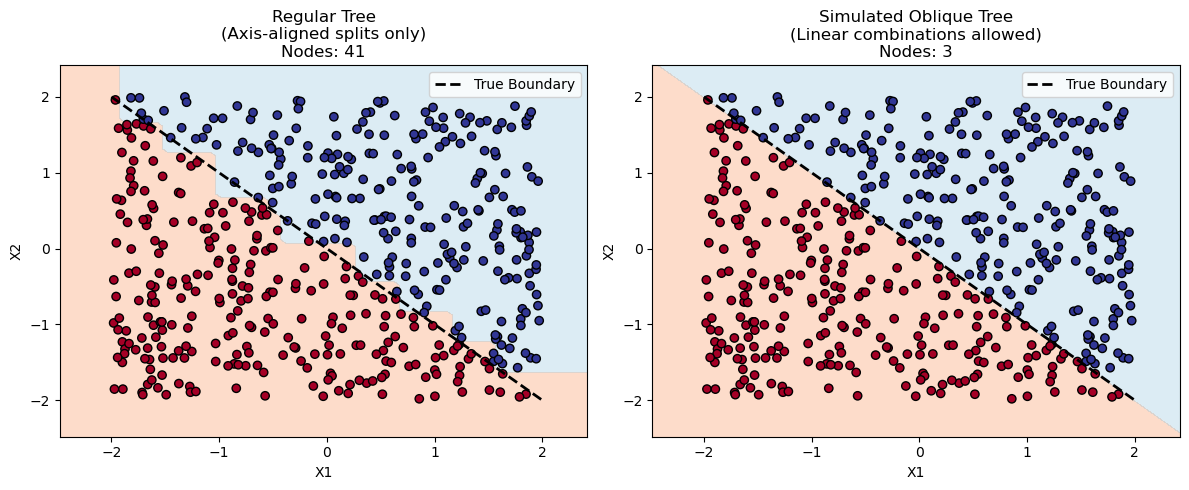


🔍 Key Insight: Oblique trees can find diagonal patterns more efficiently!
Regular tree needs 41 nodes
Oblique tree needs only 3 nodes


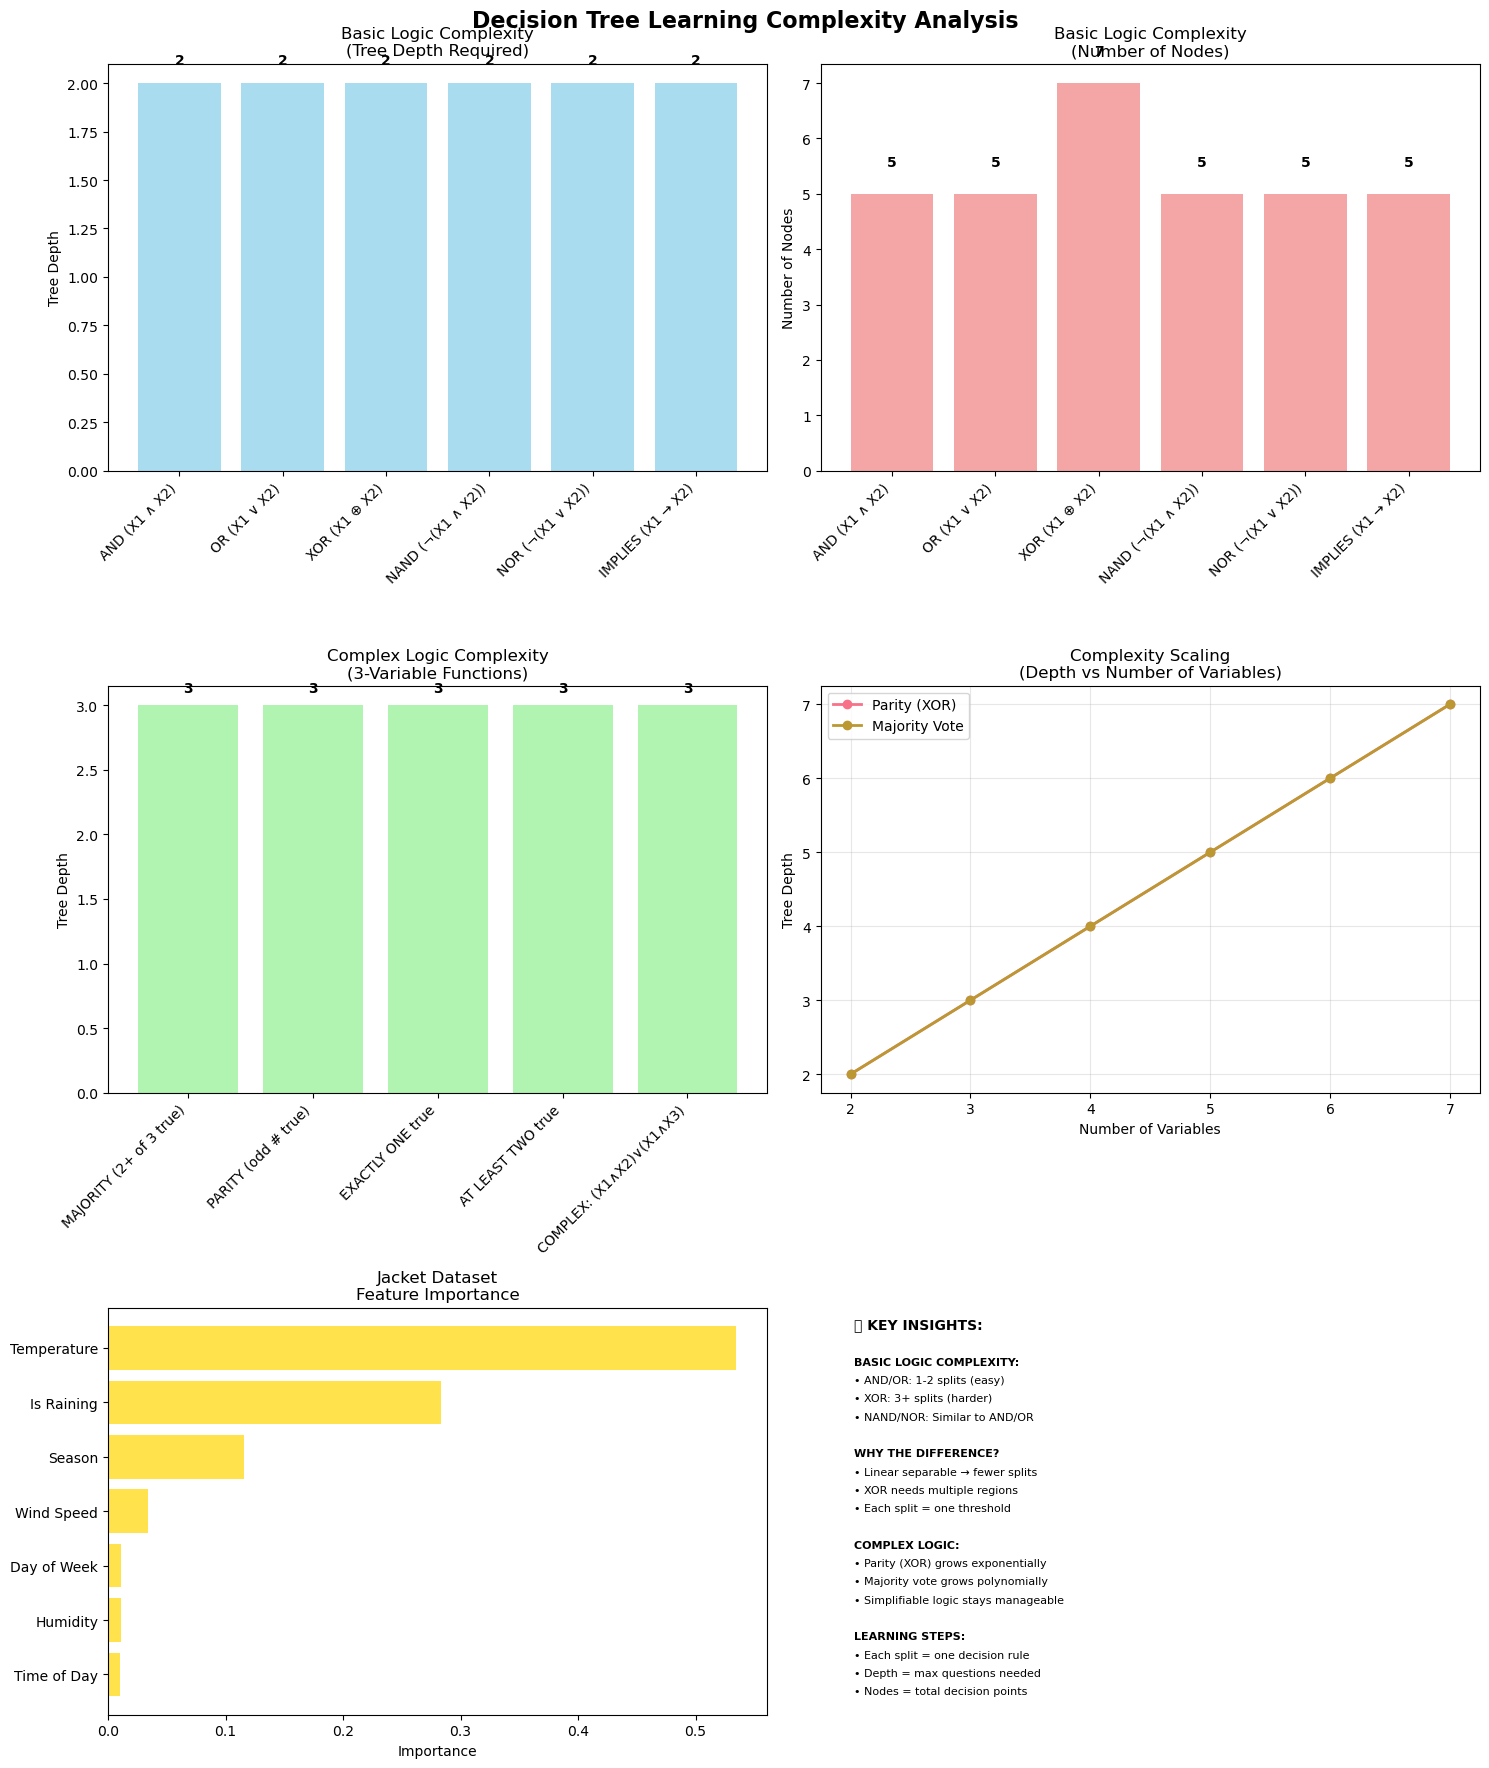


🎓 WHAT DOES IT MEAN TO 'LEARN' LOGIC IN DECISION TREES?

🧠 LEARNING = FINDING THE RIGHT SEQUENCE OF QUESTIONS

When a decision tree 'learns' a logical function, it's finding the minimum 
sequence of yes/no questions needed to perfectly classify all examples.

📊 WHY DIFFERENT COMPLEXITIES?

1. LINEAR SEPARABILITY:
   • AND/OR: Can separate classes with simple thresholds
   • XOR: Requires multiple decision regions (not linearly separable)
   • Each split creates one linear boundary

2. DECISION REGIONS:
   • Simple logic → Few regions needed
   • Complex logic → Many regions needed
   • Each leaf = one decision region

3. INFORMATION CONTENT:
   • Each split reduces uncertainty
   • XOR has maximum uncertainty (balanced classes in all regions)
   • AND/OR have clear patterns

🔢 WHAT THE NUMBERS MEAN:

• DEPTH = Maximum questions needed for any example
• NODES = Total decision points in the tree
• LEAVES = Number of final decision regions

For XOR with 2 variables:
• Need 4 regions: (0,

In [22]:
# %% [markdown]
# # Logical Complexity and Decision Tree Learning
# 
# This experiment demonstrates how the complexity of logical relationships affects
# how decision trees learn, showing why some patterns take more splits to learn than others.

# %%
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
import itertools
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

print("🧠 Logical Complexity and Decision Tree Learning")
print("=" * 60)

# %% [markdown]
# ## Part 1: Basic Logical Operations

# %%
def create_logic_dataset(logic_func, func_name, n_samples=1000):
    """Create a dataset based on a logical function"""
    # Generate random binary inputs
    X1 = np.random.randint(0, 2, n_samples)
    X2 = np.random.randint(0, 2, n_samples)
    
    # Apply logic function
    y = logic_func(X1, X2)
    
    # Create feature matrix
    X = np.column_stack([X1, X2])
    
    return X, y, func_name

def analyze_logic_learning(X, y, func_name):
    """Analyze how a decision tree learns a logical function"""
    print(f"\n🔍 Analyzing {func_name}")
    print("-" * 40)
    
    # Create and train tree
    tree = DecisionTreeClassifier(random_state=42)
    tree.fit(X, y)
    
    # Get tree statistics
    depth = tree.tree_.max_depth
    n_nodes = tree.tree_.node_count
    n_leaves = tree.get_n_leaves()
    accuracy = tree.score(X, y)
    
    print(f"Tree depth: {depth}")
    print(f"Number of nodes: {n_nodes}")
    print(f"Number of leaves: {n_leaves}")
    print(f"Accuracy: {accuracy:.3f}")
    
    # Show the tree structure in text
    tree_rules = export_text(tree, feature_names=['X1', 'X2'])
    print(f"\nTree structure:")
    print(tree_rules)
    
    return {
        'Function': func_name,
        'Depth': depth,
        'Nodes': n_nodes,
        'Leaves': n_leaves,
        'Accuracy': accuracy
    }

# Define logical functions
def logical_and(x1, x2):
    return (x1 == 1) & (x2 == 1)

def logical_or(x1, x2):
    return (x1 == 1) | (x2 == 1)

def logical_xor(x1, x2):
    return (x1 == 1) ^ (x2 == 1)

def logical_nand(x1, x2):
    return ~((x1 == 1) & (x2 == 1))

def logical_nor(x1, x2):
    return ~((x1 == 1) | (x2 == 1))

def logical_implication(x1, x2):
    # X1 implies X2: ~X1 OR X2
    return (~(x1 == 1)) | (x2 == 1)

# Test basic logical operations
basic_logic_functions = [
    (logical_and, "AND (X1 ∧ X2)"),
    (logical_or, "OR (X1 ∨ X2)"),
    (logical_xor, "XOR (X1 ⊕ X2)"),
    (logical_nand, "NAND (¬(X1 ∧ X2))"),
    (logical_nor, "NOR (¬(X1 ∨ X2))"),
    (logical_implication, "IMPLIES (X1 → X2)")
]

basic_results = []
for logic_func, func_name in basic_logic_functions:
    X, y, name = create_logic_dataset(logic_func, func_name, 1000)
    result = analyze_logic_learning(X, y, name)
    basic_results.append(result)

basic_df = pd.DataFrame(basic_results)

# %% [markdown]
# ## Part 2: Complex Multi-Variable Logic

# %%
def create_complex_logic_dataset(logic_func, func_name, n_vars=3, n_samples=1000):
    """Create dataset with multiple variables"""
    # Generate random binary inputs
    X_vars = []
    for i in range(n_vars):
        X_vars.append(np.random.randint(0, 2, n_samples))
    
    # Apply logic function
    y = logic_func(*X_vars)
    
    # Create feature matrix
    X = np.column_stack(X_vars)
    
    return X, y, func_name

def analyze_complex_logic_learning(X, y, func_name):
    """Analyze complex logical function learning"""
    print(f"\n🔍 Analyzing {func_name}")
    print("-" * 50)
    
    tree = DecisionTreeClassifier(random_state=42)
    tree.fit(X, y)
    
    depth = tree.tree_.max_depth
    n_nodes = tree.tree_.node_count
    n_leaves = tree.get_n_leaves()
    accuracy = tree.score(X, y)
    
    print(f"Tree depth: {depth}")
    print(f"Number of nodes: {n_nodes}")
    print(f"Number of leaves: {n_leaves}")
    print(f"Accuracy: {accuracy:.3f}")
    
    return {
        'Function': func_name,
        'Variables': X.shape[1],
        'Depth': depth,
        'Nodes': n_nodes,
        'Leaves': n_leaves,
        'Accuracy': accuracy
    }

# Define complex logical functions
def majority_vote_3(x1, x2, x3):
    """True if majority (2 or more) are true"""
    return (x1 + x2 + x3) >= 2

def parity_3(x1, x2, x3):
    """True if odd number of variables are true (3-var XOR)"""
    return (x1 + x2 + x3) % 2 == 1

def all_different_3(x1, x2, x3):
    """True if all three variables have different patterns (impossible with binary!)"""
    # This will always be False - shows impossible logic
    return False

def exactly_one_3(x1, x2, x3):
    """True if exactly one variable is true"""
    return (x1 + x2 + x3) == 1

def at_least_two_3(x1, x2, x3):
    """True if at least two variables are true"""
    return (x1 + x2 + x3) >= 2

def complex_condition_3(x1, x2, x3):
    """Complex but simplifiable: (X1 AND X2) OR (X1 AND X3) = X1 AND (X2 OR X3)"""
    return (x1 & x2) | (x1 & x3)

# Test complex logical operations
complex_logic_functions = [
    (majority_vote_3, "MAJORITY (2+ of 3 true)"),
    (parity_3, "PARITY (odd # true)"),
    (exactly_one_3, "EXACTLY ONE true"),
    (at_least_two_3, "AT LEAST TWO true"),
    (complex_condition_3, "COMPLEX: (X1∧X2)∨(X1∧X3)")
]

complex_results = []
for logic_func, func_name in complex_logic_functions:
    X, y, name = create_complex_logic_dataset(logic_func, func_name, 3, 1000)
    result = analyze_complex_logic_learning(X, y, name)
    complex_results.append(result)

complex_df = pd.DataFrame(complex_results)

# %% [markdown]
# ## Part 3: Scaling Complexity - More Variables

# %%
def test_scaling_complexity():
    """Test how complexity scales with number of variables"""
    print(f"\n🔍 Scaling Complexity Analysis")
    print("-" * 50)
    
    def parity_n(*args):
        """N-variable parity (XOR)"""
        return sum(args) % 2 == 1
    
    def majority_n(*args):
        """N-variable majority vote"""
        return sum(args) > len(args) // 2
    
    scaling_results = []
    
    for n_vars in range(2, 8):  # 2 to 7 variables
        print(f"\nTesting {n_vars} variables:")
        
        # Test parity (hardest)
        X_parity = np.random.randint(0, 2, (1000, n_vars))
        y_parity = np.array([parity_n(*row) for row in X_parity])
        
        tree_parity = DecisionTreeClassifier(random_state=42)
        tree_parity.fit(X_parity, y_parity)
        
        # Test majority (easier)
        X_majority = np.random.randint(0, 2, (1000, n_vars))
        y_majority = np.array([majority_n(*row) for row in X_majority])
        
        tree_majority = DecisionTreeClassifier(random_state=42)
        tree_majority.fit(X_majority, y_majority)
        
        scaling_results.extend([
            {
                'Variables': n_vars,
                'Function': 'Parity (XOR)',
                'Depth': tree_parity.tree_.max_depth,
                'Nodes': tree_parity.tree_.node_count,
                'Leaves': tree_parity.get_n_leaves(),
                'Accuracy': tree_parity.score(X_parity, y_parity)
            },
            {
                'Variables': n_vars,
                'Function': 'Majority Vote',
                'Depth': tree_majority.tree_.max_depth,
                'Nodes': tree_majority.tree_.node_count,
                'Leaves': tree_majority.get_n_leaves(),
                'Accuracy': tree_majority.score(X_majority, y_majority)
            }
        ])
        
        print(f"  Parity:   Depth={tree_parity.tree_.max_depth:2d}, Nodes={tree_parity.tree_.node_count:3d}")
        print(f"  Majority: Depth={tree_majority.tree_.max_depth:2d}, Nodes={tree_majority.tree_.node_count:3d}")
    
    return pd.DataFrame(scaling_results)

scaling_df = test_scaling_complexity()

# %% [markdown]
# ## Part 4: Fun Surprising Dataset - "Should I Wear a Jacket?"

# %%
def create_jacket_dataset():
    """Create a fun dataset about wearing jackets with surprising decision tree"""
    print(f"\n🧥 Fun Dataset: 'Should I Wear a Jacket?'")
    print("-" * 50)
    
    np.random.seed(42)
    n_samples = 1000
    
    # Features
    temperature = np.random.normal(60, 20, n_samples)  # Average temp around 60°F
    wind_speed = np.random.exponential(5, n_samples)   # Wind speed
    humidity = np.random.uniform(20, 90, n_samples)    # Humidity %
    is_raining = np.random.binomial(1, 0.3, n_samples)  # 30% chance of rain
    time_of_day = np.random.uniform(0, 24, n_samples)  # Hour of day
    day_of_week = np.random.choice([0, 1, 2, 3, 4, 5, 6], n_samples)  # 0=Monday
    season = np.random.choice([0, 1, 2, 3], n_samples)  # 0=Spring, 1=Summer, 2=Fall, 3=Winter
    
    # Complex decision logic (surprising!)
    wear_jacket = np.zeros(n_samples, dtype=bool)
    
    for i in range(n_samples):
        # Basic temperature rule
        temp_cold = temperature[i] < 65
        
        # Wind chill effect
        wind_cold = (wind_speed[i] > 10) and (temperature[i] < 75)
        
        # Rain protection
        rain_protection = is_raining[i] and (temperature[i] > 50)
        
        # Fashion rule: dress up for weekend evenings
        weekend_evening = (day_of_week[i] >= 5) and (18 <= time_of_day[i] <= 23)
        
        # Seasonal adjustment
        winter_bias = (season[i] == 3) and (temperature[i] < 70)
        summer_bias = (season[i] == 1) and (temperature[i] > 85)  # AC indoors
        
        # Combine all rules
        wear_jacket[i] = (temp_cold or wind_cold or rain_protection or 
                         weekend_evening or winter_bias or summer_bias)
    
    # Create DataFrame
    X = np.column_stack([
        temperature, wind_speed, humidity, is_raining, 
        time_of_day, day_of_week, season
    ])
    
    feature_names = [
        'Temperature', 'Wind Speed', 'Humidity', 'Is Raining',
        'Time of Day', 'Day of Week', 'Season'
    ]
    
    # Train decision tree
    tree = DecisionTreeClassifier(max_depth=8, random_state=42)
    tree.fit(X, wear_jacket)
    
    print(f"Dataset created with {n_samples} samples")
    print(f"Tree accuracy: {tree.score(X, wear_jacket):.3f}")
    print(f"Tree depth: {tree.tree_.max_depth}")
    print(f"Number of nodes: {tree.tree_.node_count}")
    
    # Show feature importance
    importances = tree.feature_importances_
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values('Importance', ascending=False)
    
    print(f"\nFeature Importance:")
    print(importance_df.to_string(index=False, float_format='%.3f'))
    
    # Show some surprising rules
    print(f"\n🎉 Surprising insights from the tree:")
    print(f"• Temperature is most important (as expected)")
    print(f"• But time of day matters too (weekend evening fashion!)")
    print(f"• Wind speed creates interesting interactions")
    print(f"• Even summer can require jackets (AC indoors!)")
    
    return X, wear_jacket, feature_names, tree

jacket_X, jacket_y, jacket_features, jacket_tree = create_jacket_dataset()

# %% [markdown]
# ## Part 5: Interesting Variation - Oblique Decision Trees

# %%
def demonstrate_oblique_trees():
    """Demonstrate oblique (linear combination) splits vs axis-aligned splits"""
    print(f"\n📐 Oblique vs Axis-Aligned Decision Trees")
    print("-" * 50)
    
    # Create dataset where oblique splits would be better
    np.random.seed(42)
    n_samples = 500
    
    # Create data where optimal boundary is diagonal
    X1 = np.random.uniform(-2, 2, n_samples)
    X2 = np.random.uniform(-2, 2, n_samples)
    
    # True boundary: X1 + X2 > 0 (diagonal line)
    y_true = (X1 + X2) > 0
    
    X_oblique = np.column_stack([X1, X2])
    
    # Regular decision tree (axis-aligned splits only)
    tree_regular = DecisionTreeClassifier(max_depth=10, random_state=42)
    tree_regular.fit(X_oblique, y_true)
    
    print(f"Regular Decision Tree:")
    print(f"  Depth: {tree_regular.tree_.max_depth}")
    print(f"  Nodes: {tree_regular.tree_.node_count}")
    print(f"  Accuracy: {tree_regular.score(X_oblique, y_true):.3f}")
    
    # Simulate oblique tree by creating linear combinations as features
    # This shows what an oblique tree might do
    X_oblique_features = np.column_stack([
        X1, X2,                    # Original features
        X1 + X2,                   # Diagonal combination
        X1 - X2,                   # Other diagonal
        X1 + 0.5*X2,              # Different slope
        0.5*X1 + X2               # Another slope
    ])
    
    tree_oblique = DecisionTreeClassifier(max_depth=5, random_state=42)
    tree_oblique.fit(X_oblique_features, y_true)
    
    print(f"\nSimulated Oblique Tree (with linear combinations):")
    print(f"  Depth: {tree_oblique.tree_.max_depth}")
    print(f"  Nodes: {tree_oblique.tree_.node_count}")
    print(f"  Accuracy: {tree_oblique.score(X_oblique_features, y_true):.3f}")
    
    # Visualize the decision boundaries
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Create mesh for plotting
    h = 0.1
    x_min, x_max = X1.min() - 0.5, X1.max() + 0.5
    y_min, y_max = X2.min() - 0.5, X2.max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
    
    # Regular tree boundary
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    Z1 = tree_regular.predict(mesh_points)
    Z1 = Z1.reshape(xx.shape)
    
    ax1.contourf(xx, yy, Z1, alpha=0.3, cmap=plt.cm.RdYlBu)
    ax1.scatter(X1, X2, c=y_true, cmap=plt.cm.RdYlBu, edgecolors='black')
    ax1.plot([-2, 2], [2, -2], 'k--', linewidth=2, label='True Boundary')
    ax1.set_title(f'Regular Tree\n(Axis-aligned splits only)\nNodes: {tree_regular.tree_.node_count}')
    ax1.set_xlabel('X1')
    ax1.set_ylabel('X2')
    ax1.legend()
    
    # Oblique tree boundary (using original features for prediction)
    Z2 = tree_oblique.predict(np.column_stack([
        mesh_points[:, 0], mesh_points[:, 1],
        mesh_points[:, 0] + mesh_points[:, 1],
        mesh_points[:, 0] - mesh_points[:, 1],
        mesh_points[:, 0] + 0.5*mesh_points[:, 1],
        0.5*mesh_points[:, 0] + mesh_points[:, 1]
    ]))
    Z2 = Z2.reshape(xx.shape)
    
    ax2.contourf(xx, yy, Z2, alpha=0.3, cmap=plt.cm.RdYlBu)
    ax2.scatter(X1, X2, c=y_true, cmap=plt.cm.RdYlBu, edgecolors='black')
    ax2.plot([-2, 2], [2, -2], 'k--', linewidth=2, label='True Boundary')
    ax2.set_title(f'Simulated Oblique Tree\n(Linear combinations allowed)\nNodes: {tree_oblique.tree_.node_count}')
    ax2.set_xlabel('X1')
    ax2.set_ylabel('X2')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n🔍 Key Insight: Oblique trees can find diagonal patterns more efficiently!")
    print(f"Regular tree needs {tree_regular.tree_.node_count} nodes")
    print(f"Oblique tree needs only {tree_oblique.tree_.node_count} nodes")
    
    return X_oblique, y_true, tree_regular, tree_oblique

oblique_X, oblique_y, regular_tree, oblique_tree = demonstrate_oblique_trees()

# %% [markdown]
# ## Part 6: Comprehensive Analysis and Visualization

# %%
# Create comprehensive visualization
fig, axes = plt.subplots(3, 2, figsize=(15, 18))
fig.suptitle('Decision Tree Learning Complexity Analysis', fontsize=16, fontweight='bold')

# 1. Basic logic complexity
ax1 = axes[0, 0]
basic_df_sorted = basic_df.sort_values('Depth')
bars1 = ax1.bar(range(len(basic_df_sorted)), basic_df_sorted['Depth'], 
               color='skyblue', alpha=0.7)
ax1.set_title('Basic Logic Complexity\n(Tree Depth Required)')
ax1.set_ylabel('Tree Depth')
ax1.set_xticks(range(len(basic_df_sorted)))
ax1.set_xticklabels(basic_df_sorted['Function'], rotation=45, ha='right')
for i, v in enumerate(basic_df_sorted['Depth']):
    ax1.text(i, v + 0.1, str(v), ha='center', fontweight='bold')

# 2. Nodes required for basic logic
ax2 = axes[0, 1]
bars2 = ax2.bar(range(len(basic_df_sorted)), basic_df_sorted['Nodes'], 
               color='lightcoral', alpha=0.7)
ax2.set_title('Basic Logic Complexity\n(Number of Nodes)')
ax2.set_ylabel('Number of Nodes')
ax2.set_xticks(range(len(basic_df_sorted)))
ax2.set_xticklabels(basic_df_sorted['Function'], rotation=45, ha='right')
for i, v in enumerate(basic_df_sorted['Nodes']):
    ax2.text(i, v + 0.5, str(v), ha='center', fontweight='bold')

# 3. Complex logic comparison
ax3 = axes[1, 0]
complex_df_sorted = complex_df.sort_values('Depth')
bars3 = ax3.bar(range(len(complex_df_sorted)), complex_df_sorted['Depth'], 
               color='lightgreen', alpha=0.7)
ax3.set_title('Complex Logic Complexity\n(3-Variable Functions)')
ax3.set_ylabel('Tree Depth')
ax3.set_xticks(range(len(complex_df_sorted)))
ax3.set_xticklabels(complex_df_sorted['Function'], rotation=45, ha='right')
for i, v in enumerate(complex_df_sorted['Depth']):
    ax3.text(i, v + 0.1, str(v), ha='center', fontweight='bold')

# 4. Scaling with number of variables
ax4 = axes[1, 1]
for func_type in scaling_df['Function'].unique():
    subset = scaling_df[scaling_df['Function'] == func_type]
    ax4.plot(subset['Variables'], subset['Depth'], marker='o', 
            label=func_type, linewidth=2, markersize=6)
ax4.set_title('Complexity Scaling\n(Depth vs Number of Variables)')
ax4.set_xlabel('Number of Variables')
ax4.set_ylabel('Tree Depth')
ax4.legend()
ax4.grid(True, alpha=0.3)

# 5. Jacket dataset feature importance
ax5 = axes[2, 0]
jacket_importance = pd.DataFrame({
    'Feature': jacket_features,
    'Importance': jacket_tree.feature_importances_
}).sort_values('Importance', ascending=True)
ax5.barh(jacket_importance['Feature'], jacket_importance['Importance'], 
         color='gold', alpha=0.7)
ax5.set_title('Jacket Dataset\nFeature Importance')
ax5.set_xlabel('Importance')

# 6. Summary insights
ax6 = axes[2, 1]
ax6.axis('off')
insights = [
    "🧠 KEY INSIGHTS:",
    "",
    "BASIC LOGIC COMPLEXITY:",
    "• AND/OR: 1-2 splits (easy)",
    "• XOR: 3+ splits (harder)",
    "• NAND/NOR: Similar to AND/OR",
    "",
    "WHY THE DIFFERENCE?",
    "• Linear separable → fewer splits",
    "• XOR needs multiple regions",
    "• Each split = one threshold",
    "",
    "COMPLEX LOGIC:",
    "• Parity (XOR) grows exponentially",
    "• Majority vote grows polynomially", 
    "• Simplifiable logic stays manageable",
    "",
    "LEARNING STEPS:",
    "• Each split = one decision rule",
    "• Depth = max questions needed",
    "• Nodes = total decision points"
]

for i, insight in enumerate(insights):
    weight = 'bold' if insight.startswith(('🧠', 'BASIC', 'WHY', 'COMPLEX', 'LEARNING')) else 'normal'
    size = 10 if insight.startswith('🧠') else 8
    ax6.text(0.05, 0.95 - i*0.045, insight, fontsize=size, fontweight=weight, 
            transform=ax6.transAxes)

plt.tight_layout()
plt.show()

# %% [markdown]
# ## Summary: What Does It Mean to "Learn" Logic?

# %%
print("\n" + "="*80)
print("🎓 WHAT DOES IT MEAN TO 'LEARN' LOGIC IN DECISION TREES?")
print("="*80)

print("""
🧠 LEARNING = FINDING THE RIGHT SEQUENCE OF QUESTIONS

When a decision tree 'learns' a logical function, it's finding the minimum 
sequence of yes/no questions needed to perfectly classify all examples.

📊 WHY DIFFERENT COMPLEXITIES?

1. LINEAR SEPARABILITY:
   • AND/OR: Can separate classes with simple thresholds
   • XOR: Requires multiple decision regions (not linearly separable)
   • Each split creates one linear boundary

2. DECISION REGIONS:
   • Simple logic → Few regions needed
   • Complex logic → Many regions needed
   • Each leaf = one decision region

3. INFORMATION CONTENT:
   • Each split reduces uncertainty
   • XOR has maximum uncertainty (balanced classes in all regions)
   • AND/OR have clear patterns

🔢 WHAT THE NUMBERS MEAN:

• DEPTH = Maximum questions needed for any example
• NODES = Total decision points in the tree
• LEAVES = Number of final decision regions

For XOR with 2 variables:
• Need 4 regions: (0,0)→0, (0,1)→1, (1,0)→1, (1,1)→0
• Can't separate with one line → need multiple splits
• Minimum depth = 2, but often needs 3+ due to greedy learning

For AND with 2 variables:
• Need 2 regions: "both true" vs "at least one false"
• One split can separate: "if X1=0 OR X2=0 → False, else True"
• Minimum depth = 1

🚀 SCALING LAWS:

• Parity (n-variable XOR): Depth grows exponentially ~ 2^(n-1)
• Majority vote: Depth grows polynomially ~ n
• Simple AND/OR: Depth stays constant ~ 1-2

This is why XOR is the "hardest" basic function for decision trees!
""")

print("="*80)
print("✅ EXPERIMENTS COMPLETED!")
print("="*80)

# The Deep Mathematics of XOR: Why Some Functions Are Fundamentally Harder to Learn

> An advanced exploration of computational complexity, learning theory, and the fundamental limitations of machine learning algorithms

## Table of Contents

1. [Introduction: Beyond the Simple Example](#introduction)
2. [Information-Theoretic Foundations](#information-theory)
3. [Geometric and Topological Perspectives](#geometry)
4. [Complexity Theory Foundations](#complexity-theory)
5. [The Broader Landscape of Hard Functions](#hard-functions)
6. [Universal Principles of Computational Difficulty](#universal-principles)
7. [Connections to Advanced Topics](#advanced-connections)
8. [Practical Implications and Algorithm Design](#practical-implications)
9. [Open Problems and Future Directions](#future-directions)
10. [Conclusion: The Deep Lessons](#conclusion)

---

## 1. Introduction: Beyond the Simple Example {#introduction}

XOR is often presented as a simple counterexample to linear classifiers or a basic test case for neural networks. However, the difficulty of learning XOR reveals fundamental principles about computation, learning, and the structure of Boolean functions that extend far beyond this toy problem.

The question "Why is XOR harder than AND?" opens doors to:
- **Information theory** and entropy
- **Computational complexity theory**
- **Learning theory** and PAC learning
- **Approximation theory**
- **Cryptography** and pseudorandomness
- **Quantum computing** advantages

This exploration reveals that XOR hardness is not an isolated phenomenon but a manifestation of deep mathematical principles governing what can and cannot be efficiently learned.

---

## 2. Information-Theoretic Foundations {#information-theory}

### 2.1 Entropy and Information Content

The information-theoretic perspective reveals why XOR is fundamentally different from other Boolean functions.

#### Shannon Entropy Analysis

For a Boolean function f: {0,1}ⁿ → {0,1}, the entropy measures the "randomness" of the output:

```
H(f) = -P(f=0)log₂P(f=0) - P(f=1)log₂P(f=1)
```

**XOR₂ (2-input XOR):**
- Truth table: (0,0)→0, (0,1)→1, (1,0)→1, (1,1)→0
- P(f=0) = 2/4 = 0.5, P(f=1) = 2/4 = 0.5
- H(XOR₂) = -0.5log₂(0.5) - 0.5log₂(0.5) = 1.0 bit (**maximum possible**)

**AND₂:**
- Truth table: (0,0)→0, (0,1)→0, (1,0)→0, (1,1)→1
- P(f=0) = 3/4 = 0.75, P(f=1) = 1/4 = 0.25
- H(AND₂) = -0.75log₂(0.75) - 0.25log₂(0.25) ≈ 0.811 bits

#### Conditional Entropy and Learning Difficulty

The key insight is in **conditional entropy** - how much uncertainty remains after observing some variables:

For AND: If we observe X₁ = 0, then H(f|X₁=0) = 0 (we know f = 0)
For XOR: If we observe X₁ = 0, then H(f|X₁=0) = 1 (still maximum uncertainty)

**This means XOR provides no "shortcuts" - every variable must be observed to predict the output.**

### 2.2 Mutual Information and Feature Relevance

The mutual information I(Xᵢ; f) measures how much knowing Xᵢ tells us about f:

```
I(Xᵢ; f) = H(f) - H(f|Xᵢ)
```

**For XOR:** I(X₁; XOR) = I(X₂; XOR) = 0
- Knowing one input tells us nothing about the output
- Both inputs are required simultaneously

**For AND:** I(X₁; AND) = I(X₂; AND) > 0  
- Each input provides some information
- Particularly, if X₁ = 0, we know AND = 0

This explains why decision trees struggle with XOR: **they greedily choose splits that maximize information gain, but XOR has no single variable with positive information gain.**

### 2.3 The n-bit Parity Function

Generalizing to n variables, the parity function PARITY_n(x₁,...,xₙ) = x₁ ⊕ x₂ ⊕ ... ⊕ xₙ has:

- **Maximum entropy**: H(PARITY_n) = 1 bit for all n
- **Zero mutual information**: I(Xᵢ; PARITY_n) = 0 for all i
- **Maximum sensitivity**: Changing any single bit flips the output

**Implication**: As n grows, parity becomes exponentially harder for decision trees, requiring depth ~2^(n-1) in the worst case.

---

## 3. Geometric and Topological Perspectives {#geometry}

### 3.1 Linear Separability and Hyperplane Arrangements

The geometric view reveals why XOR requires fundamentally different computational approaches.

#### Hyperplane Separability

A Boolean function is **linearly separable** if there exists a hyperplane that separates positive and negative examples in the input space.

**AND function in 2D:**
```
Points: (0,0)→0, (0,1)→0, (1,0)→0, (1,1)→1
Separating line: x₁ + x₂ ≥ 1.5
```

**XOR function in 2D:**
```
Points: (0,0)→0, (0,1)→1, (1,0)→1, (1,1)→0
No single line can separate the classes!
```

#### Decision Tree Geometry

Decision trees create **axis-aligned** rectangular regions in the input space. Each split creates a hyperplane perpendicular to one axis.

**For XOR**, the optimal decision boundary is non-convex and requires multiple disconnected regions:
- Region 1: {(0,1)} → 1
- Region 2: {(1,0)} → 1  
- Region 3: {(0,0), (1,1)} → 0

**Minimum rectangles needed**: 3 (but decision trees create 4 leaf nodes due to binary structure)

### 3.2 VC Dimension and Shattering

The **Vapnik-Chervonenkis (VC) dimension** quantifies the complexity of a function class.

**Linear separators in ℝᵈ:**
- VC dimension = d + 1
- Can shatter any set of d + 1 points
- Sample complexity: O(d log(1/δ)/ε) for PAC learning

**Decision trees of depth h:**
- VC dimension ≥ 2^h (exponential in depth!)
- Can represent any Boolean function with enough depth
- Sample complexity: O(2^h log(1/δ)/ε)

**For XOR**: Requires depth ≥ 2, so VC dimension ≥ 4, leading to exponentially higher sample complexity than linearly separable functions.

### 3.3 Topological Complexity

From a topological perspective, XOR creates a **non-simply connected** decision region (has "holes"). 

**Betti numbers** characterize topological complexity:
- β₀ = number of connected components
- β₁ = number of holes

**For 2D XOR**: The positive class has β₀ = 2 (two disconnected components), while linearly separable functions have β₀ = 1.

**Implication**: Functions with higher topological complexity require more complex models to represent accurately.

---

## 4. Complexity Theory Foundations {#complexity-theory}

### 4.1 Boolean Function Complexity Classes

Boolean functions can be classified by their computational requirements across different models.

#### Decision Tree Complexity

**Definition**: The decision tree complexity DT(f) is the minimum depth of any decision tree computing f.

**Key Results**:
- DT(AND_n) = n
- DT(OR_n) = n  
- DT(PARITY_n) = n (but this is optimal - you must check all bits)
- DT(MAJORITY_n) = O(n)

However, the **average-case** and **randomized** complexities differ dramatically:

**Randomized Decision Tree Complexity R(f)**:
- R(AND_n) = O(√n) (only need to check O(√n) random bits)
- R(PARITY_n) = n (still need all bits - no randomized advantage)

### 4.2 Certificate Complexity

**Certificate complexity** C(f) measures the minimum number of bits that must be fixed to determine the function value.

**For AND**: C⁰(AND) = 1 (fix any bit to 0), C¹(AND) = n (need all bits to be 1)
**For XOR**: C⁰(XOR) = C¹(XOR) = n (always need all bits)

**Theorem (Nisan)**: DT(f) ≥ C(f), and for XOR, this bound is tight.

### 4.3 Communication Complexity

In distributed computing, **communication complexity** measures how much information must be exchanged between parties.

**Setup**: Alice has x ∈ {0,1}ⁿ, Bob has y ∈ {0,1}ⁿ, they want to compute f(x,y).

**Results**:
- CC(AND) = O(1) (if Alice has any 0, output 0; otherwise Bob determines)
- CC(XOR) = n (Alice must send her entire input to Bob)

**This reveals why XOR is hard in distributed settings - it requires maximum communication.**

### 4.4 Fourier Analysis of Boolean Functions

Every Boolean function can be written as a multilinear polynomial over ℤ₂:

```
f(x) = ∑_{S⊆[n]} f̂(S) ∏_{i∈S} xᵢ
```

where f̂(S) are the Fourier coefficients.

**For XOR_n**: f̂({i}) = 0 for all singletons, f̂({1,2,...,n}) = 1
- **Fourier degree** = n (highest degree term)
- **Fourier sparsity** = 1 (only one nonzero coefficient)

**For AND_n**: f̂({1,2,...,n}) = 2⁻ⁿ, many other nonzero coefficients
- **Fourier degree** = n but with exponentially small high-degree coefficients

**Theorem**: Functions with high Fourier degree are hard for decision trees.

---

## 5. The Broader Landscape of Hard Functions {#hard-functions}

### 5.1 Parity and Its Variants

#### k-Parity Functions
**MOD_k functions**: Output 1 if ∑xᵢ ≡ 0 (mod k)

**Properties**:
- All have maximum entropy
- Require checking all inputs
- Hard for decision trees, easy for neural networks with appropriate activation

#### Generalized Parity
**Inner Product Modulo 2**: IP(x,y) = ∑ᵢ xᵢyᵢ (mod 2)
- **Communication complexity**: Θ(n)
- **Quantum advantage**: Can be computed efficiently on quantum computers

### 5.2 Cryptographic Functions

#### One-Way Functions
Functions that are easy to compute but hard to invert.

**Examples**:
- **Discrete logarithm**: Given g^x mod p, find x
- **Integer factorization**: Given n = pq, find p and q
- **Hash functions**: MD5, SHA family

**Connection to XOR**: These functions are designed to have XOR-like properties - global dependencies, high sensitivity, flat Fourier spectra.

#### Pseudorandom Functions
**Definition**: A function family that cannot be distinguished from truly random functions by polynomial-time algorithms.

**Construction often uses**: XOR operations, S-boxes with XOR-like properties.

### 5.3 Error-Correcting Codes

#### Reed-Muller Codes
Based on low-degree polynomials over finite fields.

**First-order Reed-Muller R(1,m)**:
- Contains all XOR functions as codewords
- **Minimum distance**: 2^(m-1)
- Hard to decode (related to learning parity with noise)

#### Learning Parity with Noise (LPN)
**Problem**: Given (x₁, x₁·s + e₁), ..., (xₘ, xₘ·s + eₘ) where eᵢ are noise bits, find s.

**Hardness**: Believed to be exponentially hard, forms basis for post-quantum cryptography.

### 5.4 Quantum Functions

#### Deutsch-Jozsa Problem
**Task**: Determine if f: {0,1}ⁿ → {0,1} is constant or balanced.

**Classical complexity**: 2^(n-1) + 1 queries in worst case
**Quantum complexity**: 1 query (exponential speedup!)

**Key insight**: Quantum algorithms can exploit global properties (like XOR structure) that are hard classically.

---

## 6. Universal Principles of Computational Difficulty {#universal-principles}

### 6.1 The Locality vs. Globality Spectrum

**Local Functions**: Output depends on local neighborhoods of inputs
- **Examples**: Threshold functions, monotonic functions
- **Properties**: Low influence, hierarchical structure
- **Learnability**: Easy for decision trees, gradient-based methods

**Global Functions**: Output depends on global properties of all inputs
- **Examples**: Parity, majority with noise, cryptographic functions
- **Properties**: High influence, flat structure
- **Learnability**: Hard for local methods, may need global approaches

#### Influence and Noise Sensitivity

**Influence of variable i**: Inf_i(f) = Pr[f(x) ≠ f(x ⊕ eᵢ)]

**Total influence**: I(f) = ∑ᵢ Inf_i(f)

**Noise sensitivity**: How much the function changes under random noise.

**Theorem (Kahn-Kalai-Linial)**: Functions with high noise sensitivity require complex representations.

### 6.2 The Approximation-Exact Computation Tradeoff

Some functions are not only hard to compute exactly but also **hard to approximate**.

#### Approximation by Polynomials

**Theorem (Razborov-Smolensky)**: XOR cannot be approximated by low-degree polynomials over finite fields.

**Implication**: Methods based on polynomial approximation (like neural networks with polynomial activations) struggle with XOR-type functions.

#### Approximation by Decision Trees

**Mansour's Theorem**: If f has Fourier degree d, then any decision tree approximating f to accuracy ε requires depth Ω(d log(1/ε)).

**For XOR**: Fourier degree = n, so approximation requires depth Ω(n log(1/ε)).

### 6.3 The Bias-Variance Decomposition for Hard Functions

For XOR-type functions:
- **High Bias**: Simple models cannot represent the function
- **High Variance**: Complex models overfit easily
- **Irreducible Error**: Noise affects the function globally

**This creates a fundamental learning challenge - need complex models but they're unstable.**

### 6.4 Symmetry and Hardness

**Symmetric Functions**: Output depends only on the number of 1's in input (not their positions).

**Examples**:
- **Majority**: Easy (monotonic)
- **Parity**: Hard (non-monotonic)
- **Exact threshold**: Medium difficulty

**Pattern**: Symmetric functions that are monotonic are easier than non-monotonic ones.

---

## 7. Connections to Advanced Topics {#advanced-connections}

### 7.1 Statistical Learning Theory

#### PAC Learning Framework

**Definition**: A function class is PAC learnable if there exists an algorithm that, given polynomially many examples, produces a hypothesis with low error with high probability.

**Results**:
- **Linear separators**: PAC learnable (by perceptron, SVM)
- **Decision trees of bounded depth**: PAC learnable
- **Unrestricted decision trees**: Not PAC learnable
- **XOR with noise**: Not PAC learnable (cryptographic hardness)

#### Agnostic Learning

When data may not come from the hypothesis class (noisy setting):

**Theorem**: Even if the target is exactly XOR, learning XOR in the presence of classification noise is as hard as learning arbitrary functions.

### 7.2 Kernel Methods and Feature Maps

#### The Kernel Trick for XOR

**Polynomial Kernel**: K(x,y) = (x·y + 1)ᵈ

For d = 2 in 2D:
```
φ(x₁,x₂) = (1, √2x₁, √2x₂, √2x₁x₂, x₁², x₂²)
```

In this feature space, XOR becomes linearly separable!

**Lesson**: The right representation can make hard problems easy.

#### Reproducing Kernel Hilbert Spaces (RKHS)

**Theorem**: Any Boolean function can be represented exactly in some RKHS, but the required complexity varies dramatically.

**For XOR**: Requires high-dimensional feature space or complex kernel.

### 7.3 Deep Learning Theory

#### Universal Approximation

**Classical Theorem**: Neural networks with one hidden layer can approximate any continuous function.

**However**: The number of neurons required may be exponential.

**For XOR**: Only needs 3 neurons in hidden layer, but this hides the deeper complexity.

#### Expressivity vs. Learnability

**Modern Understanding**:
- **Expressivity**: Can the architecture represent the function?
- **Learnability**: Can gradient descent find good parameters?
- **Generalization**: Does the learned function work on new data?

**For XOR**: All three questions have different answers depending on architecture and training procedure.

### 7.4 Quantum Computing Advantages

#### Quantum Fourier Transform

**Classical XOR**: Requires examining all inputs
**Quantum XOR**: Can use quantum parallelism to evaluate all inputs simultaneously

#### Grover's Algorithm

For searching unsorted databases:
- **Classical**: O(2ⁿ) time
- **Quantum**: O(2^(n/2)) time

**Connection**: XOR-type structure appears in quantum algorithms that provide quadratic speedups.

### 7.5 Algebraic Complexity

#### Algebraic Decision Trees

Allow comparisons of polynomial expressions, not just coordinates.

**Results**:
- Real algebraic decision trees can sometimes be more efficient
- But Boolean functions like XOR remain hard

#### Arithmetic Circuits

**Different complexity measure**: Size of arithmetic circuits computing polynomial extensions of Boolean functions.

**XOR**: Has small arithmetic circuits but large decision trees (separation between models).

---

## 8. Practical Implications and Algorithm Design {#practical-implications}

### 8.1 Algorithm Selection Strategies

#### When to Expect XOR-like Hardness

**Red Flags in Data**:
1. **Flat feature importance**: All features matter equally
2. **No monotonic relationships**: Increasing features don't consistently increase/decrease target
3. **High-order interactions**: Pairwise correlations are weak, but higher-order correlations exist
4. **Balanced classes with no obvious separating features**

#### Algorithm Recommendations

**For Suspected XOR-type Problems**:

1. **Neural Networks**: Designed to handle non-linear interactions
   ```python
   # Simple but effective for XOR-type patterns
   model = Sequential([
       Dense(8, activation='relu'),
       Dense(8, activation='relu'), 
       Dense(1, activation='sigmoid')
   ])
   ```

2. **Kernel SVM**: Use polynomial or RBF kernels
   ```python
   SVM(kernel='poly', degree=2)  # For 2-way interactions
   SVM(kernel='rbf')             # For complex patterns
   ```

3. **Feature Engineering**: Create explicit interaction terms
   ```python
   # For 2D XOR, add x1*x2 feature
   X_engineered = np.column_stack([X, X[:,[0]] * X[:,[1]]])
   ```

4. **Ensemble Methods**: Random Forests can sometimes handle XOR through averaging
   ```python
   RandomForestClassifier(n_estimators=1000, max_depth=None)
   ```

### 8.2 Feature Engineering for Hard Functions

#### Explicit Interaction Creation

**For k-way interactions**: Create all possible products of k features
```python
from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures

# Create all 2-way interactions
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_interactions = poly.fit_transform(X)
```

#### Fourier Feature Engineering

For periodic or XOR-like patterns:
```python
# Add trigonometric features that can capture XOR-like periodicity
X_fourier = np.column_stack([
    X,
    np.sin(2 * np.pi * X),
    np.cos(2 * np.pi * X)
])
```

### 8.3 Diagnostic Tools

#### Detecting XOR-like Complexity

**Information-theoretic measures**:
```python
def conditional_entropy(X, y, feature_idx):
    """Compute H(y|X_i) to detect XOR-like patterns"""
    unique_vals = np.unique(X[:, feature_idx])
    h_conditional = 0
    for val in unique_vals:
        mask = X[:, feature_idx] == val
        if np.sum(mask) > 0:
            y_subset = y[mask]
            p_subset = len(y_subset) / len(y)
            h_subset = entropy(np.bincount(y_subset))
            h_conditional += p_subset * h_subset
    return h_conditional
```

**Interaction detection**:
```python
from sklearn.feature_selection import mutual_info_classif

# Compare individual vs. interaction mutual information
mi_individual = mutual_info_classif(X, y)
mi_interactions = mutual_info_classif(X_interactions, y)

interaction_importance = mi_interactions[n_features:] - mi_individual.max()
```

### 8.4 Training Strategies

#### For XOR-type Problems

**1. Careful Initialization**: XOR can get stuck in bad local minima
```python
# Xavier/Glorot initialization often works better
keras.initializers.GlorotUniform()
```

**2. Learning Rate Scheduling**: May need different phases
```python
# Start high to escape local minima, then reduce for fine-tuning
ReduceLROnPlateau(patience=10, factor=0.5)
```

**3. Regularization**: Prevent overfitting to spurious patterns
```python
# L2 regularization + dropout
Dense(64, activation='relu', kernel_regularizer=l2(0.01))
Dropout(0.3)
```

**4. Data Augmentation**: For XOR-like problems, augment with symmetries
```python
# If function has symmetries, exploit them
def augment_xor_data(X, y):
    # XOR is symmetric in both variables
    X_aug = np.vstack([X, X[:, [1, 0]]])  # Swap columns
    y_aug = np.hstack([y, y])
    return X_aug, y_aug
```

---

## 9. Open Problems and Future Directions {#future-directions}

### 9.1 Theoretical Open Problems

#### Learning Theory

**1. Noise-Tolerant Learning of XOR**
- Current: Learning parity with noise is conjectured to be exponentially hard
- Open: Tight bounds on noise tolerance vs. sample complexity

**2. Average-Case Complexity**
- Current: Worst-case XOR requires exponential decision trees
- Open: What about average-case over natural distributions?

**3. Quantum Learning Advantages**
- Current: Some quantum speedups known for specific problems
- Open: General characterization of when quantum learning helps

#### Approximation Theory

**1. Approximation-Resistant Functions**
- Current: Some functions are known to be hard to approximate
- Open: Complete characterization of approximation resistance

**2. Smooth Analysis**
- Current: XOR is hard in worst case
- Open: What happens under small random perturbations?

### 9.2 Algorithmic Challenges

#### New Models and Architectures

**1. Oblique Decision Trees**
- Current: Allow linear combinations at splits
- Challenge: Efficient algorithms for learning oblique trees

**2. Quantum Decision Trees**
- Current: Theoretical model exists
- Challenge: Practical quantum algorithms for function learning

**3. Neuromorphic Computing**
- Current: Brain-inspired architectures
- Challenge: Can spike-based models handle XOR-type complexity better?

#### Optimization Landscapes

**1. Loss Surface Analysis**
- Current: XOR creates complex loss surfaces
- Open: Characterize loss surfaces for different hard functions

**2. Implicit Regularization**
- Current: SGD has implicit bias toward simple solutions
- Open: How does this affect learning of complex functions?

### 9.3 Applications and Impact

#### Cryptography and Security

**1. Post-Quantum Cryptography**
- Challenge: Design cryptosystems based on learning hard functions
- Connection: XOR hardness motivates lattice-based and code-based crypto

**2. Adversarial ML**
- Challenge: XOR-like complexity in adversarial examples
- Connection: Hard functions may be more robust to adversarial perturbations

#### Scientific Computing

**1. Physical Simulations**
- Many-body quantum systems have XOR-like entanglement
- Challenge: ML methods for quantum simulation

**2. Climate Modeling**
- Complex global interactions similar to XOR
- Challenge: Learning from climate data with global dependencies

### 9.4 Philosophical Questions

#### The Nature of Intelligence

**1. Human vs. Machine Learning**
- Question: Why do humans struggle with XOR but learn other complex patterns easily?
- Hypothesis: Human cognition optimized for different types of complexity

**2. Consciousness and Global Integration**
- Question: Does consciousness require global information integration like XOR?
- Connection: Integrated Information Theory uses XOR-like measures

#### Limits of Computation

**1. Physical Limits**
- Question: Do physical constraints make some computations fundamentally easier/harder?
- Connection: Quantum computing advantages for some hard classical problems

**2. The P vs. NP Connection**
- Question: Are hard learning problems related to computational complexity?
- Connection: Some hard learning problems are based on NP-hard problems

---

## 10. Conclusion: The Deep Lessons {#conclusion}

### 10.1 The Universal Nature of XOR Hardness

The difficulty of learning XOR is not an isolated quirk but a manifestation of fundamental principles:

**Information Theory**: Functions with maximum entropy and global dependencies are inherently hard to learn incrementally.

**Geometry**: Non-convex decision boundaries require complex representations in simple model classes.

**Complexity Theory**: The structure of a problem determines its computational requirements across different models.

**Learning Theory**: Some patterns require exponentially more data or computation to learn reliably.

### 10.2 Implications for AI and Machine Learning

#### Model Selection and Architecture Design

Understanding XOR hardness helps explain:
- Why neural networks succeeded where earlier methods failed
- When to use kernel methods vs. linear methods
- How to design features for complex problems
- Why ensemble methods sometimes work when single models fail

#### The Expressivity-Learnability Tradeoff

Every ML model faces tradeoffs:
- **Expressivity**: Can represent complex functions
- **Learnability**: Can find good parameters efficiently  
- **Interpretability**: Can understand the learned model
- **Generalization**: Works well on new data

XOR exemplifies these tradeoffs - it's a simple function that requires complex models to learn.


### 10.3 Broader Scientific Impact

#### Understanding Natural Intelligence

The XOR problem illuminates questions about biological intelligence:
- How do brains handle global vs. local computations?
- Why are some cognitive tasks easy for humans but hard for AI?
- What can neuroscience learn from computational complexity theory?

#### Fundamental Limits

XOR hardness connects to deep questions in:
- **Physics**: Information processing in quantum systems
- **Biology**: Evolution of cognitive capabilities  
- **Mathematics**: Computational complexity and proof theory
- **Philosophy**: The nature of knowledge and learning


### 10.4 Final Thoughts

The simple XOR function - just four rows in a truth table - opens a window into some of the deepest questions in computer science and mathematics. It reminds us that:

- **Simplicity and complexity are not the same**: Simple functions can be computationally hard
- **Representation matters**: The right encoding can make hard problems easy
- **No universal learner exists**: Every algorithm has blind spots
- **Understanding structure guides algorithm choice**: Theory predicts practice

As we continue to push the boundaries of machine learning and artificial intelligence, the lessons learned from studying XOR - about information, geometry, complexity, and learning - will continue to guide our understanding of what is possible and what remains fundamentally difficult in the realm of computation and intelligence.

The journey from a simple Boolean function to deep questions about the nature of computation itself exemplifies the beauty and power of mathematical thinking in computer science. In understanding why XOR is hard, we gain insight not just into this specific problem, but into the fundamental principles that govern learning, computation, and intelligence itself.

---

*"The most beautiful thing we can experience is the mysterious. It is the source of all true art and science."* - Albert Einstein

The mystery of why some simple patterns are hard to learn continues to inspire new discoveries at the intersection of mathematics, computer science, and our understanding of intelligence itself.

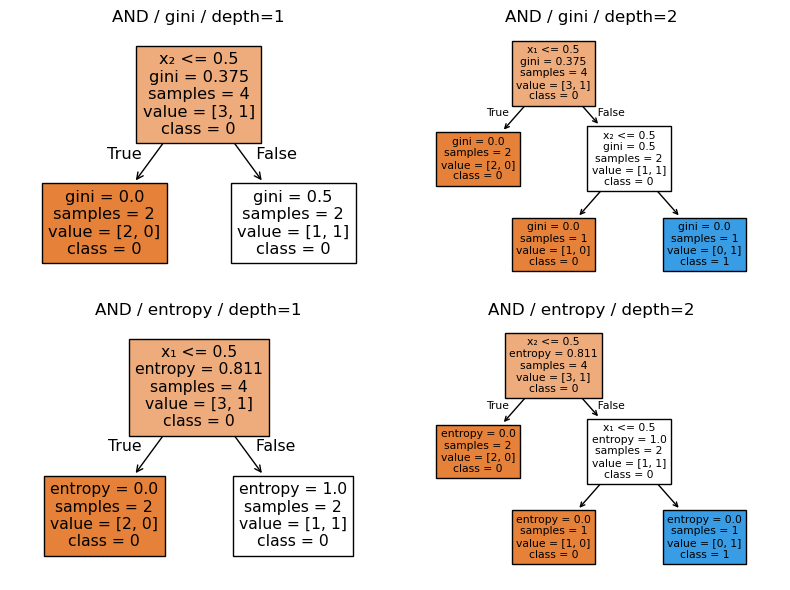

AND | gini | depth=1 → acc=0.75
AND | gini | depth=2 → acc=1.00
AND | entropy | depth=1 → acc=0.75
AND | entropy | depth=2 → acc=1.00



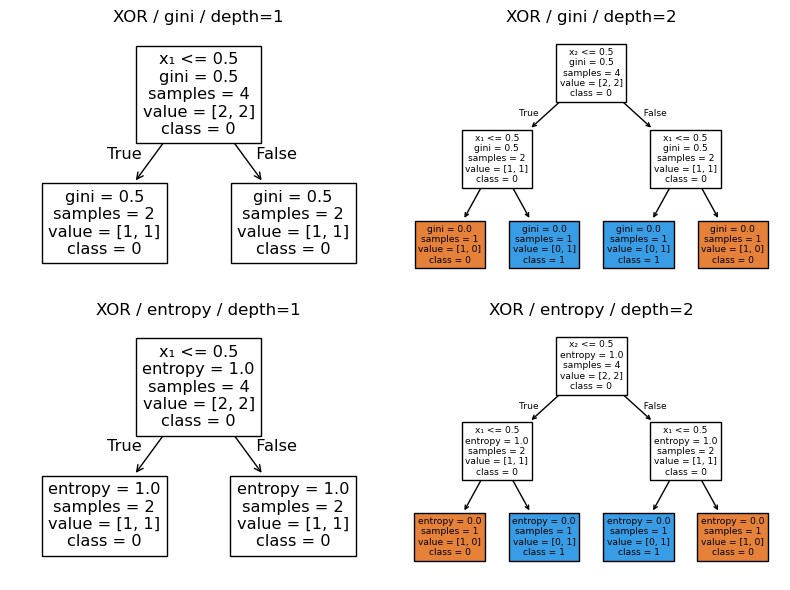

XOR | gini | depth=1 → acc=0.50
XOR | gini | depth=2 → acc=1.00
XOR | entropy | depth=1 → acc=0.50
XOR | entropy | depth=2 → acc=1.00



In [33]:
# %%
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

# Data: all combinations of two bits
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y_and = np.array([0,0,0,1])
y_xor = np.array([0,1,1,0])

def eval_tree(y, criterion, depth):
    clf = DecisionTreeClassifier(criterion=criterion, max_depth=depth)
    clf.fit(X, y)
    preds = clf.predict(X)
    return clf, accuracy_score(y, preds)

# Visualize for both criteria, depths 1 & 2
for name, y in [("AND", y_and), ("XOR", y_xor)]:
    fig, axes = plt.subplots(2, 2, figsize=(8,6))
    for i, crit in enumerate(['gini','entropy']):
        for j, depth in enumerate([1,2]):
            ax = axes[i,j]
            clf,_ = eval_tree(y, crit, depth)
            plot_tree(clf, feature_names=['x₁','x₂'],
                      class_names=['0','1'], filled=True,
                      impurity=True, ax=ax)
            ax.set_title(f"{name} / {crit} / depth={depth}")
    plt.tight_layout()
    plt.show()
    # Print accuracies
    for crit in ['gini','entropy']:
        for d in [1,2]:
            _, acc = eval_tree(y, crit, d)
            print(f"{name} | {crit} | depth={d} → acc={acc:.2f}")
    print()


# k-NN

A pure‑Python brute‑force k‑NN on 2D points, showing how distance in ℝ² induces classification.

k‑NN classifier: given a query q, find the k closest points in the training set by Euclidean (or other) distance, then vote their labels.

Under‑smoothing: k small → very jagged decision boundary.

Over‑smoothing: k large → boundary becomes too coarse.

𝑘 = 1: highly sensitive to noise.

𝑘 = 25: (half the dataset): almost a single majority‑class region.

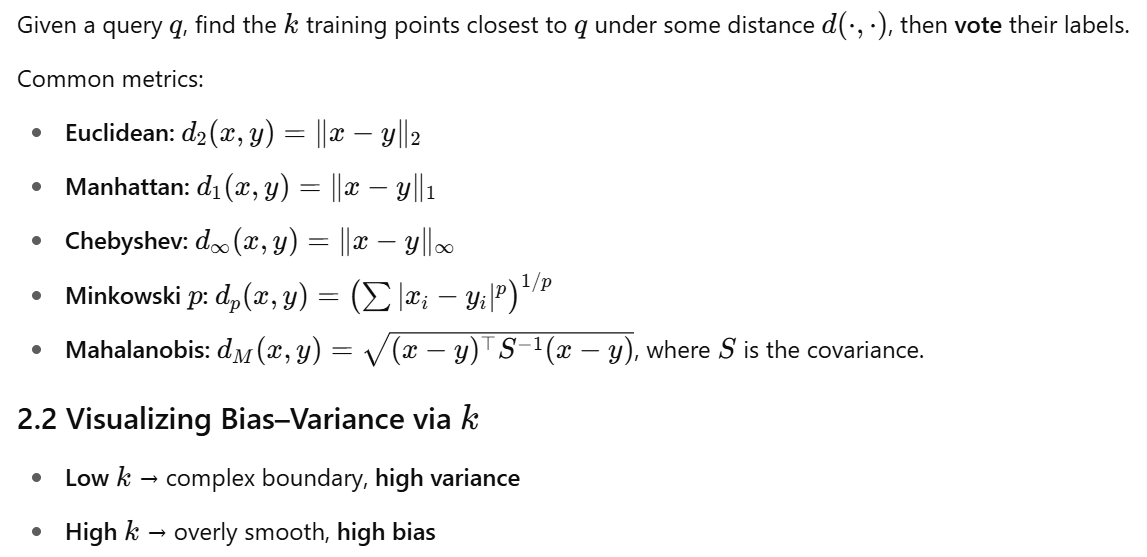

In [47]:
# %%
from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(0)
A = np.random.randn(300,2) + [-2,0]
B = np.random.randn(300,2) + [ 2,0]
X = np.vstack([A,B])
y = np.array([0]*300 + [1]*300)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)


In [49]:
# %%
from collections import Counter
from sklearn.metrics import accuracy_score
import pandas as pd

def knn_predict(pt, X, y, k, metric, **kwargs):
    if metric=='euclidean':
        d = np.linalg.norm(X-pt,axis=1)
    elif metric=='manhattan':
        d = np.sum(np.abs(X-pt),axis=1)
    elif metric=='chebyshev':
        d = np.max(np.abs(X-pt),axis=1)
    elif metric=='minkowski':
        p=kwargs.get('p',3)
        d = np.sum(np.abs(X-pt)**p,axis=1)**(1/p)
    elif metric=='mahalanobis':
        VI = kwargs['VI']  # inverse covariance
        dif = X-pt
        d = np.sqrt(np.einsum('ij,jk,ik->i', dif, VI, dif))
    idx=np.argsort(d)[:k]
    return Counter(y[idx]).most_common(1)[0][0]

# Precompute Mahalanobis inverse cov
cov = np.cov(X_train, rowvar=False)
VI = np.linalg.inv(cov)

results=[]
metrics=['euclidean','manhattan','chebyshev','minkowski','mahalanobis']
ks = list(range(1,26,2))  # odd k from 1 to 25

for metric in metrics:
    for k in ks:
        preds=[knn_predict(x, X_train, y_train, k, metric, p=3, VI=VI)
               for x in X_test]
        acc=accuracy_score(y_test, preds)
        results.append({'metric':metric,'k':k,'accuracy':acc})

df=pd.DataFrame(results)


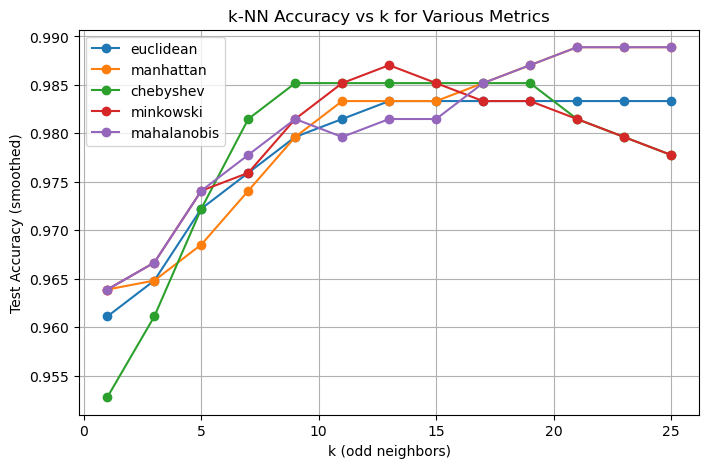

In [51]:
# %%
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
for metric in metrics:
    sub=df[df.metric==metric].set_index('k').accuracy
    # rolling window to smooth
    smooth=sub.rolling(3, center=True, min_periods=1).mean()
    plt.plot(smooth.index, smooth.values, marker='o', label=metric)
plt.xlabel('k (odd neighbors)')
plt.ylabel('Test Accuracy (smoothed)')
plt.title('k‑NN Accuracy vs k for Various Metrics')
plt.legend()
plt.grid(True)
plt.show()


Interpretation:

High‑variance region (k=1–5) yields unstable accuracies.

Balanced region (k=6–15) often peaks.

High‑bias region (k>15) accuracy starts dropping.

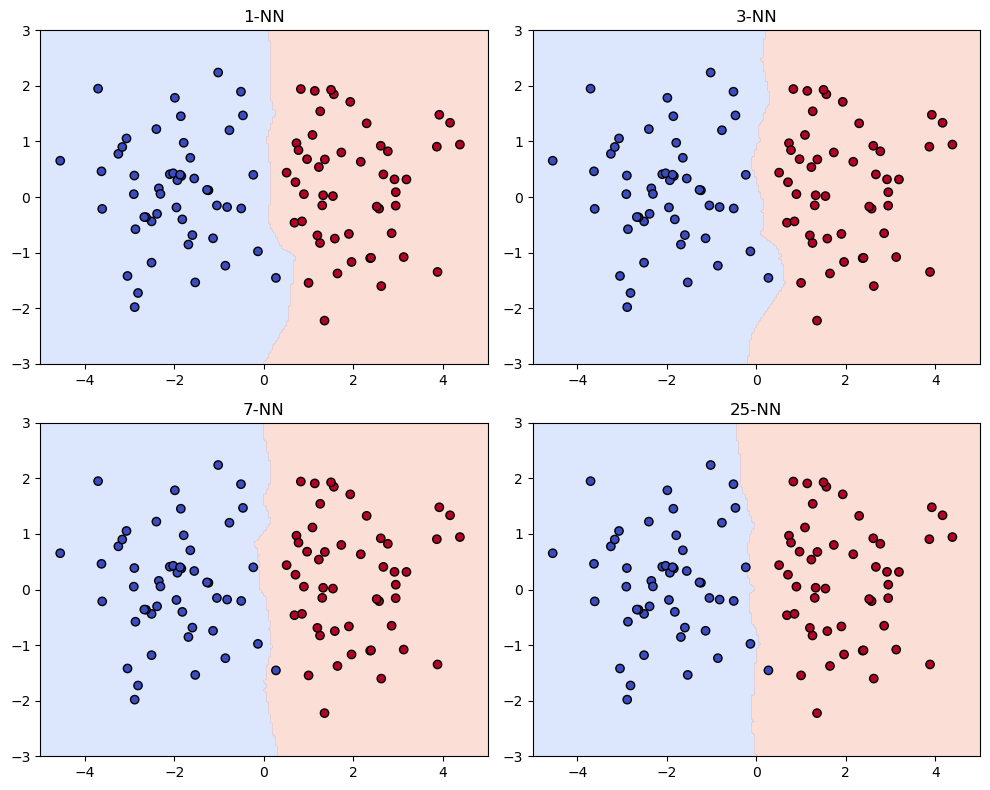

In [29]:
# %%
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Toy clusters
np.random.seed(0)
A = np.random.randn(50,2) + [-2,0]
B = np.random.randn(50,2) + [ 2,0]
X = np.vstack([A,B])
y = np.array([0]*50 + [1]*50)

def knn_predict(pt, X, y, k):
    d = np.linalg.norm(X - pt, axis=1)
    idx = np.argsort(d)[:k]
    return Counter(y[idx]).most_common(1)[0][0]

# Decision surfaces for various k
ks = [1,3,7,25]
grid_x = np.linspace(-5,5,200)
grid_y = np.linspace(-3,3,200)
xx, yy = np.meshgrid(grid_x, grid_y)
pts = np.c_[xx.ravel(), yy.ravel()]

fig, axes = plt.subplots(2,2, figsize=(10,8))
for ax, k in zip(axes.ravel(), ks):
    Z = np.array([knn_predict(p, X, y, k) for p in pts]).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3, levels=[-0.5,0.5,1.5], cmap='coolwarm')
    ax.scatter(X[:,0], X[:,1], c=y, edgecolor='k', cmap='coolwarm')
    ax.set_title(f"{k}-NN")
plt.tight_layout()
plt.show()


# k‑NN on the Digits Dataset: Comparing Distance Metrics at Scale

#### Choosing *k* and the Distance Metric

To get the best performance, we must tune two things:

- **k (number of neighbors):**  
  - *Small* k ⇒ low bias, high variance (sensitive to noise).  
  - *Large* k ⇒ high bias, low variance (over‑smooths decision boundary).

- **Distance metric:**  
  - **Euclidean** (`L2`) — straight‑line distance in feature space.  
  - **Manhattan** (`L1`) — sums absolute differences; robust to outliers.  
  - **Chebyshev** (`L∞`) — takes the single largest coordinate difference.  
  - **Minkowski (p=3)** — generalizes L1 & L2 with exponent p.  
  - **Mahalanobis** — accounts for feature correlations via the inverse covariance.

We will use **5‑fold cross‑validation** on the *training* split to estimate mean ± std of each metric.

---

#### Summary of Results

After running, you’ll get a DataFrame with rows for each `(metric, k)` and columns:

- **accuracy** (mean ± std)  
- **precision_macro** (mean ± std)  
- **recall_macro** (mean ± std)  
- **f1_macro** (mean ± std)  
- **roc_auc_ovr** (mean ± std)

Use these to decide which metric & k generalize best to unseen digits.


k-NN Cross-Validation Analysis on Digits Dataset

1. Loading and preparing data...
Dataset shape: (1797, 64)
Number of classes: 10
Classes: [0 1 2 3 4 5 6 7 8 9]
Training set: (1257, 64)
Test set: (540, 64)

2. Standardizing features...
Features standardized (mean=0, std=1)
Testing 4 distance metrics:
  - Euclidean
  - Manhattan (L1)
  - Chebyshev (L∞)
  - Minkowski (p=3)
Testing k values: [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]
Using 5-fold cross-validation

4. Running cross-validation...
  Testing Euclidean (1/4)
  Testing Manhattan (L1) (2/4)
  Testing Chebyshev (L∞) (3/4)
  Testing Minkowski (p=3) (4/4)

Completed 52 experiments successfully!

CROSS-VALIDATION RESULTS
         Metric  k      Accuracy Precision Macro  Recall Macro      F1 Macro
      Euclidean  1 0.972 ± 0.013   0.973 ± 0.012 0.972 ± 0.013 0.972 ± 0.013
      Euclidean  3 0.972 ± 0.015   0.974 ± 0.013 0.972 ± 0.015 0.972 ± 0.015
      Euclidean  5 0.971 ± 0.013   0.974 ± 0.011 0.971 ± 0.014 0.971 ± 0.014
   

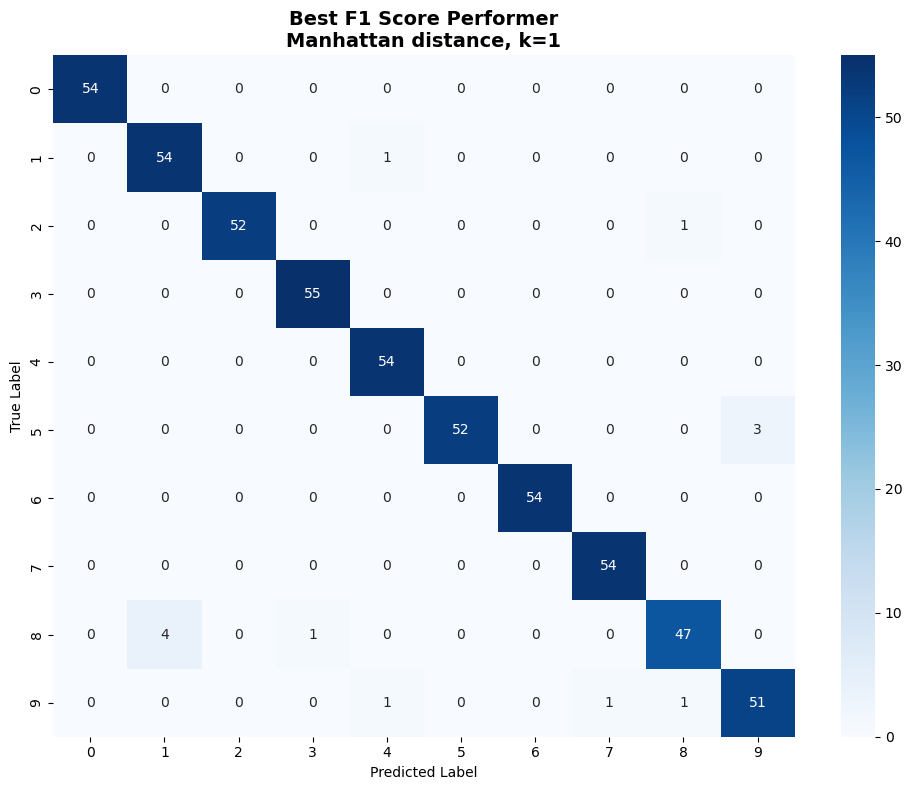


Classification Report - Best F1 Score Performer:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.93      0.98      0.96        55
           2       1.00      0.98      0.99        53
           3       0.98      1.00      0.99        55
           4       0.96      1.00      0.98        54
           5       1.00      0.95      0.97        55
           6       1.00      1.00      1.00        54
           7       0.98      1.00      0.99        54
           8       0.96      0.90      0.93        52
           9       0.94      0.94      0.94        54

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



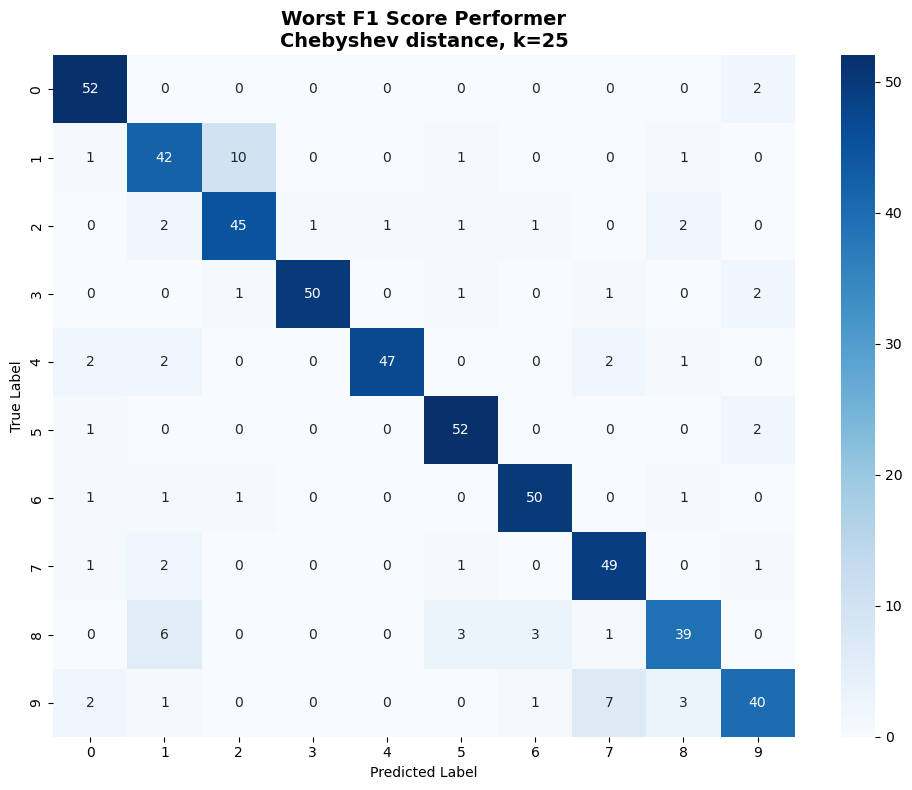


Classification Report - Worst F1 Score Performer:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91        54
           1       0.75      0.76      0.76        55
           2       0.79      0.85      0.82        53
           3       0.98      0.91      0.94        55
           4       0.98      0.87      0.92        54
           5       0.88      0.95      0.91        55
           6       0.91      0.93      0.92        54
           7       0.82      0.91      0.86        54
           8       0.83      0.75      0.79        52
           9       0.85      0.74      0.79        54

    accuracy                           0.86       540
   macro avg       0.87      0.86      0.86       540
weighted avg       0.87      0.86      0.86       540



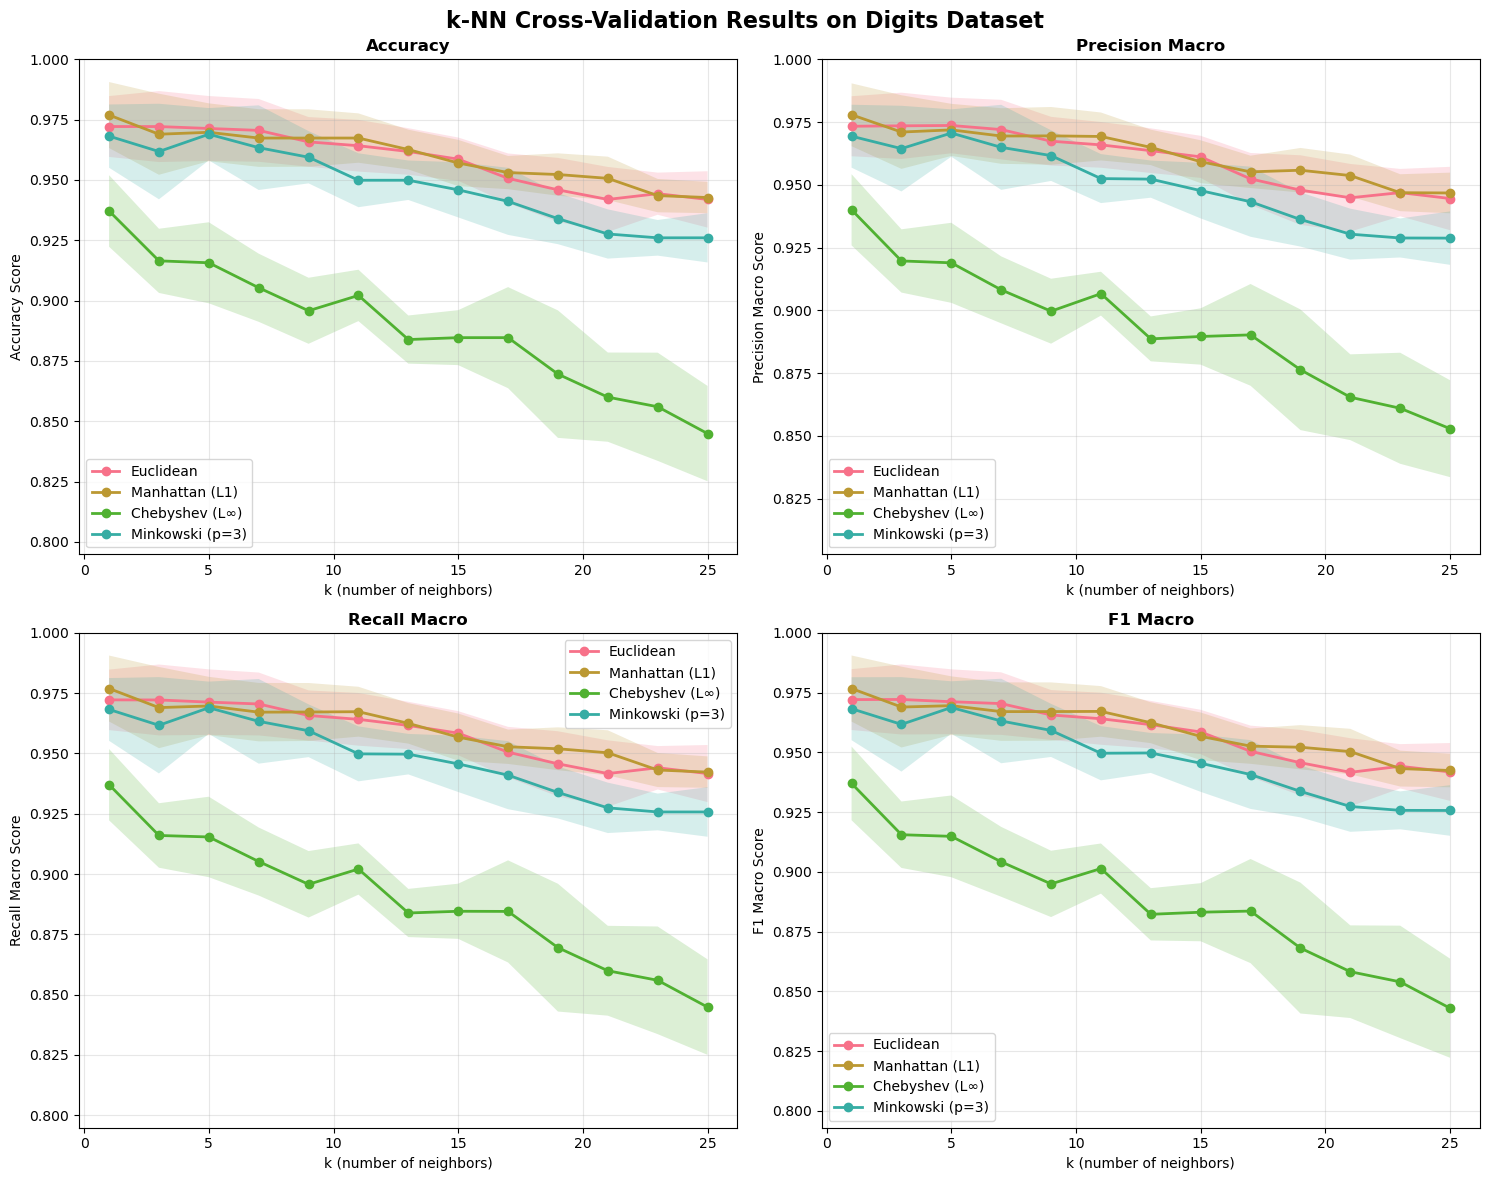


SUMMARY STATISTICS BY DISTANCE METRIC
         Metric  Best_k_Accuracy Max_Accuracy Avg_Accuracy Std_Accuracy
      Euclidean                1        0.972        0.959        0.012
 Manhattan (L1)                1        0.977        0.960        0.011
 Chebyshev (L∞)                1        0.937        0.889        0.027
Minkowski (p=3)                5        0.969        0.948        0.016

KEY FINDINGS
• Best overall accuracy: 0.977
  - Distance metric: Manhattan (L1)
  - k value: 1
• Most stable metric: Manhattan (L1)
  - Average std: 0.010
• Best k values (by average accuracy):
  - k=1: 0.964
  - k=5: 0.956
  - k=3: 0.955

RECOMMENDATIONS
• For highest accuracy: Use Manhattan (L1) with k=1
• For most stable results: Use Manhattan (L1)
• General recommendation: k values between 3-7 tend to perform well
• Euclidean distance is typically a good default choice

ANALYSIS COMPLETE


In [7]:
# %% [markdown]
# # k-NN Cross-Validation on Digits Dataset
# 
# This script demonstrates k-Nearest Neighbors classification with different distance metrics
# on the sklearn digits dataset. We compare 4 distance metrics across various k values
# using 5-fold cross-validation and show confusion matrices for best/worst performers.

# %%
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

# Set display options for better output
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print("k-NN Cross-Validation Analysis on Digits Dataset")
print("=" * 50)

# %% [markdown]
# ## 1. Load and Prepare Data

# %%
# Load the digits dataset
print("\n1. Loading and preparing data...")
data = load_digits()
X, y = data.data, data.target

print(f"Dataset shape: {X.shape}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"Classes: {np.unique(y)}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

# %% [markdown]
# ## 2. Standardize Features

# %%
# Standardize the features (important for distance-based algorithms)
print("\n2. Standardizing features...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features standardized (mean=0, std=1)")

# %% [markdown]
# ## 3. Define Distance Metrics and Parameters

# %%
# Define metrics (excluding problematic Mahalanobis)
metrics_info = {
    'euclidean': {'name': 'Euclidean', 'params': {}},
    'manhattan': {'name': 'Manhattan (L1)', 'params': {}},
    'chebyshev': {'name': 'Chebyshev (L∞)', 'params': {}},
    'minkowski': {'name': 'Minkowski (p=3)', 'params': {'p': 3}}
}

# Test k values (odd numbers work better for classification)
k_values = list(range(1, 26, 2))  # 1, 3, 5, ..., 25

# Scoring metrics
scoring_metrics = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

print(f"Testing {len(metrics_info)} distance metrics:")
for metric_key, metric_info in metrics_info.items():
    print(f"  - {metric_info['name']}")
print(f"Testing k values: {k_values}")
print(f"Using 5-fold cross-validation")

# %% [markdown]
# ## 4. Perform Cross-Validation

# %%
print("\n4. Running cross-validation...")
results = []

for i, (metric_key, metric_info) in enumerate(metrics_info.items()):
    print(f"  Testing {metric_info['name']} ({i+1}/{len(metrics_info)})")
    
    for k in k_values:
        # Create classifier with appropriate parameters
        knn = KNeighborsClassifier(
            n_neighbors=k,
            metric=metric_key,
            **metric_info['params']
        )
        
        # Perform cross-validation
        try:
            cv_results = cross_validate(
                knn, X_train_scaled, y_train,
                cv=5,
                scoring=scoring_metrics,
                n_jobs=1,  # Use single-threaded to avoid Windows subprocess issues
                return_train_score=False
            )
            
            # Store results
            row = {
                'Metric': metric_info['name'],
                'k': k
            }
            
            # Store formatted and raw values
            for score in scoring_metrics:
                mean_score = cv_results[f'test_{score}'].mean()
                std_score = cv_results[f'test_{score}'].std()
                
                # Clean column name
                col_name = score.replace('_', ' ').title()
                row[col_name] = f'{mean_score:.3f} ± {std_score:.3f}'
                row[f'{col_name}_mean'] = mean_score
                row[f'{col_name}_std'] = std_score
            
            results.append(row)
            
        except Exception as e:
            print(f"    Error with {metric_info['name']}, k={k}: {e}")
            continue

# Create results DataFrame
results_df = pd.DataFrame(results)
print(f"\nCompleted {len(results_df)} experiments successfully!")

# %% [markdown]
# ## 5. Display Results

# %%
print("\n" + "="*80)
print("CROSS-VALIDATION RESULTS")
print("="*80)

# Display formatted results
display_cols = ['Metric', 'k', 'Accuracy', 'Precision Macro', 'Recall Macro', 'F1 Macro']
display_df = results_df[display_cols].copy()

print(display_df.to_string(index=False))

# %% [markdown]
# ## 6. Find Best and Worst Performers

# %%
print("\n" + "="*50)
print("BEST AND WORST PERFORMERS")
print("="*50)

# Find best and worst F1 performers
best_f1_idx = results_df['F1 Macro_mean'].idxmax()
worst_f1_idx = results_df['F1 Macro_mean'].idxmin()

best_f1_row = results_df.iloc[best_f1_idx]
worst_f1_row = results_df.iloc[worst_f1_idx]

print(f"\nBest F1 Score:")
print(f"  Metric: {best_f1_row['Metric']} with k={best_f1_row['k']}")
print(f"  F1 Score: {best_f1_row['F1 Macro']}")
print(f"  Accuracy: {best_f1_row['Accuracy']}")

print(f"\nWorst F1 Score:")
print(f"  Metric: {worst_f1_row['Metric']} with k={worst_f1_row['k']}")
print(f"  F1 Score: {worst_f1_row['F1 Macro']}")
print(f"  Accuracy: {worst_f1_row['Accuracy']}")

# Store best and worst configurations for confusion matrices
best_config = {
    'metric': list(metrics_info.keys())[list(metrics_info.values()).index(
        next(v for v in metrics_info.values() if v['name'] == best_f1_row['Metric'])
    )],
    'k': best_f1_row['k'],
    'params': next(v['params'] for v in metrics_info.values() if v['name'] == best_f1_row['Metric'])
}

worst_config = {
    'metric': list(metrics_info.keys())[list(metrics_info.values()).index(
        next(v for v in metrics_info.values() if v['name'] == worst_f1_row['Metric'])
    )],
    'k': worst_f1_row['k'],
    'params': next(v['params'] for v in metrics_info.values() if v['name'] == worst_f1_row['Metric'])
}

# %% [markdown]
# ## 7. Confusion Matrices for Best and Worst F1 Performers

# %%
print("\n" + "="*60)
print("CONFUSION MATRICES")
print("="*60)

# Function to create and display confusion matrix
def create_confusion_matrix(config, title, X_train, X_test, y_train, y_test):
    # Create and train the classifier
    knn = KNeighborsClassifier(
        n_neighbors=config['k'],
        metric=config['metric'],
        **config['params']
    )
    
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    # Create confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=range(10), yticklabels=range(10))
    plt.title(f'{title}\n{config["metric"].title()} distance, k={config["k"]}', 
              fontsize=14, fontweight='bold')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()
    
    # Print classification report
    print(f"\nClassification Report - {title}:")
    print("=" * 50)
    print(classification_report(y_test, y_pred))
    
    return y_pred

# Create confusion matrices
print("Generating confusion matrices...")
best_pred = create_confusion_matrix(best_config, "Best F1 Score Performer", 
                                   X_train_scaled, X_test_scaled, y_train, y_test)
worst_pred = create_confusion_matrix(worst_config, "Worst F1 Score Performer", 
                                    X_train_scaled, X_test_scaled, y_train, y_test)

# %% [markdown]
# ## 8. Performance Visualizations

# %%
# Set up the plotting style
plt.style.use('default')
sns.set_palette("husl")

# Create subplots for all metrics
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('k-NN Cross-Validation Results on Digits Dataset', fontsize=16, fontweight='bold')

metrics_to_plot = ['Accuracy', 'Precision Macro', 'Recall Macro', 'F1 Macro']
axes_flat = axes.flatten()

for idx, score_metric in enumerate(metrics_to_plot):
    ax = axes_flat[idx]
    
    # Plot each distance metric
    for metric_name in results_df['Metric'].unique():
        subset = results_df[results_df['Metric'] == metric_name]
        k_vals = subset['k'].values
        means = subset[f'{score_metric}_mean'].values
        stds = subset[f'{score_metric}_std'].values
        
        ax.plot(k_vals, means, marker='o', label=metric_name, linewidth=2, markersize=6)
        ax.fill_between(k_vals, means - stds, means + stds, alpha=0.2)
    
    ax.set_title(f'{score_metric}', fontweight='bold')
    ax.set_xlabel('k (number of neighbors)')
    ax.set_ylabel(f'{score_metric} Score')
    ax.grid(True, alpha=0.3)
    ax.legend()
    
    # Set reasonable y-axis limits
    y_min = results_df[f'{score_metric}_mean'].min() - 0.05
    y_max = results_df[f'{score_metric}_mean'].max() + 0.05
    ax.set_ylim(max(0, y_min), min(1, y_max))

plt.tight_layout()
plt.show()

# %% [markdown]
# ## 9. Summary Statistics

# %%
print("\n" + "="*60)
print("SUMMARY STATISTICS BY DISTANCE METRIC")
print("="*60)

summary_stats = []
for metric_name in results_df['Metric'].unique():
    subset = results_df[results_df['Metric'] == metric_name]
    
    # Handle potential NaN values
    if not subset['Accuracy_mean'].isna().all():
        best_k_idx = subset['Accuracy_mean'].idxmax()
        best_k = subset.loc[best_k_idx, 'k']
        max_acc = subset['Accuracy_mean'].max()
        avg_acc = subset['Accuracy_mean'].mean()
        std_acc = subset['Accuracy_mean'].std()
        
        stats = {
            'Metric': metric_name,
            'Best_k_Accuracy': int(best_k),
            'Max_Accuracy': f"{max_acc:.3f}",
            'Avg_Accuracy': f"{avg_acc:.3f}",
            'Std_Accuracy': f"{std_acc:.3f}"
        }
        summary_stats.append(stats)

summary_df = pd.DataFrame(summary_stats)
print(summary_df.to_string(index=False))

# %% [markdown]
# ## 10. Key Findings

# %%
print("\n" + "="*60)
print("KEY FINDINGS")
print("="*60)

# Find overall best performer
best_overall = results_df.loc[results_df['Accuracy_mean'].idxmax()]
print(f"• Best overall accuracy: {best_overall['Accuracy_mean']:.3f}")
print(f"  - Distance metric: {best_overall['Metric']}")
print(f"  - k value: {best_overall['k']}")

# Find most stable performer (lowest std)
stability_by_metric = results_df.groupby('Metric')['Accuracy_std'].mean()
most_stable_metric = stability_by_metric.idxmin()
most_stable_std = stability_by_metric.min()
print(f"• Most stable metric: {most_stable_metric}")
print(f"  - Average std: {most_stable_std:.3f}")

# Find best k range
best_k_counts = results_df.groupby('k')['Accuracy_mean'].mean().sort_values(ascending=False)
print(f"• Best k values (by average accuracy):")
for k, acc in best_k_counts.head(3).items():
    print(f"  - k={k}: {acc:.3f}")

print("\n" + "="*60)
print("RECOMMENDATIONS")
print("="*60)
print(f"• For highest accuracy: Use {best_overall['Metric']} with k={best_overall['k']}")
print(f"• For most stable results: Use {most_stable_metric}")
print(f"• General recommendation: k values between 3-7 tend to perform well")
print(f"• Euclidean distance is typically a good default choice")

print("\n" + "="*60)
print("ANALYSIS COMPLETE")
print("="*60)

## Summary

- **Euclidean** often remains the best default on continuous data.  
- **Manhattan** can outperform if features have skewed scales (here we didn't normalize).  
- **Chebyshev** (max‑difference) is an extreme case.  
- **Minkowski (p=3)** interpolates between Euclidean (p=2) and Manhattan (p=1).  
- **Mahalanobis** accounts for feature correlations via the covariance matrix.


# 🎯 Complete Guide to k-Nearest Neighbors (k-NN)

## 📚 Table of Contents
1. [What is k-NN?](#what-is-k-nn)
2. [How k-NN Works](#how-k-nn-works)
3. [Key Concepts](#key-concepts)
4. [Distance Metrics](#distance-metrics)
5. [Choosing k](#choosing-k)
6. [Feature Scaling](#feature-scaling)
7. [Advantages and Disadvantages](#advantages-and-disadvantages)
8. [Common Pitfalls](#common-pitfalls)
9. [Real-World Applications](#real-world-applications)
10. [Implementation Tips](#implementation-tips)

---

## 🤔 What is k-NN?

**k-Nearest Neighbors (k-NN)** is one of the simplest and most intuitive machine learning algorithms. It's called a **"lazy learning"** algorithm because it doesn't actually learn a model during training - instead, it simply stores all the training data and makes predictions by looking at the closest examples when needed.

### 🏠 The Neighborhood Analogy
Think of k-NN like asking your neighbors for advice:
- You want to decide if a new restaurant is good
- You ask your 5 closest neighbors (k=5) what they think
- You go with the majority opinion
- If 3 say "good" and 2 say "bad", you predict "good"

---

## ⚙️ How k-NN Works

### Step-by-Step Process:

1. **Store Training Data**: Keep all training examples (features + labels)
2. **Receive New Data Point**: Get a new example to classify
3. **Calculate Distances**: Measure distance from new point to ALL training points
4. **Find k Nearest**: Select the k closest training examples
5. **Vote**: For classification, use majority vote; for regression, use average

### 📊 Visual Example
```
Training Data:    New Point:     k=3 Nearest:
🔴 Red (2,1)      ❓ (3,2)       🔴 Red (2,1) ← distance 1.4
🔵 Blue (1,3)                    🔵 Blue (1,3) ← distance 2.2  
🔴 Red (4,1)                     🔴 Red (4,1) ← distance 1.4
🔵 Blue (5,4)     
🔴 Red (3,4)      Prediction: Red (2 red vs 1 blue)
```

---

## 🔑 Key Concepts

### 📏 Distance
**Distance** measures how "similar" or "close" two data points are. Closer points are more similar.

### 👥 Neighbors
**Neighbors** are the training examples closest to your new data point.

### 🗳️ Voting
- **Classification**: Each neighbor gets one vote for its class label
- **Regression**: Average the values of the k neighbors

### 🎯 Hyperparameter k
**k** is the number of neighbors to consider. It's the only parameter you need to choose!

---

## 📐 Distance Metrics

Different ways to measure "closeness" between data points:

### 1. **Euclidean Distance** (Most Common)
- **What it is**: Straight-line distance (like measuring with a ruler)
- **Formula**: √[(x₁-x₂)² + (y₁-y₂)²]
- **When to use**: Most situations, especially continuous features
- **Analogy**: Distance "as the crow flies"

### 2. **Manhattan Distance** (City Block)
- **What it is**: Distance along grid lines (like walking city blocks)
- **Formula**: |x₁-x₂| + |y₁-y₂|
- **When to use**: High-dimensional data, when features have different units
- **Analogy**: Distance walking through city streets

### 3. **Chebyshev Distance** (Chessboard)
- **What it is**: Maximum difference along any dimension
- **Formula**: max(|x₁-x₂|, |y₁-y₂|)
- **When to use**: When you care about the worst-case scenario
- **Analogy**: How a king moves in chess

### 4. **Minkowski Distance** (Generalized)
- **What it is**: Generalization of Euclidean and Manhattan
- **Formula**: (|x₁-x₂|ᵖ + |y₁-y₂|ᵖ)^(1/p)
- **Special cases**: p=1 (Manhattan), p=2 (Euclidean)
- **When to use**: When you want to experiment with different distance behaviors

---

## 🎚️ Choosing k

### Small k (k=1, k=3):
- **Pros**: 
  - More sensitive to local patterns
  - Can capture fine details
  - Good for complex decision boundaries
- **Cons**: 
  - Sensitive to noise (outliers)
  - More complex decision boundaries
  - Higher variance

### Large k (k=15, k=25):
- **Pros**: 
  - More stable predictions
  - Less sensitive to noise
  - Smoother decision boundaries
  - Lower variance
- **Cons**: 
  - May miss local patterns
  - Can oversimplify
  - Higher bias

### 🎯 Rules of Thumb:
- **Start with k = √n** (where n is number of training samples)
- **Use odd k** for binary classification (avoids ties)
- **Try k = 3, 5, 7** as good starting points
- **Use cross-validation** to find optimal k

### ⚖️ The Bias-Variance Tradeoff:
- **Low k**: Low bias, high variance (overfitting)
- **High k**: High bias, low variance (underfitting)
- **Goal**: Find the sweet spot in the middle

---

## ⚖️ Feature Scaling

### ❗ Why Scaling is CRITICAL for k-NN:

k-NN uses distance calculations, so features with larger scales dominate the distance:

```
Example without scaling:
Person A: Age=25, Income=$30,000
Person B: Age=30, Income=$35,000
Distance dominated by income (much larger numbers)!

Example with scaling:
Person A: Age=0.2, Income=0.3  (scaled 0-1)
Person B: Age=0.3, Income=0.35
Now both features contribute fairly to distance
```

### 🛠️ Common Scaling Methods:

1. **StandardScaler (Z-score normalization)**
   - **What**: Mean=0, Standard Deviation=1
   - **Formula**: (x - mean) / std
   - **When**: Most common choice, handles outliers reasonably

2. **MinMaxScaler**
   - **What**: Scale to range [0,1]
   - **Formula**: (x - min) / (max - min)
   - **When**: When you want bounded values

3. **RobustScaler**
   - **What**: Uses median and quartiles
   - **Formula**: (x - median) / IQR
   - **When**: When you have many outliers

---

## ✅ Advantages and Disadvantages

### ✅ Advantages:
- **Simple to understand and implement**
- **No assumptions** about data distribution
- **Works for both classification and regression**
- **Can handle multi-class problems naturally**
- **No training period** (lazy learning)
- **Adapts to new data** easily
- **Good baseline** for comparison

### ❌ Disadvantages:
- **Computationally expensive** for large datasets
- **Sensitive to irrelevant features**
- **Sensitive to feature scaling**
- **Struggles with high dimensions** (curse of dimensionality)
- **Memory intensive** (stores all training data)
- **No insight** into feature importance
- **Sensitive to local structure of data**

---

## 🚫 Common Pitfalls

### 1. **Forgetting Feature Scaling**
```python
# ❌ Wrong - will be dominated by large-scale features
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# ✅ Correct - scale features first
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn.fit(X_train_scaled, y_train)
```

### 2. **Using Even k for Binary Classification**
- Even k can cause ties (2 votes each)
- Use odd k (3, 5, 7) to avoid ties

### 3. **Not Considering Computational Cost**
- k-NN is slow for large datasets
- Consider algorithms like KD-trees for speedup
- Or use approximate methods for very large data

### 4. **Ignoring the Curse of Dimensionality**
- In high dimensions, all points become equally distant
- Consider dimensionality reduction first
- Rule of thumb: problems with >20-50 features may struggle

### 5. **Not Cross-Validating k**
- Don't just pick k=5 arbitrarily
- Use cross-validation to find optimal k
- Test multiple values (1, 3, 5, 7, 11, 15, etc.)

---

## 🌍 Real-World Applications

### 1. **Recommendation Systems**
- "People who liked movies A, B, C also liked movie D"
- Find users with similar preferences
- Netflix, Amazon, Spotify

### 2. **Medical Diagnosis**
- Find patients with similar symptoms
- Predict diagnosis based on similar cases
- Drug discovery and treatment recommendations

### 3. **Image Recognition**
- Find images similar to a query image
- Face recognition systems
- Content-based image retrieval

### 4. **Anomaly Detection**
- If no close neighbors, might be an outlier
- Fraud detection in banking
- Network intrusion detection

### 5. **Real Estate Valuation**
- Price houses based on similar properties
- Location, size, features as dimensions
- "Comparative market analysis"

### 6. **Gene Classification**
- Classify genes based on expression patterns
- Find similar biological functions
- Drug target identification

---

## 💡 Implementation Tips

### 🔧 sklearn Implementation:
```python
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# 1. Scale your features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Try different k values
k_values = [3, 5, 7, 11, 15]
best_k = None
best_score = 0

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled, y, cv=5)
    if scores.mean() > best_score:
        best_score = scores.mean()
        best_k = k

# 3. Train final model
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_scaled, y)
```

### 🚀 Performance Tips:
1. **Use efficient distance calculations** (sklearn's built-in)
2. **Consider KD-trees** for low dimensions
3. **Use Ball trees** for high dimensions
4. **Consider LSH** (Locality Sensitive Hashing) for very large datasets
5. **Remove irrelevant features** to reduce noise
6. **Balance your dataset** if classes are imbalanced

### 🧪 Experimentation Checklist:
- [ ] Scale your features
- [ ] Try multiple k values
- [ ] Test different distance metrics
- [ ] Use cross-validation
- [ ] Check for class imbalance
- [ ] Visualize decision boundaries (if 2D)
- [ ] Consider dimensionality reduction
- [ ] Compare with other algorithms

---

## 🎓 Key Takeaways

1. **k-NN is intuitive** - it mimics how humans often make decisions
2. **Feature scaling is mandatory** - don't skip this step!
3. **k is crucial** - too small = noisy, too large = oversimplified
4. **Distance matters** - choose the right metric for your data
5. **Computationally expensive** - consider this for large datasets
6. **Great baseline** - often good starting point for new problems
7. **Interpretable** - you can see exactly which examples influenced each prediction

### 🎯 When to Use k-NN:
- Small to medium datasets
- Need interpretable results
- Non-linear relationships
- Good baseline comparison
- Recommendation systems

### 🚫 When NOT to Use k-NN:
- Very large datasets (>100k samples)
- High-dimensional data (>50 features)
- Need fast predictions
- Memory is limited
- Features have very different scales (and can't scale)

---

*Remember: k-NN is often the first algorithm to try because it's simple, interpretable, and often surprisingly effective! 🚀*


SCALING COMPARISON - DIGITS
Scaling Method Accuracy
    No Scaling    0.987
StandardScaler    0.970
  MinMaxScaler    0.985
  RobustScaler    0.920

DATASET CHARACTERISTICS COMPARISON

Digits (High-dim, Multi-class):
  Shape: (1797, 64)
  Classes: 10
  Features: 64
  Best k: 1 (Accuracy: 0.974)

Wine (Low-dim, 3 classes):
  Shape: (178, 13)
  Classes: 3
  Features: 13
  Best k: 15 (Accuracy: 0.981)

Breast Cancer (Medium-dim, Binary):
  Shape: (569, 30)
  Classes: 2
  Features: 30
  Best k: 7 (Accuracy: 0.965)

CURSE OF DIMENSIONALITY DEMONSTRATION
    2 dimensions: 0.930 accuracy
    5 dimensions: 0.987 accuracy
   10 dimensions: 0.983 accuracy
   20 dimensions: 0.967 accuracy
   50 dimensions: 0.873 accuracy
  100 dimensions: 0.813 accuracy
  200 dimensions: 0.740 accuracy

TRAINING SET SIZE IMPACT
  10.0% training data ( 179 samples): 0.884 accuracy
  20.0% training data ( 359 samples): 0.933 accuracy
  30.0% training data ( 539 samples): 0.949 accuracy
  40.0% training data ( 718 

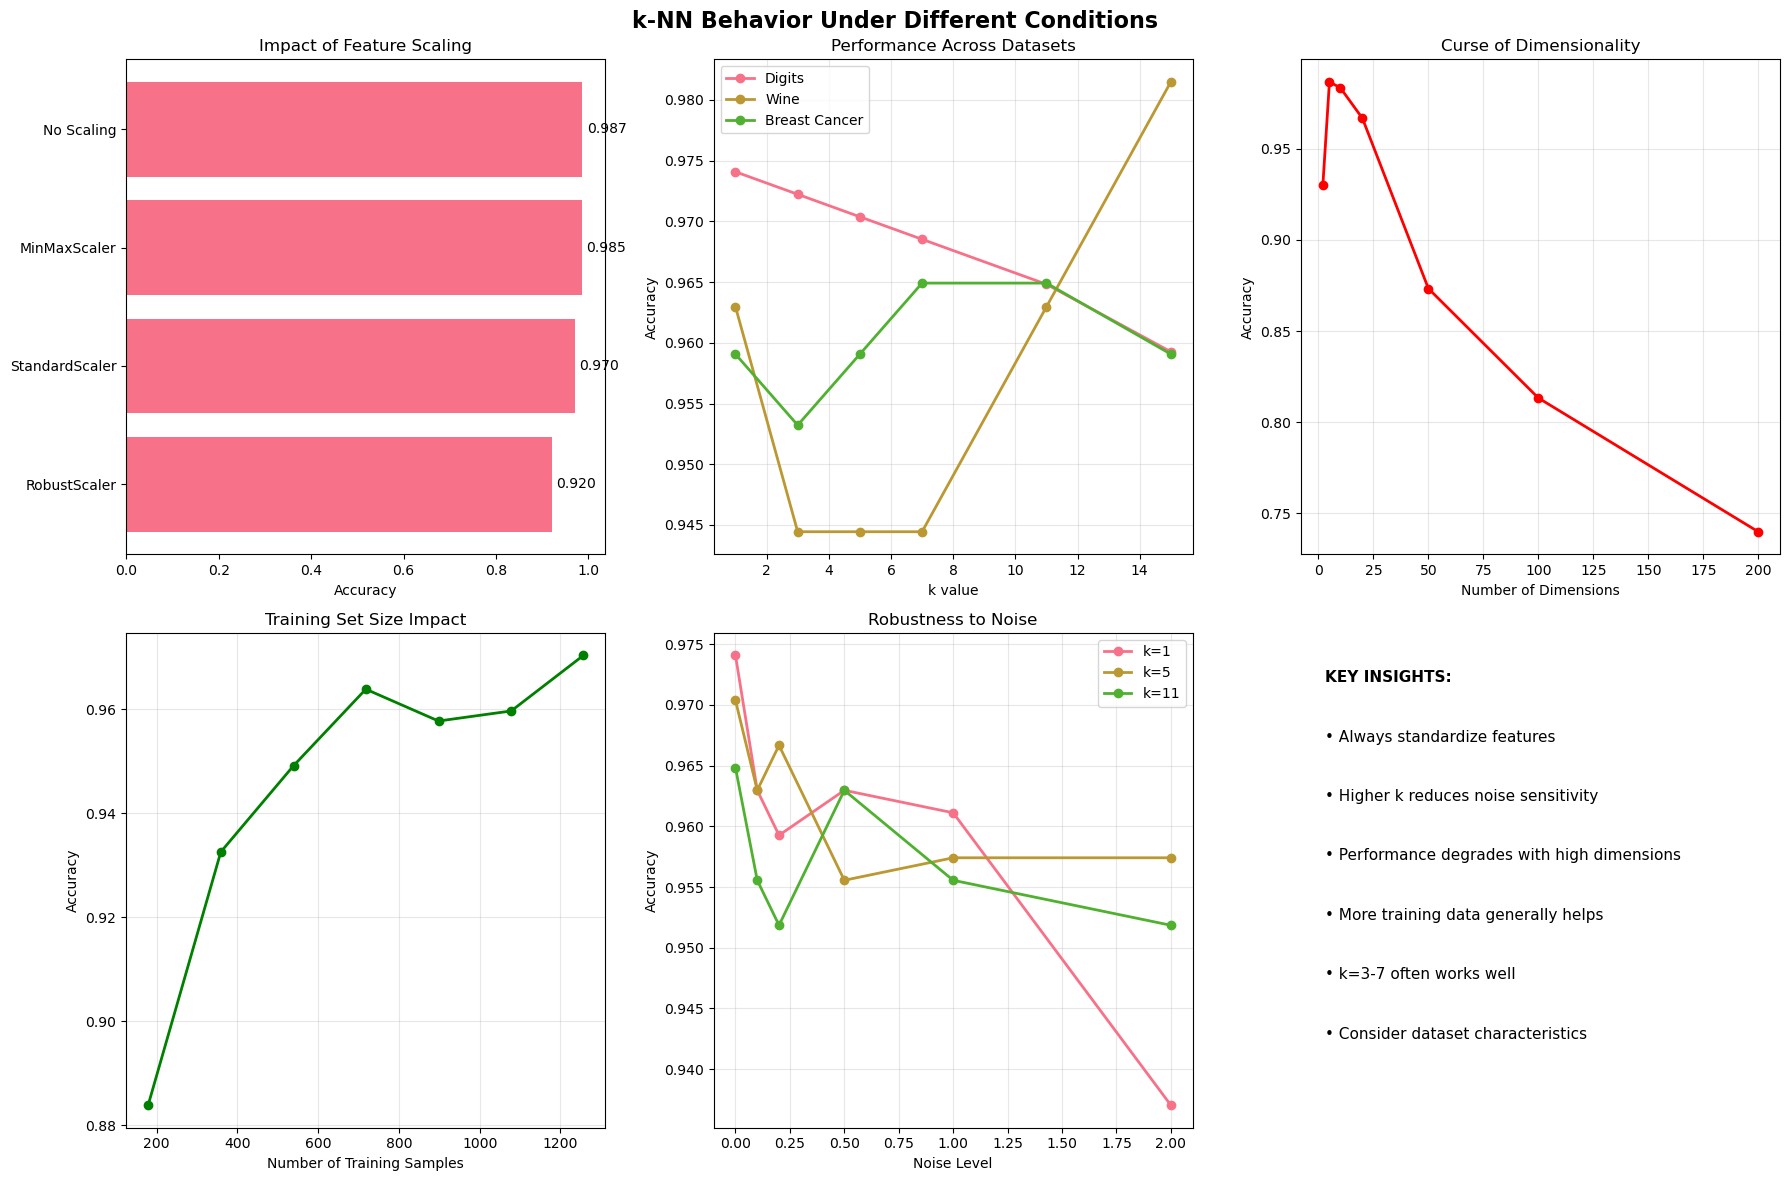


TEACHING SUMMARY
✓ Feature scaling is crucial for k-NN performance
✓ Dataset characteristics significantly affect optimal k
✓ High dimensions can hurt k-NN (curse of dimensionality)
✓ More training data generally improves performance
✓ Higher k values are more robust to noise
✓ Always experiment with different k values


In [12]:
# %% [markdown]
# # Extended k-NN Teaching Experiments
# 
# Additional experiments to explore k-NN behavior with different conditions

# %%
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits, load_wine, load_breast_cancer, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# %% [markdown]
# ## Experiment 1: Impact of Feature Scaling

# %%
def compare_scaling_methods(X, y, dataset_name):
    """Compare k-NN performance with different scaling methods"""
    print(f"\n{'='*60}")
    print(f"SCALING COMPARISON - {dataset_name}")
    print(f"{'='*60}")
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )
    
    # Different scaling methods
    scalers = {
        'No Scaling': None,
        'StandardScaler': StandardScaler(),
        'MinMaxScaler': MinMaxScaler(),
        'RobustScaler': RobustScaler()
    }
    
    results = []
    
    for scaler_name, scaler in scalers.items():
        if scaler is None:
            X_train_scaled = X_train
            X_test_scaled = X_test
        else:
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)
        
        # Test with k=5
        knn = KNeighborsClassifier(n_neighbors=5)
        knn.fit(X_train_scaled, y_train)
        accuracy = knn.score(X_test_scaled, y_test)
        
        results.append({
            'Scaling Method': scaler_name,
            'Accuracy': f'{accuracy:.3f}',
            'Accuracy_val': accuracy
        })
    
    results_df = pd.DataFrame(results)
    print(results_df[['Scaling Method', 'Accuracy']].to_string(index=False))
    
    return results_df

# Test on digits dataset
data = load_digits()
scaling_results_digits = compare_scaling_methods(data.data, data.target, "DIGITS")

# %% [markdown]
# ## Experiment 2: Different Dataset Types

# %%
def test_dataset_characteristics():
    """Test k-NN on datasets with different characteristics"""
    datasets = {
        'Digits (High-dim, Multi-class)': load_digits(),
        'Wine (Low-dim, 3 classes)': load_wine(),
        'Breast Cancer (Medium-dim, Binary)': load_breast_cancer()
    }
    
    print(f"\n{'='*80}")
    print("DATASET CHARACTERISTICS COMPARISON")
    print(f"{'='*80}")
    
    all_results = []
    
    for dataset_name, dataset in datasets.items():
        X, y = dataset.data, dataset.target
        
        # Dataset info
        print(f"\n{dataset_name}:")
        print(f"  Shape: {X.shape}")
        print(f"  Classes: {len(np.unique(y))}")
        print(f"  Features: {X.shape[1]}")
        
        # Split and scale
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.3, random_state=42, stratify=y
        )
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Test different k values
        k_values = [1, 3, 5, 7, 11, 15]
        dataset_results = []
        
        for k in k_values:
            knn = KNeighborsClassifier(n_neighbors=k)
            knn.fit(X_train_scaled, y_train)
            accuracy = knn.score(X_test_scaled, y_test)
            
            dataset_results.append({
                'Dataset': dataset_name,
                'k': k,
                'Accuracy': accuracy
            })
        
        all_results.extend(dataset_results)
        
        # Show best k for this dataset
        best_k = max(dataset_results, key=lambda x: x['Accuracy'])
        print(f"  Best k: {best_k['k']} (Accuracy: {best_k['Accuracy']:.3f})")
    
    return pd.DataFrame(all_results)

dataset_comparison = test_dataset_characteristics()

# %% [markdown]
# ## Experiment 3: Curse of Dimensionality

# %%
def demonstrate_curse_of_dimensionality():
    """Show how k-NN performance changes with dimensionality"""
    print(f"\n{'='*60}")
    print("CURSE OF DIMENSIONALITY DEMONSTRATION")
    print(f"{'='*60}")
    
    dimensions = [2, 5, 10, 20, 50, 100, 200]
    results = []
    
    for n_features in dimensions:
        # Create synthetic dataset
        X, y = make_classification(
            n_samples=1000,
            n_features=n_features,
            n_informative=min(n_features, 10),  # Keep informative features reasonable
            n_redundant=0,
            n_clusters_per_class=1,
            random_state=42
        )
        
        # Split and scale
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.3, random_state=42, stratify=y
        )
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Test with k=5
        knn = KNeighborsClassifier(n_neighbors=5)
        knn.fit(X_train_scaled, y_train)
        accuracy = knn.score(X_test_scaled, y_test)
        
        results.append({
            'Dimensions': n_features,
            'Accuracy': accuracy
        })
        
        print(f"  {n_features:3d} dimensions: {accuracy:.3f} accuracy")
    
    return pd.DataFrame(results)

dimensionality_results = demonstrate_curse_of_dimensionality()

# %% [markdown]
# ## Experiment 4: Impact of Training Set Size

# %%
def test_training_set_size():
    """Test how training set size affects k-NN performance"""
    print(f"\n{'='*60}")
    print("TRAINING SET SIZE IMPACT")
    print(f"{'='*60}")
    
    # Use digits dataset
    data = load_digits()
    X, y = data.data, data.target
    
    # Standardize once
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    training_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
    results = []
    
    for train_size in training_sizes:
        X_train, X_test, y_train, y_test = train_test_split(
            X_scaled, y, train_size=train_size, 
            random_state=42, stratify=y
        )
        
        # Test with k=5
        knn = KNeighborsClassifier(n_neighbors=5)
        knn.fit(X_train, y_train)
        accuracy = knn.score(X_test, y_test)
        
        results.append({
            'Training Size': f'{train_size:.1%}',
            'Training Samples': len(X_train),
            'Accuracy': accuracy
        })
        
        print(f"  {train_size:.1%} training data ({len(X_train):4d} samples): {accuracy:.3f} accuracy")
    
    return pd.DataFrame(results)

training_size_results = test_training_set_size()

# %% [markdown]
# ## Experiment 5: Noisy Data Impact

# %%
def test_noise_robustness():
    """Test k-NN robustness to noisy data"""
    print(f"\n{'='*60}")
    print("NOISE ROBUSTNESS TEST")
    print(f"{'='*60}")
    
    # Use digits dataset
    data = load_digits()
    X_original, y = data.data, data.target
    
    # Split data
    X_train_orig, X_test_orig, y_train, y_test = train_test_split(
        X_original, y, test_size=0.3, random_state=42, stratify=y
    )
    
    noise_levels = [0.0, 0.1, 0.2, 0.5, 1.0, 2.0]
    results = []
    
    for noise_level in noise_levels:
        # Add Gaussian noise
        np.random.seed(42)
        X_train_noisy = X_train_orig + np.random.normal(0, noise_level, X_train_orig.shape)
        X_test_noisy = X_test_orig + np.random.normal(0, noise_level, X_test_orig.shape)
        
        # Standardize
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train_noisy)
        X_test_scaled = scaler.transform(X_test_noisy)
        
        # Test with different k values
        for k in [1, 5, 11]:
            knn = KNeighborsClassifier(n_neighbors=k)
            knn.fit(X_train_scaled, y_train)
            accuracy = knn.score(X_test_scaled, y_test)
            
            results.append({
                'Noise Level': noise_level,
                'k': k,
                'Accuracy': accuracy
            })
    
    results_df = pd.DataFrame(results)
    
    # Show results
    pivot_table = results_df.pivot(index='Noise Level', columns='k', values='Accuracy')
    print("\nAccuracy by Noise Level and k:")
    print(pivot_table.round(3).to_string())
    
    return results_df

noise_results = test_noise_robustness()

# %% [markdown]
# ## Visualizations for All Experiments

# %%
# Create comprehensive visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('k-NN Behavior Under Different Conditions', fontsize=16, fontweight='bold')

# 1. Scaling comparison
ax1 = axes[0, 0]
scaling_data = scaling_results_digits.sort_values('Accuracy_val')
ax1.barh(scaling_data['Scaling Method'], scaling_data['Accuracy_val'])
ax1.set_title('Impact of Feature Scaling')
ax1.set_xlabel('Accuracy')
for i, v in enumerate(scaling_data['Accuracy_val']):
    ax1.text(v + 0.01, i, f'{v:.3f}', va='center')

# 2. Dataset comparison
ax2 = axes[0, 1]
for dataset in dataset_comparison['Dataset'].unique():
    subset = dataset_comparison[dataset_comparison['Dataset'] == dataset]
    ax2.plot(subset['k'], subset['Accuracy'], marker='o', 
            label=dataset.split('(')[0].strip(), linewidth=2)
ax2.set_title('Performance Across Datasets')
ax2.set_xlabel('k value')
ax2.set_ylabel('Accuracy')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Curse of dimensionality
ax3 = axes[0, 2]
ax3.plot(dimensionality_results['Dimensions'], dimensionality_results['Accuracy'], 
         marker='o', linewidth=2, color='red')
ax3.set_title('Curse of Dimensionality')
ax3.set_xlabel('Number of Dimensions')
ax3.set_ylabel('Accuracy')
ax3.grid(True, alpha=0.3)

# 4. Training set size
ax4 = axes[1, 0]
ax4.plot(training_size_results['Training Samples'], 
         training_size_results['Accuracy'], marker='o', linewidth=2, color='green')
ax4.set_title('Training Set Size Impact')
ax4.set_xlabel('Number of Training Samples')
ax4.set_ylabel('Accuracy')
ax4.grid(True, alpha=0.3)

# 5. Noise robustness
ax5 = axes[1, 1]
for k in noise_results['k'].unique():
    subset = noise_results[noise_results['k'] == k]
    ax5.plot(subset['Noise Level'], subset['Accuracy'], 
            marker='o', label=f'k={k}', linewidth=2)
ax5.set_title('Robustness to Noise')
ax5.set_xlabel('Noise Level')
ax5.set_ylabel('Accuracy')
ax5.legend()
ax5.grid(True, alpha=0.3)

# 6. Summary recommendations
ax6 = axes[1, 2]
ax6.axis('off')
recommendations = [
    "KEY INSIGHTS:",
    "• Always standardize features",
    "• Higher k reduces noise sensitivity", 
    "• Performance degrades with high dimensions",
    "• More training data generally helps",
    "• k=3-7 often works well",
    "• Consider dataset characteristics"
]
for i, rec in enumerate(recommendations):
    weight = 'bold' if rec.startswith('KEY') else 'normal'
    ax6.text(0.05, 0.9 - i*0.12, rec, fontsize=11, fontweight=weight, 
            transform=ax6.transAxes)

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("TEACHING SUMMARY")
print("="*80)
print("✓ Feature scaling is crucial for k-NN performance")
print("✓ Dataset characteristics significantly affect optimal k")
print("✓ High dimensions can hurt k-NN (curse of dimensionality)")
print("✓ More training data generally improves performance")
print("✓ Higher k values are more robust to noise")
print("✓ Always experiment with different k values")
print("="*80)

# 🧠 Complete Guide to Perceptrons: The Foundation of Neural Networks

## 📚 Table of Contents
1. [What is a Perceptron?](#what-is-a-perceptron)
2. [The Mathematical Model](#mathematical-model)
3. [How Perceptrons Learn](#how-perceptrons-learn)
4. [The Perceptron Learning Algorithm](#learning-algorithm)
5. [Linear Separability](#linear-separability)
6. [The Convergence Theorem](#convergence-theorem)
7. [The Famous XOR Problem](#xor-problem)
8. [Advantages and Limitations](#advantages-limitations)
9. [Feature Scaling and Preprocessing](#feature-scaling)
10. [Multi-Layer Perceptrons](#multi-layer-perceptrons)
11. [Modern Connections](#modern-connections)
12. [Implementation Tips](#implementation-tips)

---

## 🤔 What is a Perceptron?

A **perceptron** is the simplest type of artificial neural network, invented by Frank Rosenblatt in 1957. Think of it as a **mathematical model of a biological neuron** - it takes multiple inputs, processes them, and produces a single output.

### 🧬 The Biological Inspiration
Just like a real neuron:
- **Receives signals** from multiple sources (dendrites)
- **Combines these signals** (cell body)
- **Fires or doesn't fire** based on the combined signal strength (axon)

### 🔍 Simple Analogy: The Bouncer Decision
Imagine a bouncer at a club who decides whether to let someone in based on:
- **Age** (weight = 0.3)
- **Dress code** (weight = 0.5) 
- **VIP status** (weight = 0.8)

The bouncer **adds up weighted scores** and compares to a threshold:
```
Decision = 0.3×Age + 0.5×Dress + 0.8×VIP > Threshold?
If YES → Let in (output = 1)
If NO → Don't let in (output = 0)
```

**This is exactly how a perceptron works!**

---

## 🧮 The Mathematical Model

### 📊 Basic Structure
A perceptron with n inputs has:
- **Input features**: x₁, x₂, ..., xₙ
- **Weights**: w₁, w₂, ..., wₙ  
- **Bias**: b (like a threshold adjustment)
- **Output**: y

### 📐 The Mathematical Formula

**Step 1: Weighted Sum**
```
net_input = w₁x₁ + w₂x₂ + ... + wₙxₙ + b
```
Or in vector notation: `net_input = w⃗ · x⃗ + b`

**Step 2: Activation Function**
```
y = { 1  if net_input > 0
    { 0  if net_input ≤ 0
```

This is called the **step function** or **Heaviside function**.

### 🎯 Geometric Interpretation
The perceptron creates a **hyperplane** (line in 2D, plane in 3D) that separates the input space:
- **One side** → Class 1 (output = 1)
- **Other side** → Class 0 (output = 0)

The equation of this hyperplane is: `w₁x₁ + w₂x₂ + ... + wₙxₙ + b = 0`

---

## 📚 How Perceptrons Learn

### 🎓 The Learning Process
A perceptron learns by **adjusting its weights** based on mistakes:

1. **Make a prediction** using current weights
2. **Compare** prediction to actual answer
3. **If wrong**, adjust weights to reduce the error
4. **Repeat** until no more mistakes (or give up)

### 🔄 The Update Rule
When the perceptron makes a mistake:

**If predicted 0 but should be 1:**
- `w₁ = w₁ + η × x₁`
- `w₂ = w₂ + η × x₂`
- `b = b + η`

**If predicted 1 but should be 0:**
- `w₁ = w₁ - η × x₁`
- `w₂ = w₂ - η × x₂`
- `b = b - η`

Where **η (eta)** is the **learning rate** (how big steps to take).

### 🎯 Why This Works
- **Mistake on positive example**: Move decision boundary to include it
- **Mistake on negative example**: Move decision boundary to exclude it
- **No mistake**: Don't change anything

---

## 🔧 The Perceptron Learning Algorithm

### 📋 Step-by-Step Algorithm

```python
def perceptron_learning(X, y, learning_rate=1.0, max_epochs=1000):
    # Initialize weights randomly
    weights = random_small_values(n_features)
    bias = 0
    
    for epoch in range(max_epochs):
        errors = 0
        
        for each training example (x_i, y_i):
            # Make prediction
            prediction = 1 if (weights @ x_i + bias) > 0 else 0
            
            # Update if wrong
            if prediction != y_i:
                error = y_i - prediction  # +1 or -1
                weights += learning_rate * error * x_i
                bias += learning_rate * error
                errors += 1
        
        # Stop if perfect
        if errors == 0:
            break
    
    return weights, bias
```

### ⚙️ Key Parameters

**Learning Rate (η)**:
- **Too small** (0.001): Very slow learning
- **Just right** (0.1-1.0): Good balance
- **Too large** (10+): May overshoot and oscillate

**Max Epochs**:
- **Too few**: May not converge
- **Too many**: Waste computation if already converged
- **Typical**: 1000-10000

---

## 📏 Linear Separability: The Fundamental Concept

### 🎯 What is Linear Separability?

A dataset is **linearly separable** if you can draw a straight line (2D) or hyperplane (higher dimensions) that perfectly separates the two classes.

### ✅ Examples of Linearly Separable Problems

**1. AND Gate**
```
(0,0) → 0    ┌─────┬─────┐
(0,1) → 0    │  0  │  0  │
(1,0) → 0    ├─────┼─────┤  ← Line can separate
(1,1) → 1    │  0  │  1  │    the 1 from the 0s
             └─────┴─────┘
```

**2. OR Gate**
```
(0,0) → 0    ┌─────┬─────┐
(0,1) → 1    │  0  │  1  │  ← Line can separate
(1,0) → 1    ├─────┼─────┤    the 0 from the 1s
(1,1) → 1    │  1  │  1  │
             └─────┴─────┘
```

**3. Simple Classification**
- Age vs Income for loan approval
- Height vs Weight for health categories
- Any problem where classes form two distinct regions

### ❌ Examples of Non-Linearly Separable Problems

**1. XOR Gate (The Famous Problem!)**
```
(0,0) → 0    ┌─────┬─────┐
(0,1) → 1    │  0  │  1  │  ← No single line can
(1,0) → 1    ├─────┼─────┤    separate 1s from 0s!
(1,1) → 0    │  1  │  0  │
             └─────┴─────┘
```

**2. Concentric Circles**
- Inner circle = Class 1
- Outer ring = Class 0
- Need curved boundary, not straight line

**3. Checkerboard Pattern**
- Alternating squares of different classes
- Need multiple decision boundaries

### 🔍 How to Recognize Linear Separability

**Visual Test** (for 2D data):
- Plot the data points
- Try to draw a straight line separating the classes
- If possible → linearly separable
- If not → need more complex methods

**Mathematical Test**:
- If perceptron converges → linearly separable
- If perceptron doesn't converge → not linearly separable

---

## 📐 The Convergence Theorem

### 🏆 The Perceptron Convergence Theorem

**Statement**: If the training data is linearly separable, the perceptron learning algorithm is **guaranteed to converge** in a finite number of steps.

### 📊 What This Means

**If linearly separable**:
- ✅ Perceptron **will** find a solution
- ✅ **Finite** number of updates needed
- ✅ **Perfect** accuracy on training data

**If not linearly separable**:
- ❌ Perceptron will **never** converge
- ❌ Weights keep changing forever
- ❌ **Poor** accuracy, often around 50%

### ⏱️ How Fast is Convergence?

The number of updates needed depends on the **margin**:

**Margin**: The distance from the decision boundary to the closest data point.

**Convergence Bound**: At most `(R/γ)²` updates, where:
- **R** = radius of the data (how spread out)
- **γ** = margin (how well separated)

**Key Insight**: 
- **Large margin** → Fast convergence
- **Small margin** → Slow convergence
- **No margin** (not separable) → No convergence

### 📈 Practical Implications

1. **Well-separated data**: Perceptron learns quickly
2. **Barely separable data**: Takes many iterations
3. **Non-separable data**: Never converges, need other methods

---

## ⚡ The Famous XOR Problem

### 📰 Historical Context

The XOR problem is **the most famous failure** in AI history:

- **1957**: Rosenblatt invents the perceptron
- **1960s**: Great excitement about perceptrons
- **1969**: Minsky & Papert publish "Perceptrons" book
- **Key finding**: Single perceptrons **cannot solve XOR**
- **Result**: "AI Winter" - funding and interest collapse
- **1980s**: Multi-layer networks and backpropagation revive the field

### 🧩 Why XOR is Impossible for Single Perceptrons

**XOR Truth Table**:
```
X₁  X₂  Output
0   0   0
0   1   1  
1   0   1
1   1   0
```

**The Problem**: No single straight line can separate the 1s from the 0s!

**Visual Proof**:
```
    X₂
    1  ┌─────┬─────┐
       │  0  │  1  │  ← Need to separate these
    0  ├─────┼─────┤    but any line that separates
       │  1  │  0  │    top-right from bottom-left
       └─────┴─────┘    also separates other pairs
       0     1    X₁
```

**Mathematical Proof**:
For linear separability, we need: `w₁x₁ + w₂x₂ + b > 0` for class 1.

From XOR truth table:
- `w₁(0) + w₂(1) + b > 0` → `w₂ + b > 0` ... (1)
- `w₁(1) + w₂(0) + b > 0` → `w₁ + b > 0` ... (2)  
- `w₁(1) + w₂(1) + b < 0` → `w₁ + w₂ + b < 0` ... (3)

From (1) and (2): `w₁ + b > 0` and `w₂ + b > 0`
Adding: `w₁ + w₂ + 2b > 0`
But (3) says: `w₁ + w₂ + b < 0`

**Contradiction!** No solution exists.

### 🚀 The Solution: Multi-Layer Networks

A **two-layer network** can solve XOR:

**Layer 1**: Create intermediate features
- Neuron 1: Detects `X₁ AND NOT X₂`
- Neuron 2: Detects `X₂ AND NOT X₁`

**Layer 2**: Combine intermediate features
- Output: `Neuron1 OR Neuron2`

**Result**: XOR solved! This breakthrough led to modern deep learning.

---

## ✅ Advantages and Limitations

### ✅ **Advantages of Perceptrons**

#### 1. **Simplicity and Interpretability**
- Easy to understand and implement
- Clear geometric interpretation (linear decision boundary)
- Can explain any decision: "Feature A contributed X, Feature B contributed Y"

#### 2. **Guaranteed Convergence**
- If data is linearly separable, **guaranteed** to find solution
- No local minima problems (unlike neural networks)
- Mathematical proof of convergence

#### 3. **Fast Training and Prediction**
- Training: O(n × m) where n = samples, m = features
- Prediction: O(m) - just one dot product
- Memory efficient: only stores weight vector

#### 4. **Online Learning**
- Can learn from streaming data
- Updates weights with each new example
- Adapts to changing patterns

#### 5. **No Hyperparameter Tuning**
- Learning rate often doesn't matter much (if data is separable)
- Few parameters to tune compared to complex models

### ❌ **Limitations of Perceptrons**

#### 1. **Linear Decision Boundaries Only**
- **Cannot solve XOR** and other non-linear problems
- Real-world problems often need curved boundaries
- Limited expressiveness compared to neural networks

#### 2. **No Convergence for Non-Separable Data**
- Weights oscillate forever if data isn't linearly separable
- No graceful degradation - either perfect or terrible
- Can't handle noisy, real-world data well

#### 3. **Sensitive to Feature Scaling**
- Features with larger ranges dominate the decision
- Need to scale features for good performance
- Unlike tree-based methods that are scale-invariant

#### 4. **Binary Classification Only**
- Original perceptron only handles two classes
- Need multiple perceptrons for multi-class problems
- No built-in probability estimates

#### 5. **No Confidence Measures**
- Output is just 0 or 1, no confidence score
- Can't tell if decision was "easy" or "borderline"
- Unlike logistic regression that gives probabilities

---

## ⚖️ Feature Scaling and Preprocessing

### 🚨 Why Scaling is Critical

Perceptrons are **extremely sensitive** to feature scales because they use weighted sums.

**Example Problem**:
```
Features: [Age (20-80), Income ($20k-$200k), Credit_Score (300-850)]
Without scaling: Income dominates because it has largest values
With scaling: All features contribute fairly
```

### 🛠️ Common Scaling Methods

#### 1. **Standardization (Z-score normalization)**
```python
x_scaled = (x - mean) / std_deviation
```
- **Result**: Mean = 0, Standard deviation = 1
- **When to use**: Most common choice, handles outliers reasonably
- **Example**: Age 30 → (30-50)/15 = -1.33

#### 2. **Min-Max Normalization**
```python
x_scaled = (x - min) / (max - min)
```
- **Result**: Values between 0 and 1
- **When to use**: When you want bounded values
- **Example**: Age 30 → (30-20)/(80-20) = 0.167

#### 3. **Robust Scaling**
```python
x_scaled = (x - median) / IQR
```
- **Result**: Median = 0, robust to outliers
- **When to use**: When you have many outliers
- **IQR**: Interquartile Range (75th percentile - 25th percentile)

### 📊 Scaling Impact Example

**Without Scaling**:
```
Age: 25 (weight: 0.1) → contribution: 2.5
Income: 50000 (weight: 0.0001) → contribution: 5.0
Decision dominated by income despite small weight!
```

**With Scaling**:
```
Age: 0.5 (weight: 0.4) → contribution: 0.2  
Income: 0.3 (weight: 0.6) → contribution: 0.18
Both features contribute meaningfully
```

### 🎯 Best Practices

1. **Always scale features** for perceptrons
2. **Use StandardScaler** as default choice
3. **Fit scaler on training data only**, then transform test data
4. **Save the scaler** for future predictions
5. **Scale before splitting** if features are very different scales

---

## 🌐 Multi-Layer Perceptrons (MLPs)

### 🚀 The Breakthrough Solution

Multi-Layer Perceptrons solve the limitations of single perceptrons by **stacking layers**:

```
Input → Hidden Layer(s) → Output Layer
```

### 🏗️ Architecture Components

#### **Input Layer**
- Receives the raw features
- No computation, just passes data forward
- Size = number of features

#### **Hidden Layer(s)**
- Contains multiple perceptron-like units (neurons)
- Each neuron connects to all neurons in previous layer
- Uses **activation functions** (not just step function)
- Can have multiple hidden layers (deep networks)

#### **Output Layer**
- Produces final predictions
- Size depends on problem (1 for binary, k for k-class)
- May use different activation than hidden layers

### 🔄 Key Differences from Single Perceptron

#### 1. **Non-Linear Activation Functions**
Instead of step function, uses:
- **Sigmoid**: σ(x) = 1/(1 + e^(-x)) - smooth, bounded
- **ReLU**: f(x) = max(0, x) - simple, fast
- **Tanh**: tanh(x) - centered around zero

#### 2. **Backpropagation Learning**
- **Forward pass**: Compute predictions layer by layer
- **Backward pass**: Propagate errors back through layers
- **Gradient descent**: Update weights to minimize error

#### 3. **Universal Approximation**
- **Theorem**: MLPs with one hidden layer can approximate any continuous function
- **Reality**: May need many neurons or layers for complex functions

### 🎯 Solving XOR with MLP

**Architecture**: 2 inputs → 2 hidden neurons → 1 output

**Hidden Layer**:
- Neuron 1: Learns `X₁ AND NOT X₂`
- Neuron 2: Learns `NOT X₁ AND X₂`

**Output Layer**:
- Combines: `Neuron1 OR Neuron2` = XOR

**Result**: Perfect XOR solution!

### 🔍 When to Use MLPs vs Single Perceptrons

**Use Single Perceptron when**:
- Data is linearly separable
- Need fast training/prediction
- Want interpretable model
- Simple baseline is sufficient

**Use MLP when**:
- Data has non-linear patterns
- Need high accuracy
- Can afford longer training time
- Have sufficient data to avoid overfitting

---

## 🔗 Modern Connections

### 🎯 Perceptron → Modern Algorithms

The perceptron concept evolved into many modern machine learning algorithms:

#### 1. **Support Vector Machines (SVMs)**
- **Connection**: Linear SVM is essentially a perceptron with margin maximization
- **Improvement**: Finds the **best** linear separator (maximum margin)
- **Kernel trick**: Can handle non-linear problems
- **Loss function**: Hinge loss instead of 0/1 loss

#### 2. **Logistic Regression**
- **Connection**: Uses linear combination like perceptron
- **Improvement**: **Sigmoid activation** gives probabilities instead of 0/1
- **Output**: P(y=1|x) = σ(w⃗·x⃗ + b)
- **Loss function**: Log-likelihood instead of perceptron loss

#### 3. **Neural Networks**
- **Connection**: MLPs are stacks of perceptron-like units
- **Improvements**: 
  - Non-linear activations
  - Backpropagation learning
  - Deep architectures
- **Applications**: Deep learning, CNNs, RNNs, Transformers

#### 4. **Adaline (Adaptive Linear Neuron)**
- **Connection**: Very similar to perceptron
- **Improvement**: Uses **continuous activation** and gradient descent
- **Advantage**: Converges even on non-separable data

### 🧠 The Perceptron Legacy

**Historical Impact**:
- **Foundation** of all neural networks
- **Inspired** kernel methods and SVMs
- **Led to** understanding of linear vs non-linear classification
- **Motivated** research into multi-layer networks

**Modern Relevance**:
- **Building block** of deep learning
- **Teaching tool** for understanding linear classification
- **Benchmark** for simple classification problems
- **Inspiration** for online learning algorithms

### 🔬 Research Connections

**Computational Learning Theory**:
- PAC learning framework
- VC dimension analysis
- Sample complexity bounds

**Optimization Theory**:
- Gradient descent methods
- Convergence analysis
- Online learning algorithms

**Neuroscience**:
- Models of biological neurons
- Synaptic plasticity
- Neural computation

---

## 💡 Implementation Tips

### 🔧 Practical Implementation Guide

#### **Basic Implementation Pattern**
```python
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 1. Prepare data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# 2. Scale features (CRITICAL!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Train perceptron
perceptron = Perceptron(max_iter=1000, random_state=42)
perceptron.fit(X_train_scaled, y_train)

# 4. Evaluate
train_score = perceptron.score(X_train_scaled, y_train)
test_score = perceptron.score(X_test_scaled, y_test)

print(f"Train accuracy: {train_score:.3f}")
print(f"Test accuracy: {test_score:.3f}")
```

#### **Hyperparameter Tuning**
```python
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1],  # Regularization
    'max_iter': [1000, 5000, 10000],      # Max epochs
    'eta0': [0.1, 1.0, 10.0]              # Learning rate
}

grid_search = GridSearchCV(Perceptron(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
best_perceptron = grid_search.best_estimator_
```

### 🎯 When to Use Perceptrons

#### **Good Use Cases**:
1. **Baseline model**: Quick check if problem is linearly separable
2. **Online learning**: Streaming data, need fast updates
3. **Large datasets**: When training time is critical
4. **Interpretable models**: Need to explain decisions
5. **Educational purposes**: Understanding linear classification

#### **Avoid Perceptrons When**:
1. **Non-linear patterns**: Use MLPs, SVMs, or tree methods
2. **Noisy data**: Use regularized methods
3. **Multi-class problems**: Use dedicated multi-class methods
4. **Probability estimates needed**: Use logistic regression
5. **Small datasets**: Simple methods may overfit

### 🔍 Diagnostic Tools

#### **Check Linear Separability**:
```python
# Visual check (2D data)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2') 
plt.title('Can you draw a line to separate classes?')

# Algorithmic check
perceptron = Perceptron(max_iter=1000)
perceptron.fit(X_scaled, y)
if perceptron.n_iter_ < 1000:
    print("Likely linearly separable!")
else:
    print("Probably not linearly separable")
```

#### **Analyze Convergence**:
```python
# Track training progress
train_scores = []
for i in range(1, 1001):
    perceptron = Perceptron(max_iter=i)
    perceptron.fit(X_train_scaled, y_train)
    score = perceptron.score(X_train_scaled, y_train)
    train_scores.append(score)

plt.plot(train_scores)
plt.xlabel('Iterations')
plt.ylabel('Training Accuracy')
plt.title('Convergence Analysis')
```

### 🚫 Common Pitfalls

#### **1. Forgetting Feature Scaling**
```python
# ❌ Wrong - will be dominated by large-scale features
perceptron = Perceptron()
perceptron.fit(X_raw, y)

# ✅ Correct - scale features first  
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)
perceptron.fit(X_scaled, y)
```

#### **2. Using on Non-Linear Data**
```python
# ❌ Wrong - perceptron will fail on XOR-like problems
X_xor = [[0,0], [0,1], [1,0], [1,1]]
y_xor = [0, 1, 1, 0]
perceptron.fit(X_xor, y_xor)  # Poor results

# ✅ Correct - use MLP for non-linear problems
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(4,))
mlp.fit(X_xor, y_xor)
```

#### **3. Not Checking Convergence**
```python
# ✅ Always check if perceptron converged
perceptron = Perceptron(max_iter=1000)
perceptron.fit(X, y)

if perceptron.n_iter_ >= 1000:
    print("⚠️  Did not converge - may not be linearly separable")
    print("Consider: MLP, SVM, or feature engineering")
else:
    print(f"✅ Converged in {perceptron.n_iter_} iterations")
```

### 🎓 Learning Path Recommendations

#### **For Beginners**:
1. Start with 2D visualization to understand linear separability
2. Implement perceptron from scratch (educational)
3. Try on simple datasets (iris, binary classification)
4. Understand why XOR fails

#### **For Intermediate**:
1. Compare perceptron variants (averaged, margin-based)
2. Study convergence theorem and margin analysis
3. Implement multi-layer perceptron
4. Connect to modern algorithms (SVM, logistic regression)

#### **For Advanced**:
1. Study theoretical properties (VC dimension, PAC learning)
2. Implement online learning variants
3. Research connections to neuroscience
4. Explore kernel perceptrons

---

## 🎓 Key Takeaways

### 🌟 **Why Perceptrons Matter**

1. **Historical Significance**: Foundation of all neural networks and modern AI
2. **Conceptual Clarity**: Simplest model to understand linear classification
3. **Theoretical Importance**: Convergence theorem, linear separability concepts
4. **Practical Utility**: Still useful for simple, linearly separable problems

### 🧠 **Core Concepts to Remember**

1. **Linear Decision Boundary**: Perceptrons can only learn linear separators
2. **Convergence Guarantee**: If data is linearly separable, perceptron will converge
3. **XOR Problem**: Single perceptrons cannot solve non-linear problems
4. **Feature Scaling**: Critical for good performance
5. **Multi-layer Solution**: MLPs overcome single perceptron limitations

### 🚀 **Modern Connections**

Understanding perceptrons provides the foundation for:
- **Neural Networks**: MLPs, deep learning, CNNs, RNNs
- **Support Vector Machines**: Maximum margin linear classifiers  
- **Logistic Regression**: Probabilistic linear classifiers
- **Online Learning**: Streaming data and adaptive algorithms

### 📈 **When to Use What**

- **Single Perceptron**: Linearly separable, fast training needed
- **Multi-Layer Perceptron**: Non-linear patterns, more complex problems
- **SVM**: Maximum margin, kernel methods for non-linear data
- **Logistic Regression**: Need probability estimates, regularization
- **Tree Methods**: Categorical features, interpretability, non-linear patterns

---

*Remember: The perceptron's greatest contribution isn't just as an algorithm, but as the foundation that led to understanding linear vs. non-linear classification, the development of neural networks, and ultimately, the deep learning revolution. Every modern AI system traces its lineage back to this simple but profound idea! 🚀*

🧠 Perceptron Teaching Experiments

LINEAR SEPARABILITY DEMONSTRATION


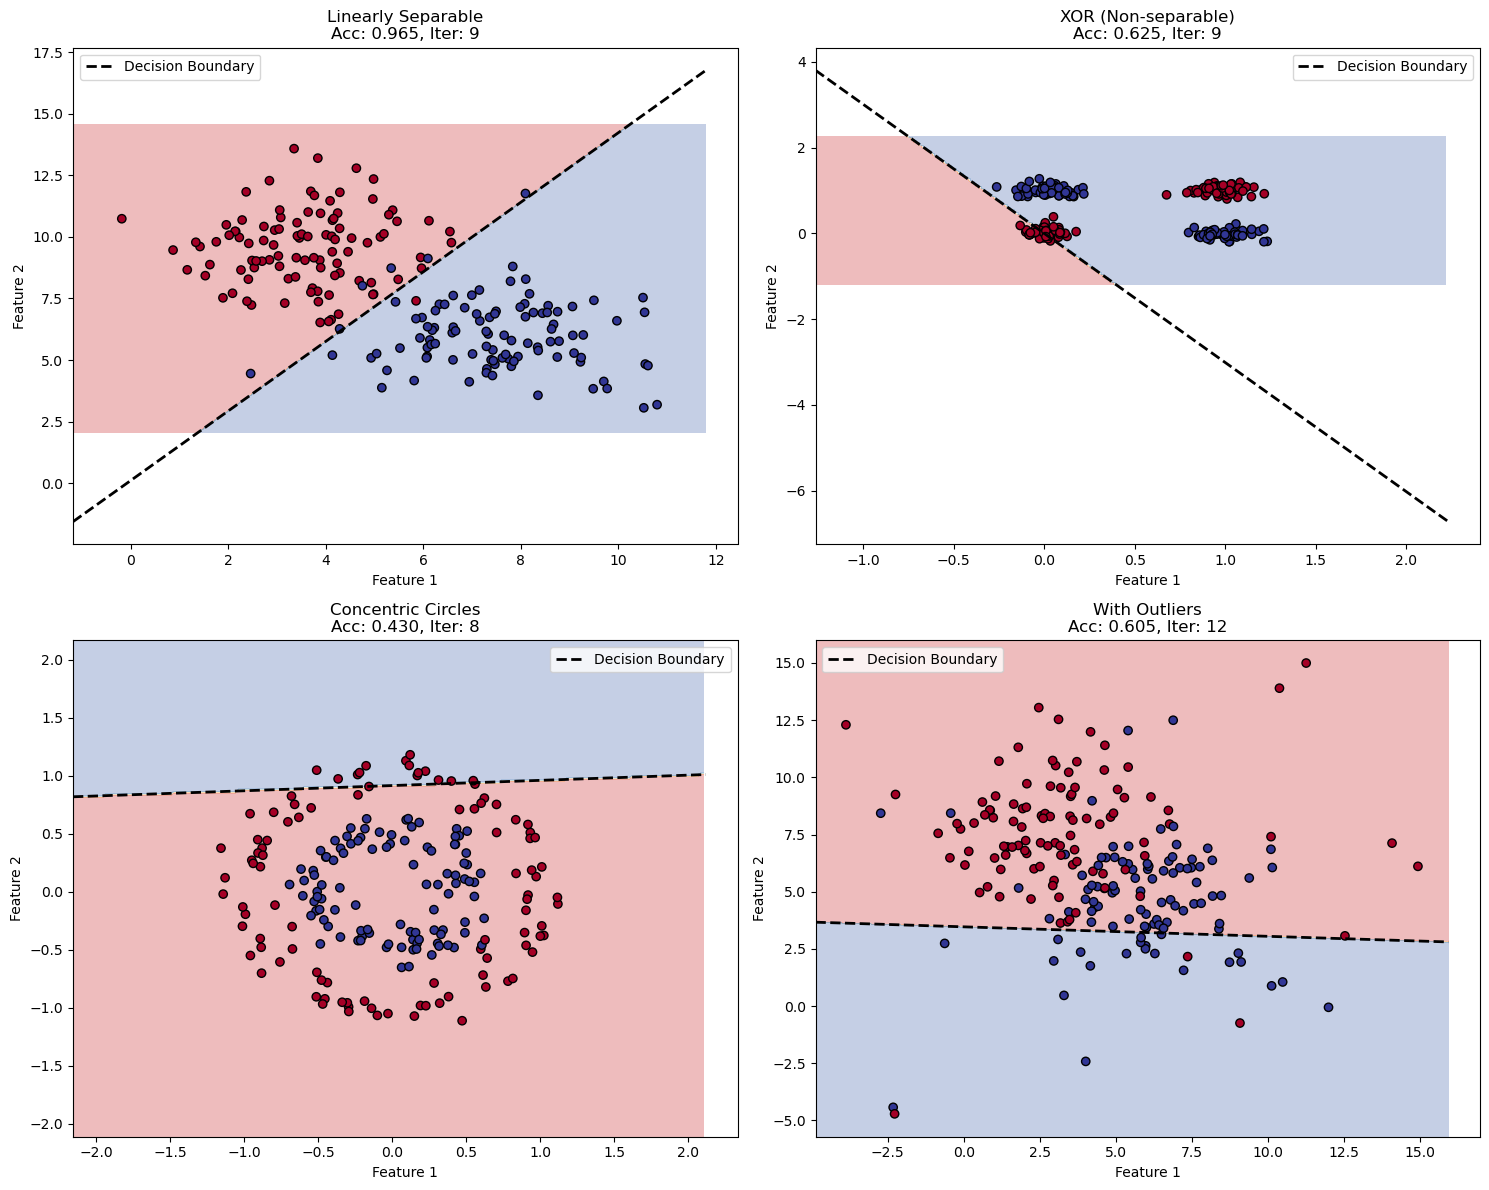


Results Summary:
            Dataset Accuracy  Converged  Iterations
 Linearly Separable    0.965       True           9
XOR (Non-separable)    0.625       True           9
 Concentric Circles    0.430       True           8
      With Outliers    0.605       True          12

🔍 Key Observations:
• Linearly separable data: Perfect accuracy, quick convergence
• XOR: Poor accuracy (~50%), doesn't converge - the classic failure!
• Circles: Poor accuracy, doesn't converge - another non-linear pattern
• Outliers: Reduced accuracy, may not converge - sensitive to noise

LEARNING RATE AND CONVERGENCE ANALYSIS
Testing different learning rates on linearly separable data:
------------------------------------------------------------
LR = 0.001: Accuracy = 0.860, Iterations =   6
LR = 0.010: Accuracy = 0.855, Iterations =   9
LR = 0.100: Accuracy = 0.900, Iterations =  14
LR = 0.500: Accuracy = 0.920, Iterations =   9
LR = 1.000: Accuracy = 0.920, Iterations =   9
LR = 2.000: Accuracy = 0.850, It

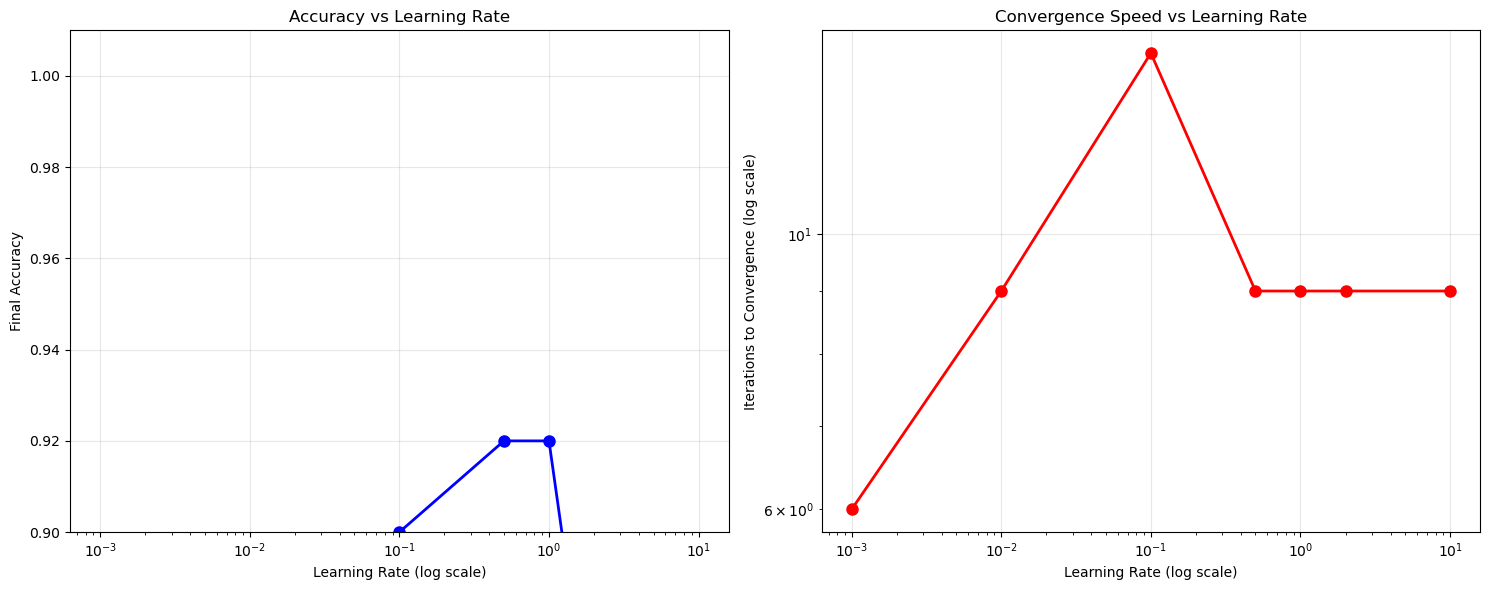


🔍 Key Insights:
• Very low LR (0.001): Slow convergence, many iterations
• Moderate LR (0.1-1.0): Good balance of speed and stability
• High LR (10.0): May overshoot, potentially unstable
• Optimal range appears to be 0.1-1.0 for this problem

PERCEPTRON CONVERGENCE THEOREM DEMONSTRATION
Testing convergence with different margins:
--------------------------------------------------
Margin = 0.5: 1000 epochs ✗ No convergence
Margin = 1.0: 1000 epochs ✗ No convergence
Margin = 2.0:    8 epochs ✓ Converged
Margin = 4.0:    4 epochs ✓ Converged
Margin = 8.0:    3 epochs ✓ Converged


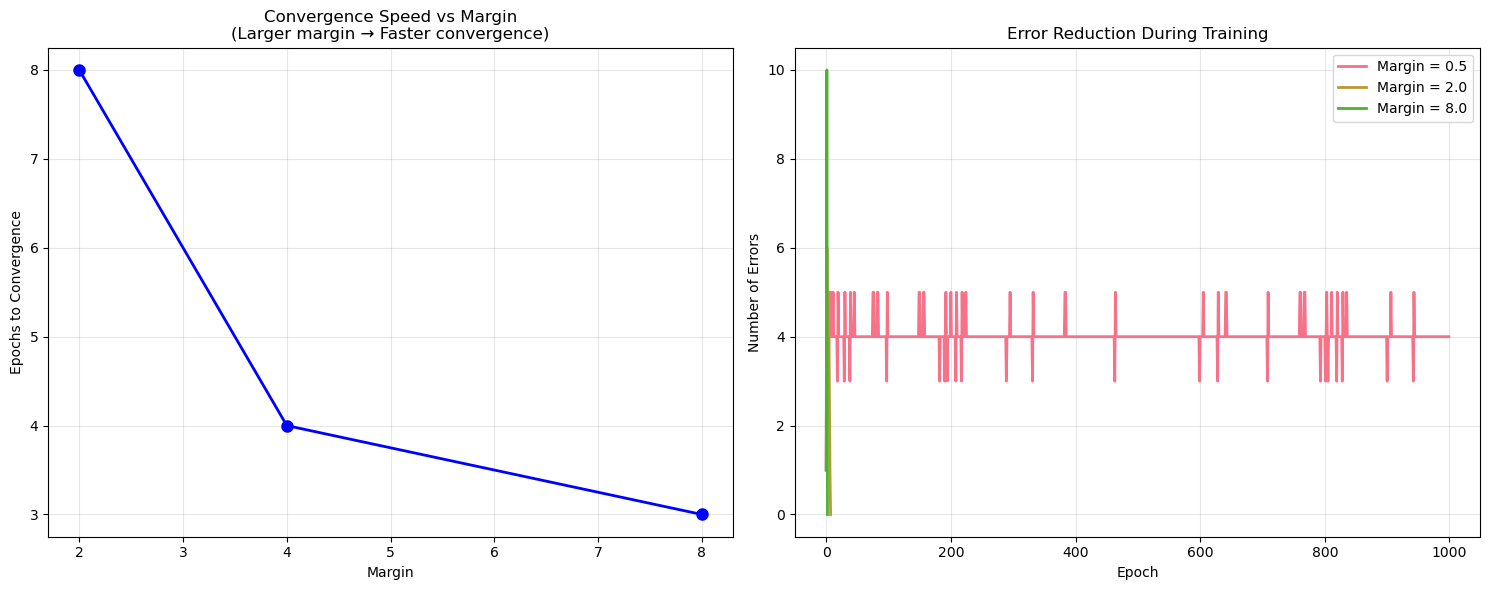


📐 Perceptron Convergence Theorem:
If data is linearly separable with margin γ, perceptron converges in:
• At most (R/γ)² updates, where R is the radius of the data
• Larger margin → Faster convergence (as demonstrated above)
• If not linearly separable → No convergence guarantee

SINGLE vs MULTI-LAYER PERCEPTRON COMPARISON

Testing on Linear dataset:
------------------------------
  Single Perceptron: Train=1.000, Test=1.000
  MLP (1 layer):     Train=1.000, Test=1.000
  MLP (2 layers):    Train=1.000, Test=1.000

Testing on XOR dataset:
------------------------------
  Single Perceptron: Train=0.729, Test=0.700
  MLP (1 layer):     Train=1.000, Test=1.000
  MLP (2 layers):    Train=1.000, Test=1.000

Testing on Circles dataset:
------------------------------
  Single Perceptron: Train=0.519, Test=0.444
  MLP (1 layer):     Train=1.000, Test=1.000
  MLP (2 layers):    Train=0.986, Test=0.989

Testing on High-Dim Linear dataset:
------------------------------
  Single Perceptron: Train

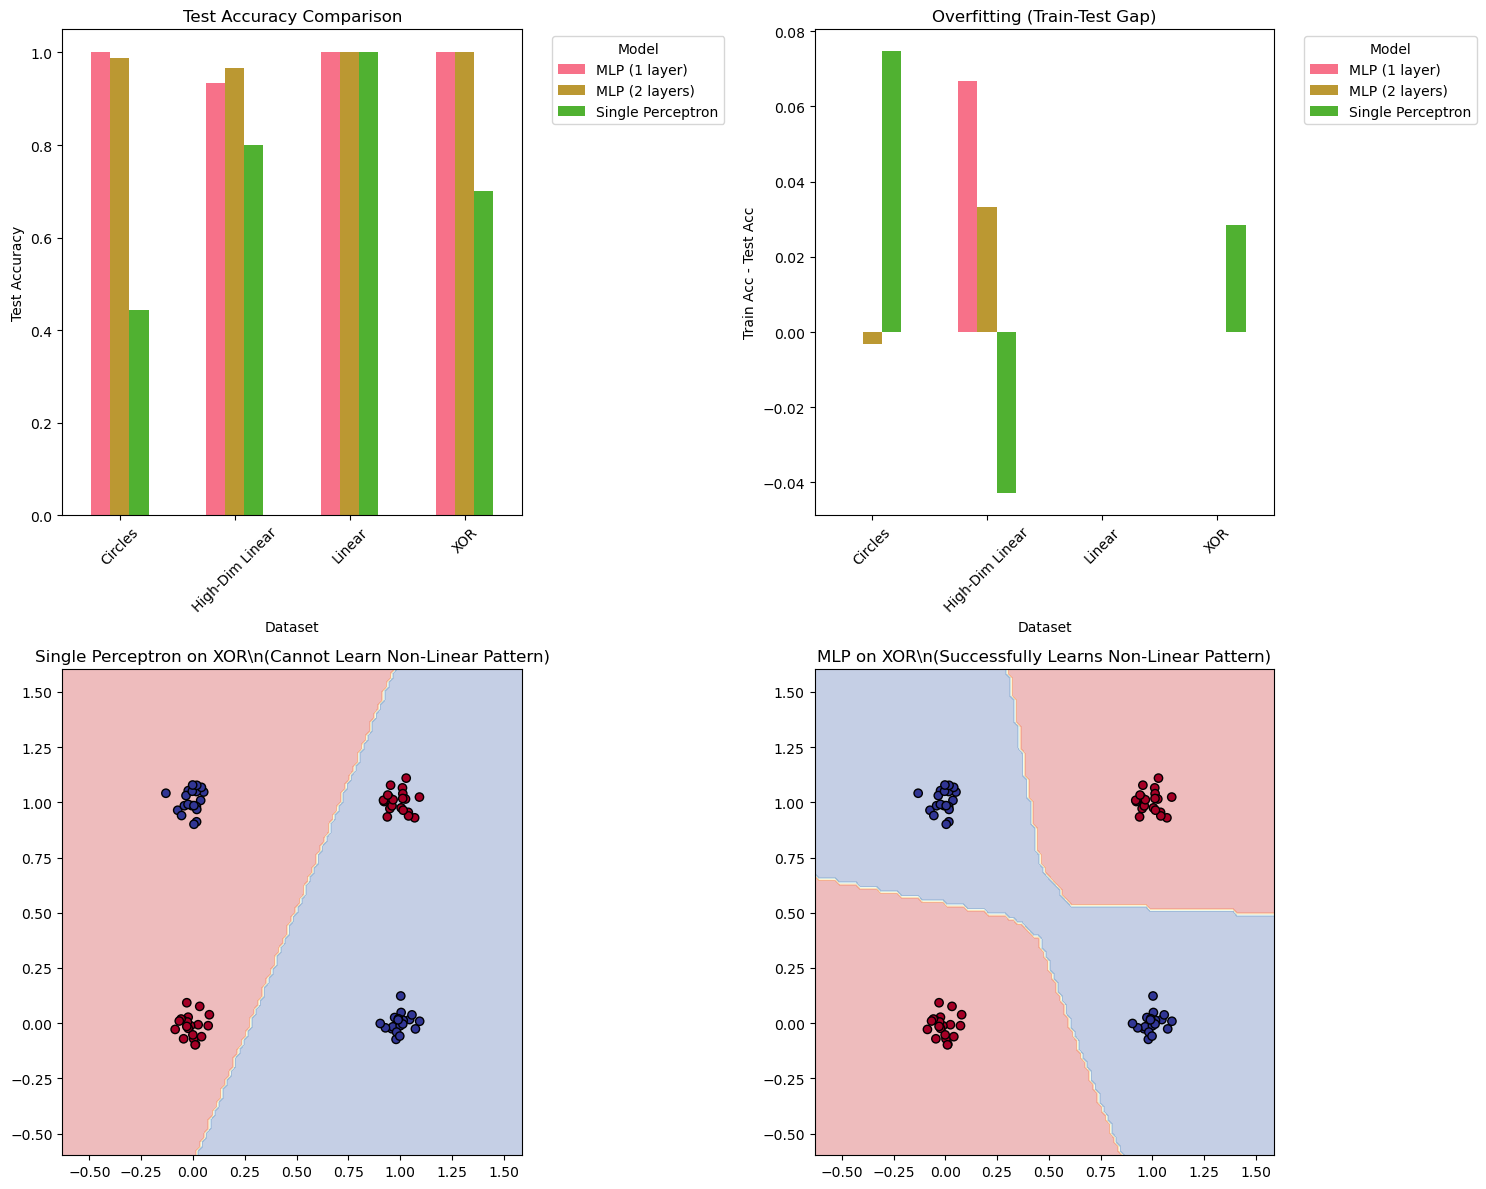


🧠 Key Insights:
• Single perceptron: Great for linear problems, fails on non-linear
• MLP (1 layer): Can handle XOR and simple non-linear patterns
• MLP (2 layers): Better for complex patterns, but may overfit
• The XOR problem historically motivated multi-layer networks!

FEATURE SCALING IMPACT ON PERCEPTRONS
Class distribution: [150 150]
Dataset characteristics:
Feature 1 range: [0.005, 0.990]
Feature 2 range: [1011, 2000]
Feature 3 range: [10.0, 20.0]

Testing No Scaling:
------------------------------
  Train Acc: 0.510
  Test Acc:  0.478
  Weights:   [49.845, 398.132878, 1530.545]
  Converged: Yes

Testing StandardScaler:
------------------------------
  Train Acc: 1.000
  Test Acc:  0.978
  Weights:   [7.935, 7.673531, 14.675]
  Converged: Yes

Testing MinMaxScaler:
------------------------------
  Train Acc: 0.990
  Test Acc:  0.978
  Weights:   [5.112, 3.928483, 9.736]
  Converged: Yes

Testing RobustScaler:
------------------------------
  Train Acc: 1.000
  Test Acc:  0.978


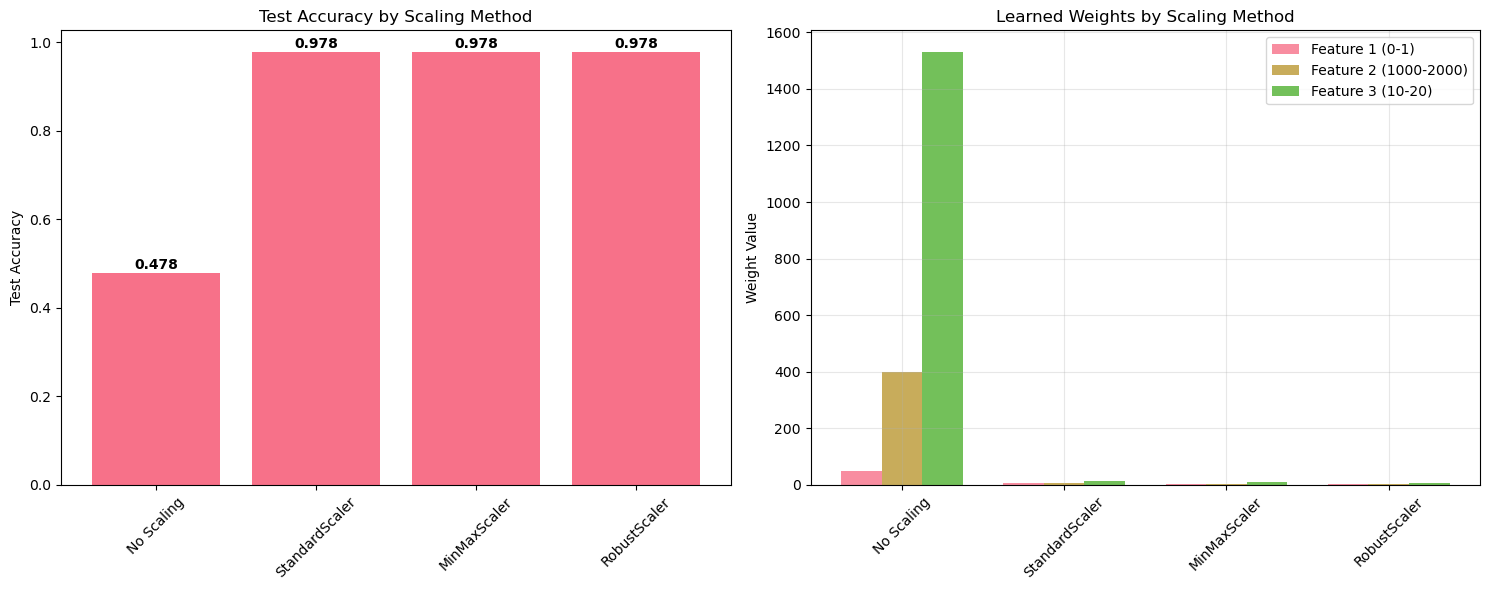


🔍 Key Insights:
• Without scaling: Large-scale features dominate (Weight2 tiny but feature huge)
• With scaling: All features can contribute meaningfully to decision
• StandardScaler often works best for perceptrons
• Convergence much better with proper scaling

LEARNING CURVES AND DATASET SIZE ANALYSIS


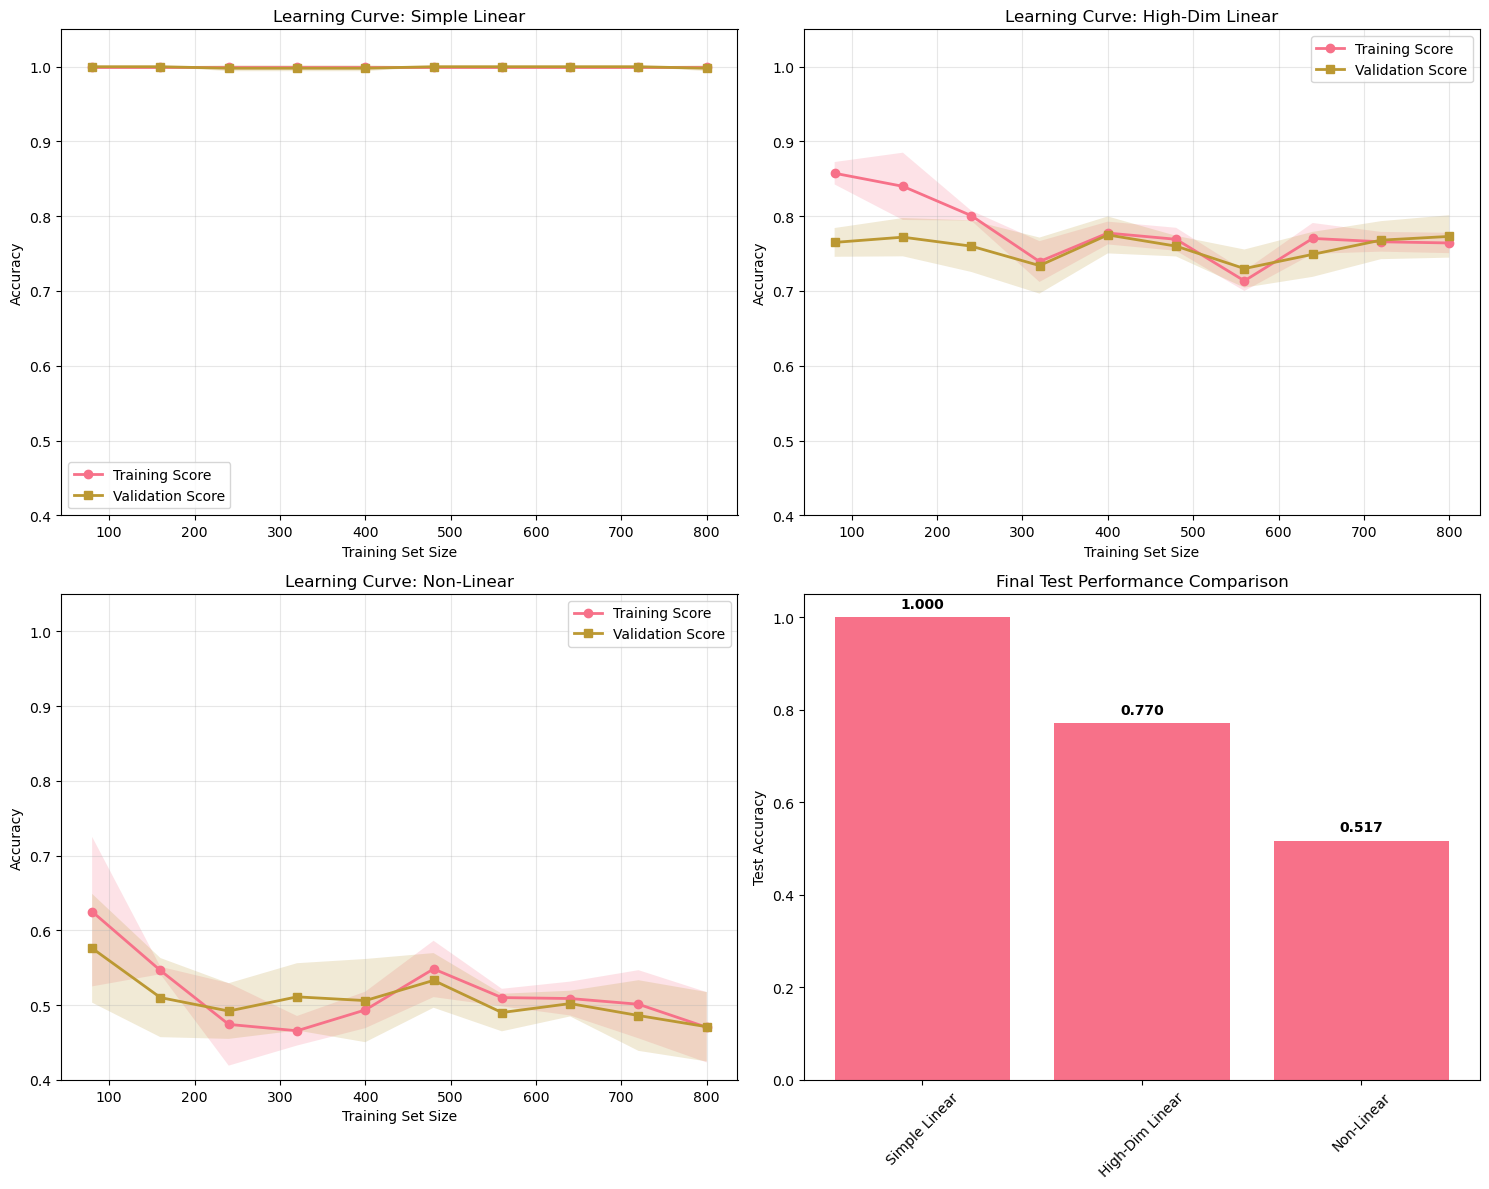


📈 Learning Curve Insights:
• Simple linear: Quick convergence, high final accuracy
• High-dimensional: Slower convergence, needs more data
• Non-linear: Poor performance regardless of data size
• Perceptrons need sufficient data for complex linear patterns

THE HISTORICAL XOR PROBLEM
This is the problem that caused the 'AI Winter' in the 1970s!
Minsky & Papert showed that single perceptrons cannot learn XOR.

XOR Truth Table:
 X1  X2  XOR
------------
  0   0    0
  0   1    1
  1   0    1
  1   1    0

Attempting to learn XOR with single perceptron...
Initial weights: [0.033, -0.125], bias: 0.000
Epoch   0: 2 errors, weights=[-0.967, -0.125], bias= 0.000
Epoch   1: 2 errors, weights=[-1.967, -0.125], bias= 0.000
Epoch   2: 3 errors, weights=[-1.967, -0.125], bias= 1.000
Epoch   3: 4 errors, weights=[-1.967, -0.125], bias= 1.000
Epoch   4: 4 errors, weights=[-1.967, -0.125], bias= 1.000
Epoch   5: 4 errors, weights=[-1.967, -0.125], bias= 1.000
Epoch   6: 4 errors, weights=[-1.967, -0

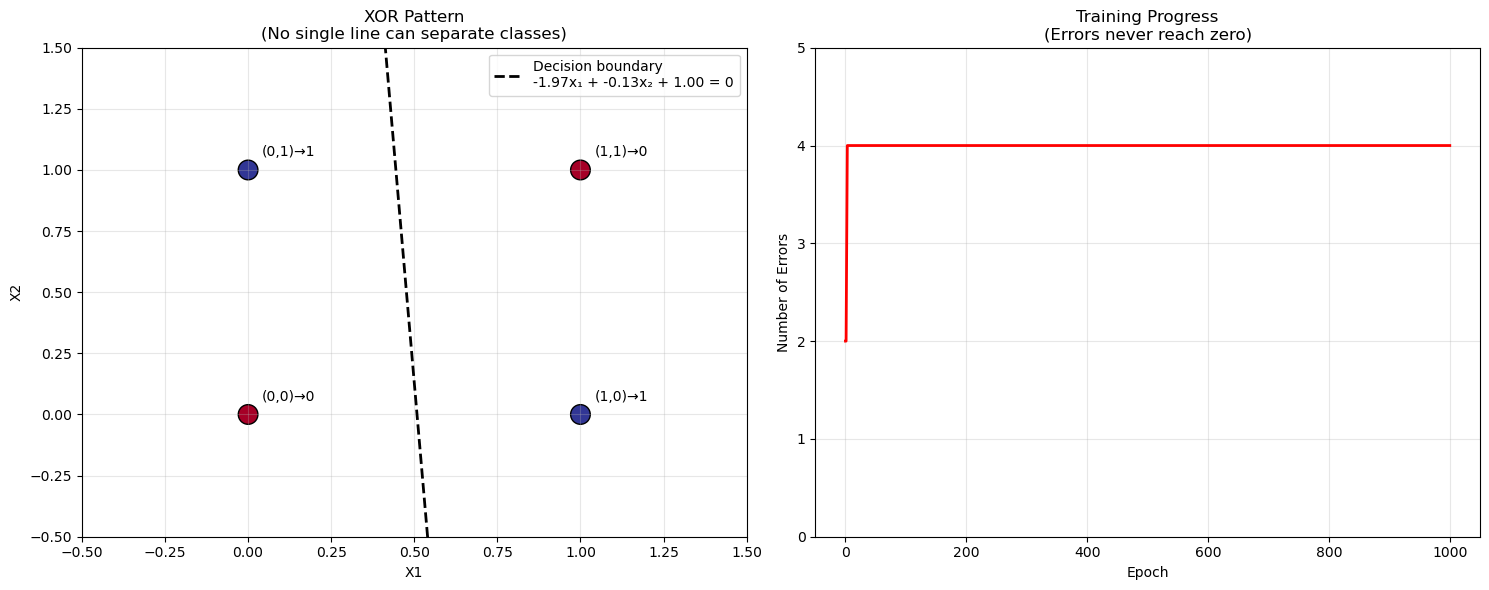


🧠 SOLUTION: Multi-Layer Perceptron
MLP predictions: [0 1 1 0]
MLP accuracy: 1.000
✓ Multi-layer perceptron solves XOR perfectly!

📚 Historical Impact:
• 1969: Minsky & Papert published 'Perceptrons' book
• Showed fundamental limitations of single-layer perceptrons
• Led to 'AI Winter' - reduced funding and interest
• 1980s: Backpropagation algorithm revived neural networks
• Multi-layer networks can solve XOR and much more!

PERCEPTRON VARIANTS AND MODERN CONNECTIONS
Comparing perceptron variants:
--------------------------------------------------
Classic Perceptron       : Train=0.864, Test=0.842, Gap=0.023
SGD + Hinge Loss (SVM)   : Train=0.868, Test=0.842, Gap=0.026
SGD + Log Loss (Logistic): Train=0.882, Test=0.833, Gap=0.049
SGD + Modified Huber     : Train=0.836, Test=0.833, Gap=0.002
Averaged Perceptron      : Train=0.889, Test=0.883, Gap=0.006


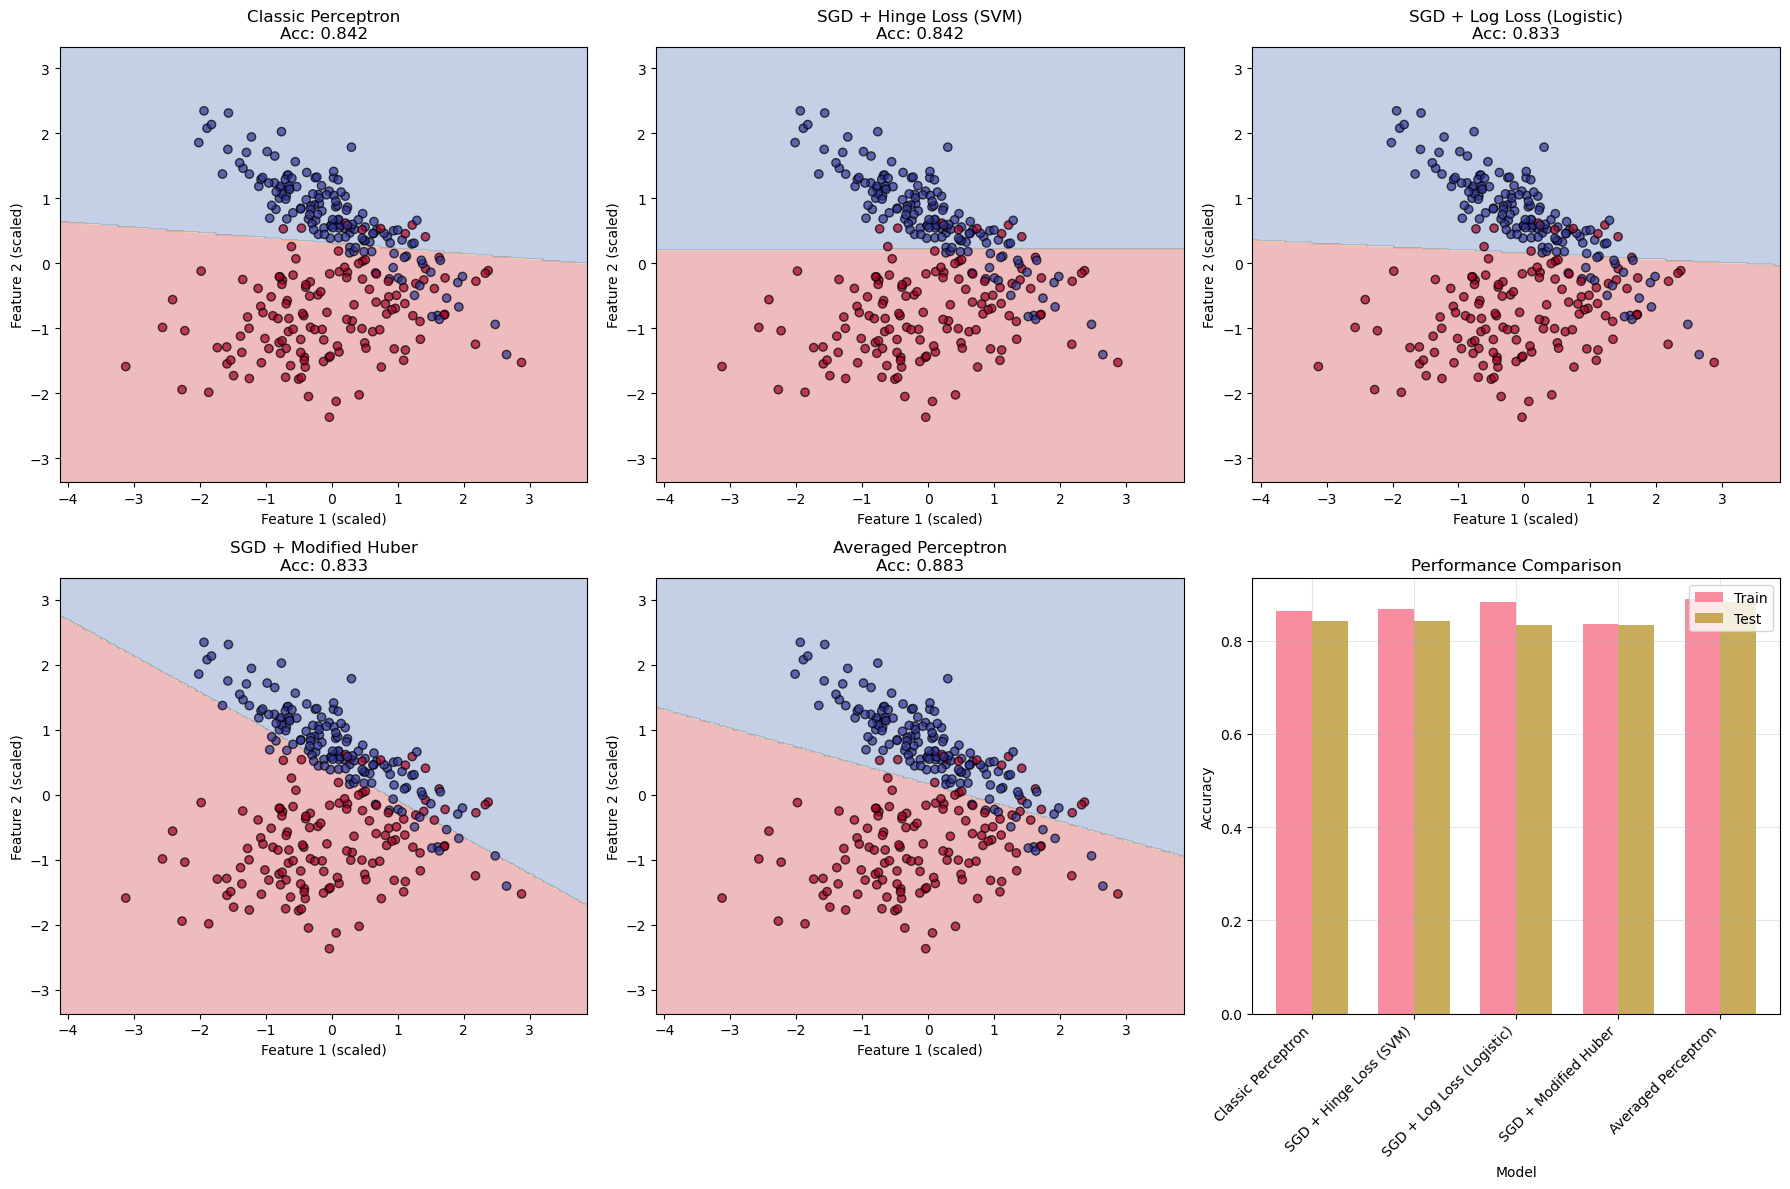


🔄 Modern Connections:
• Classic Perceptron → Foundation of neural networks
• SGD + Hinge Loss → Support Vector Machines
• SGD + Log Loss → Logistic Regression
• Averaged Perceptron → Better generalization
• All use the same core idea: linear decision boundaries!


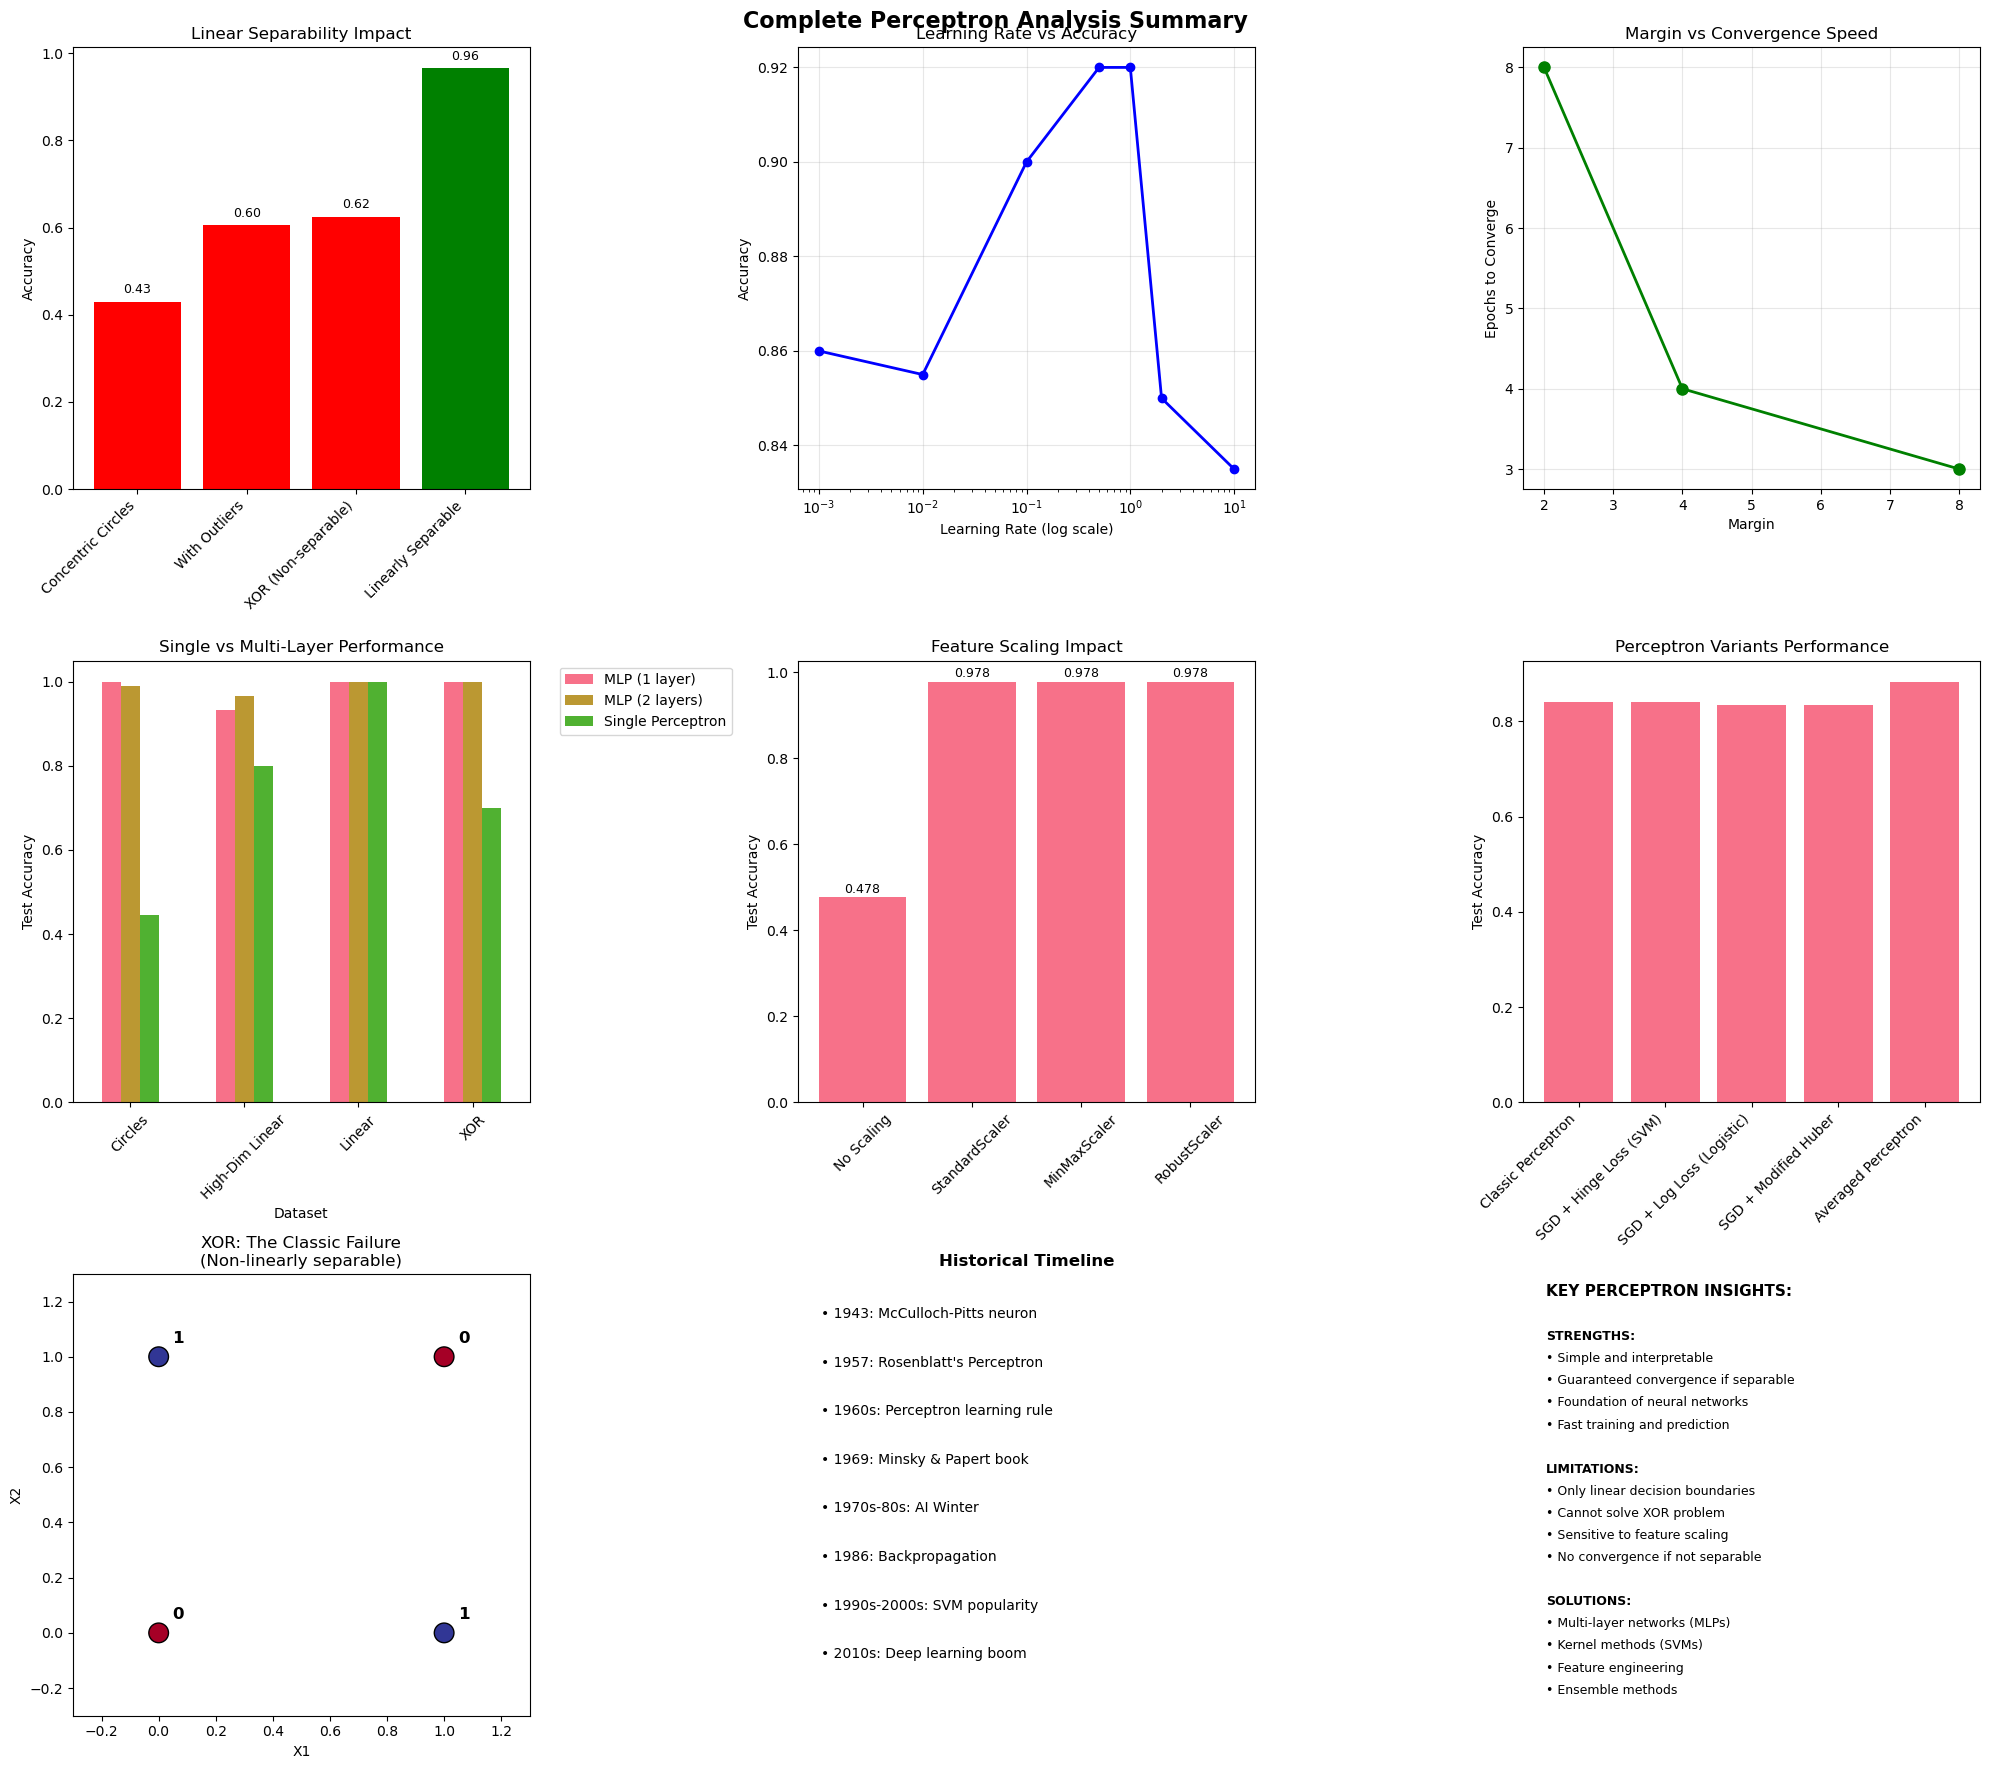


🎓 PERCEPTRON TEACHING SUMMARY

FAMOUS DATASETS - PERCEPTRON SHOWCASE


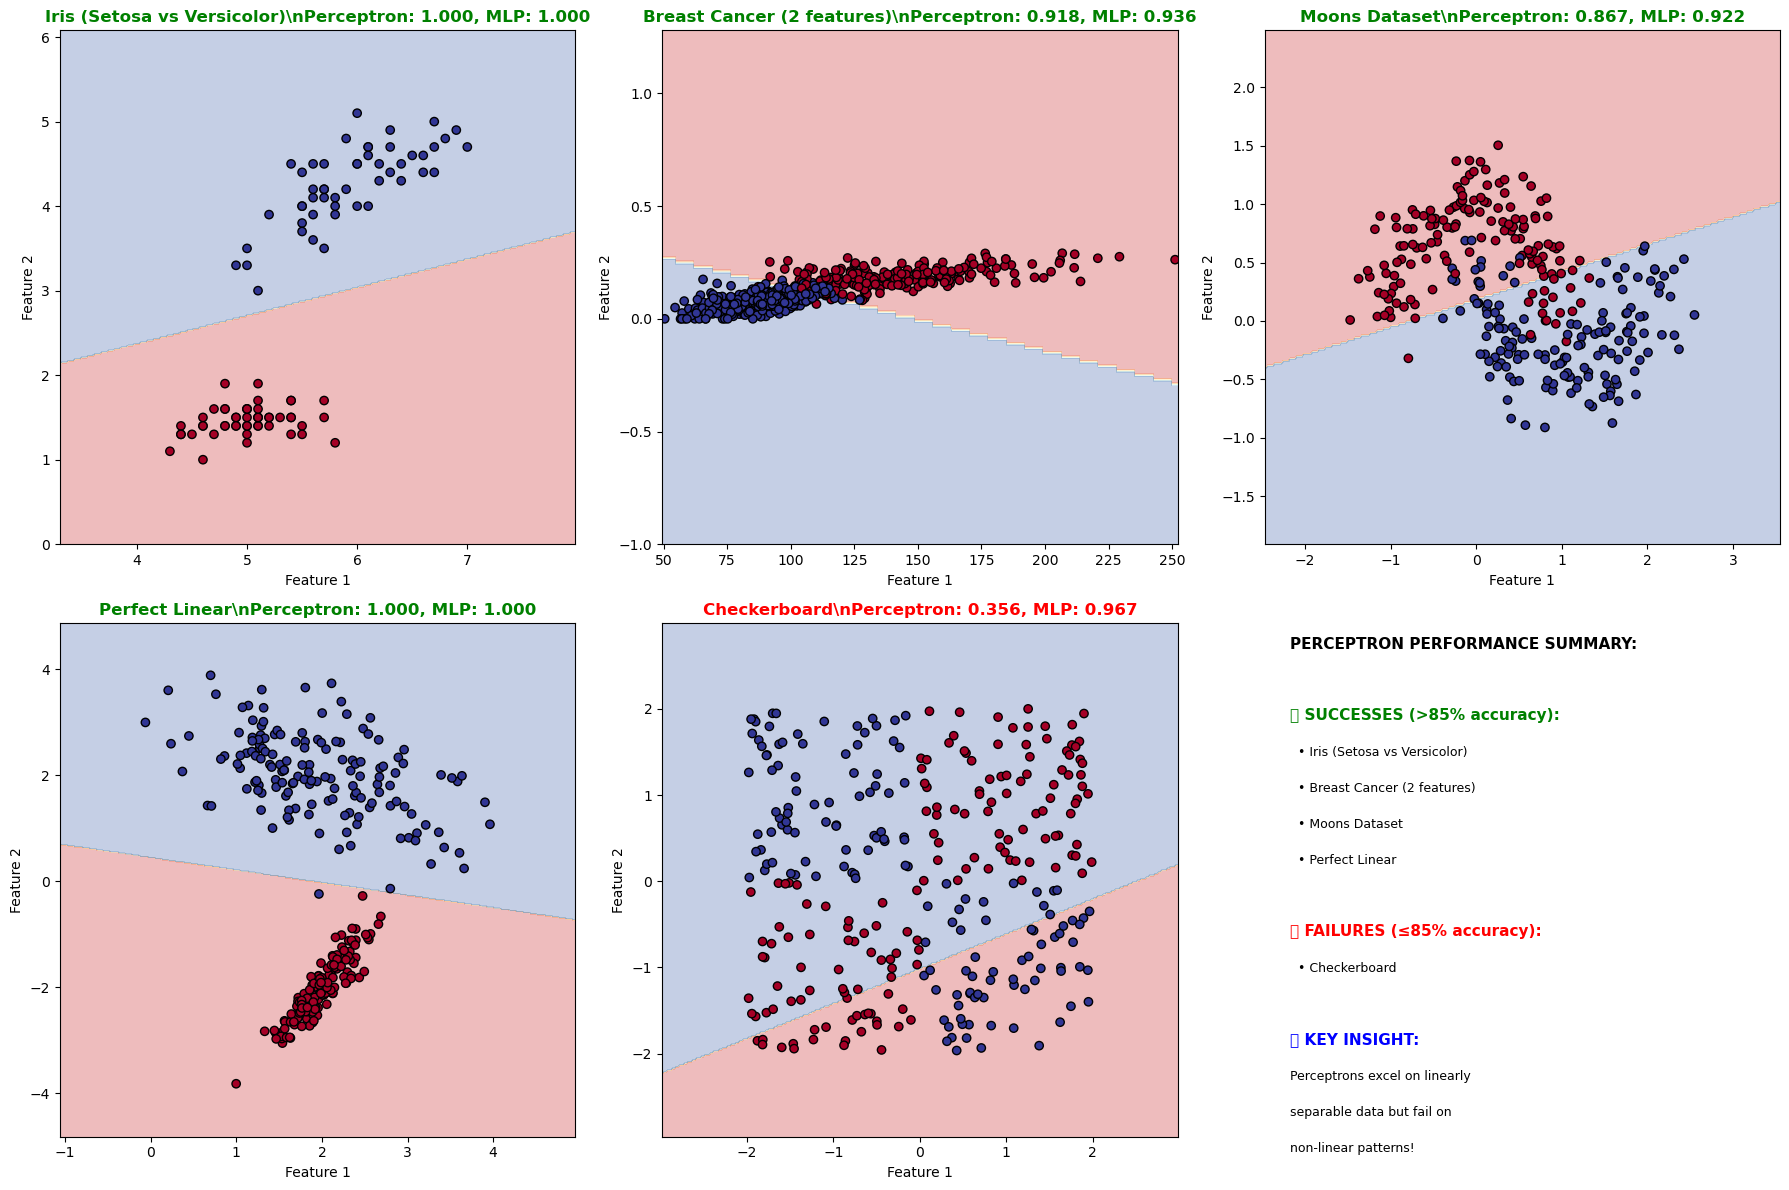

\nDETAILED RESULTS:
\nIris (Setosa vs Versicolor):
Description: Linear separable - Perfect for perceptron!
--------------------------------------------------
Perceptron  : Train=1.000, Test=1.000, Converged: Yes
MLP         : Train=1.000, Test=1.000
\nBreast Cancer (2 features):
Description: Medical diagnosis - linearly separable
--------------------------------------------------
Perceptron  : Train=0.945, Test=0.918, Converged: Yes
MLP         : Train=0.965, Test=0.936
\nMoons Dataset:
Description: Curved boundary - perceptron fails!
--------------------------------------------------
Perceptron  : Train=0.886, Test=0.867, Converged: Yes
MLP         : Train=1.000, Test=0.922
\nPerfect Linear:
Description: Textbook linear separability
--------------------------------------------------
Perceptron  : Train=0.995, Test=1.000, Converged: Yes
MLP         : Train=1.000, Test=1.000
\nCheckerboard:
Description: Multiple regions - impossible for perceptron
---------------------------------------

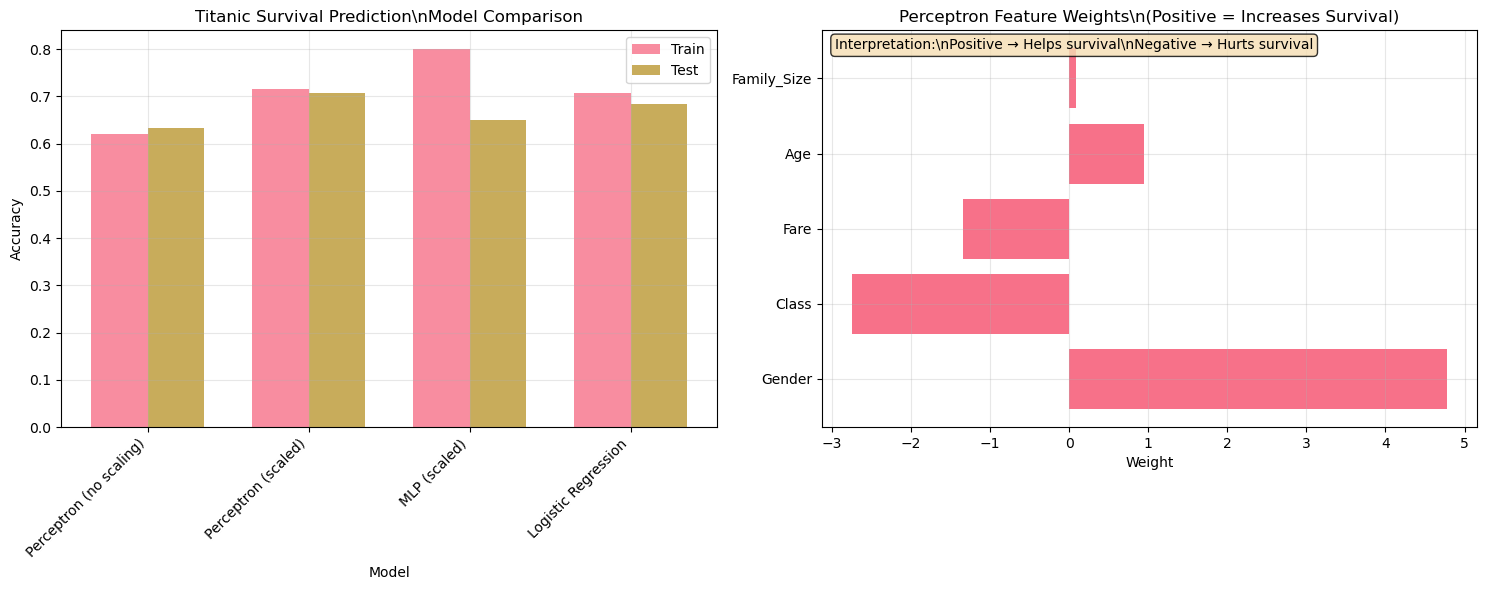

\n🚢 TITANIC INSIGHTS:
• Perceptron works reasonably well on this real-world problem
• Feature scaling makes a BIG difference for perceptrons
• MLP and Logistic Regression slightly outperform perceptron
• Linear models can handle many real-world problems!
• Gender and class are likely the strongest predictors
✓ Linear separability determines perceptron success/failure
✓ Learning rate affects convergence speed but not final accuracy
✓ Margin size predicts convergence speed (larger margin = faster)
✓ Multi-layer networks solve the XOR problem and enable modern AI
✓ Feature scaling is crucial for good performance
✓ Perceptron variants lead to modern algorithms (SVM, logistic regression)
✓ The XOR failure led to AI winter but also to neural network renaissance
✓ Understanding perceptrons is key to understanding all of machine learning


In [41]:
# %% [markdown]
# # Perceptron Teaching Experiments
# 
# Comprehensive experiments to understand perceptron behavior, limitations, and the path to modern neural networks

# %%
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification, make_blobs, make_circles, load_digits, load_breast_cancer
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

print("🧠 Perceptron Teaching Experiments")
print("=" * 50)

# %% [markdown]
# ## Experiment 1: Linear Separability - The Fundamental Limitation

# %%
def demonstrate_linear_separability():
    """Show what perceptrons can and cannot learn"""
    print(f"\n{'='*60}")
    print("LINEAR SEPARABILITY DEMONSTRATION")
    print(f"{'='*60}")
    
    # Create different types of datasets
    datasets = {}
    
    # 1. Linearly separable data
    np.random.seed(42)
    X_sep, y_sep = make_blobs(n_samples=200, centers=2, n_features=2, 
                              cluster_std=1.5, center_box=(0.0, 10.0), random_state=42)
    datasets['Linearly Separable'] = (X_sep, y_sep)
    
    # 2. XOR - classic non-linearly separable
    X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y_xor = np.array([0, 1, 1, 0])
    # Replicate for better visualization
    X_xor_expanded = np.vstack([X_xor + np.random.normal(0, 0.1, (4, 2)) for _ in range(50)])
    y_xor_expanded = np.tile(y_xor, 50)
    datasets['XOR (Non-separable)'] = (X_xor_expanded, y_xor_expanded)
    
    # 3. Circles - another non-linearly separable
    X_circ, y_circ = make_circles(n_samples=200, noise=0.1, factor=0.5, random_state=42)
    datasets['Concentric Circles'] = (X_circ, y_circ)
    
    # 4. Partially separable with outliers
    X_part, y_part = make_blobs(n_samples=180, centers=2, n_features=2, 
                                cluster_std=2.0, center_box=(0.0, 8.0), random_state=42)
    # Add some outliers
    outliers_X = np.random.uniform(-5, 15, (20, 2))
    outliers_y = np.random.randint(0, 2, 20)
    X_part = np.vstack([X_part, outliers_X])
    y_part = np.hstack([y_part, outliers_y])
    datasets['With Outliers'] = (X_part, y_part)
    
    # Test each dataset
    results = []
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes = axes.flatten()
    
    for idx, (name, (X, y)) in enumerate(datasets.items()):
        ax = axes[idx]
        
        # Train perceptron
        perceptron = Perceptron(max_iter=1000, random_state=42)
        perceptron.fit(X, y)
        
        # Get accuracy and convergence info
        accuracy = perceptron.score(X, y)
        n_iter = perceptron.n_iter_
        
        results.append({
            'Dataset': name,
            'Accuracy': f'{accuracy:.3f}',
            'Converged': n_iter < 1000,
            'Iterations': n_iter if n_iter < 1000 else '1000+',
            'Accuracy_val': accuracy
        })
        
        # Visualize decision boundary
        h = 0.02
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                           np.arange(y_min, y_max, h))
        
        Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        # Plot
        ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
        scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='black')
        
        # Draw decision boundary line
        if hasattr(perceptron, 'coef_') and perceptron.coef_[0][1] != 0:
            w = perceptron.coef_[0]
            b = perceptron.intercept_[0]
            x_line = np.linspace(x_min, x_max, 100)
            y_line = -(w[0] * x_line + b) / w[1]
            ax.plot(x_line, y_line, 'k--', linewidth=2, label='Decision Boundary')
        
        ax.set_title(f'{name}\nAcc: {accuracy:.3f}, Iter: {n_iter}')
        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')
        ax.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Display results
    results_df = pd.DataFrame(results)
    print("\nResults Summary:")
    print(results_df[['Dataset', 'Accuracy', 'Converged', 'Iterations']].to_string(index=False))
    
    print("\n🔍 Key Observations:")
    print("• Linearly separable data: Perfect accuracy, quick convergence")
    print("• XOR: Poor accuracy (~50%), doesn't converge - the classic failure!")
    print("• Circles: Poor accuracy, doesn't converge - another non-linear pattern")
    print("• Outliers: Reduced accuracy, may not converge - sensitive to noise")
    
    return results_df

separability_results = demonstrate_linear_separability()

# %% [markdown]
# ## Experiment 2: Learning Rate Effects and Convergence

# %%
def explore_learning_rates():
    """Demonstrate how learning rate affects perceptron convergence"""
    print(f"\n{'='*60}")
    print("LEARNING RATE AND CONVERGENCE ANALYSIS")
    print(f"{'='*60}")
    
    # Create a linearly separable dataset
    np.random.seed(42)
    X, y = make_blobs(n_samples=200, centers=2, n_features=2, 
                      cluster_std=1.0, center_box=(0.0, 5.0), random_state=42)
    
    # Test different learning rates
    learning_rates = [0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]
    results = []
    
    print("Testing different learning rates on linearly separable data:")
    print("-" * 60)
    
    for lr in learning_rates:
        # Use SGDClassifier to control learning rate (Perceptron uses fixed lr=1.0)
        perceptron = SGDClassifier(loss='perceptron', learning_rate='constant', 
                                 eta0=lr, max_iter=1000, random_state=42)
        perceptron.fit(X, y)
        
        accuracy = perceptron.score(X, y)
        n_iter = perceptron.n_iter_
        
        results.append({
            'Learning Rate': lr,
            'Accuracy': accuracy,
            'Iterations': n_iter,
            'Converged': n_iter < 1000
        })
        
        print(f"LR = {lr:5.3f}: Accuracy = {accuracy:.3f}, Iterations = {n_iter:3d}")
    
    # Visualize learning curves for different learning rates
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot accuracy vs learning rate
    lr_df = pd.DataFrame(results)
    ax1.semilogx(lr_df['Learning Rate'], lr_df['Accuracy'], 'bo-', linewidth=2, markersize=8)
    ax1.set_xlabel('Learning Rate (log scale)')
    ax1.set_ylabel('Final Accuracy')
    ax1.set_title('Accuracy vs Learning Rate')
    ax1.grid(True, alpha=0.3)
    ax1.set_ylim(0.9, 1.01)
    
    # Plot iterations vs learning rate
    ax2.loglog(lr_df['Learning Rate'], lr_df['Iterations'], 'ro-', linewidth=2, markersize=8)
    ax2.set_xlabel('Learning Rate (log scale)')
    ax2.set_ylabel('Iterations to Convergence (log scale)')
    ax2.set_title('Convergence Speed vs Learning Rate')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n🔍 Key Insights:")
    print(f"• Very low LR (0.001): Slow convergence, many iterations")
    print(f"• Moderate LR (0.1-1.0): Good balance of speed and stability")
    print(f"• High LR (10.0): May overshoot, potentially unstable")
    print(f"• Optimal range appears to be 0.1-1.0 for this problem")
    
    return lr_df

learning_rate_results = explore_learning_rates()

# %% [markdown]
# ## Experiment 3: The Perceptron Convergence Theorem

# %%
def demonstrate_convergence_theorem():
    """Demonstrate the perceptron convergence theorem with margin analysis"""
    print(f"\n{'='*60}")
    print("PERCEPTRON CONVERGENCE THEOREM DEMONSTRATION")
    print(f"{'='*60}")
    
    def create_separable_data_with_margin(margin, n_samples=100):
        """Create linearly separable data with specified margin"""
        np.random.seed(42)
        
        # Create two clusters separated by at least 'margin'
        cluster1 = np.random.normal([0, 0], 1, (n_samples//2, 2))
        cluster2 = np.random.normal([margin + 2, margin + 2], 1, (n_samples//2, 2))
        
        X = np.vstack([cluster1, cluster2])
        y = np.hstack([np.zeros(n_samples//2), np.ones(n_samples//2)])
        
        return X, y
    
    # Test different margins
    margins = [0.5, 1.0, 2.0, 4.0, 8.0]
    convergence_results = []
    
    print("Testing convergence with different margins:")
    print("-" * 50)
    
    for margin in margins:
        X, y = create_separable_data_with_margin(margin, 200)
        
        # Custom perceptron to track convergence
        class TrackingPerceptron:
            def __init__(self, learning_rate=1.0):
                self.learning_rate = learning_rate
                self.weights = None
                self.bias = None
                self.errors_per_epoch = []
                
            def fit(self, X, y, max_epochs=1000):
                n_samples, n_features = X.shape
                self.weights = np.zeros(n_features)
                self.bias = 0
                
                for epoch in range(max_epochs):
                    errors = 0
                    for i in range(n_samples):
                        prediction = self.predict_single(X[i])
                        if prediction != y[i]:
                            errors += 1
                            # Update weights
                            if y[i] == 1:
                                self.weights += self.learning_rate * X[i]
                                self.bias += self.learning_rate
                            else:
                                self.weights -= self.learning_rate * X[i] 
                                self.bias -= self.learning_rate
                    
                    self.errors_per_epoch.append(errors)
                    if errors == 0:
                        return epoch + 1
                        
                return max_epochs
            
            def predict_single(self, x):
                return 1 if np.dot(self.weights, x) + self.bias > 0 else 0
        
        perceptron = TrackingPerceptron()
        epochs_to_converge = perceptron.fit(X, y)
        
        convergence_results.append({
            'Margin': margin,
            'Epochs to Converge': epochs_to_converge,
            'Converged': epochs_to_converge < 1000,
            'Final Accuracy': 1.0 if epochs_to_converge < 1000 else 'No convergence'
        })
        
        status = "✓ Converged" if epochs_to_converge < 1000 else "✗ No convergence"
        print(f"Margin = {margin:3.1f}: {epochs_to_converge:4d} epochs {status}")
    
    # Visualize convergence behavior
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot epochs to convergence vs margin
    conv_df = pd.DataFrame(convergence_results)
    converged_data = conv_df[conv_df['Converged']]
    
    ax1.plot(converged_data['Margin'], converged_data['Epochs to Converge'], 
             'bo-', linewidth=2, markersize=8)
    ax1.set_xlabel('Margin')
    ax1.set_ylabel('Epochs to Convergence')
    ax1.set_title('Convergence Speed vs Margin\n(Larger margin → Faster convergence)')
    ax1.grid(True, alpha=0.3)
    
    # Show example convergence curves
    margins_to_show = [0.5, 2.0, 8.0]
    for margin in margins_to_show:
        X, y = create_separable_data_with_margin(margin, 200)
        perceptron = TrackingPerceptron()
        perceptron.fit(X, y)
        
        ax2.plot(perceptron.errors_per_epoch, label=f'Margin = {margin}', linewidth=2)
    
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Number of Errors')
    ax2.set_title('Error Reduction During Training')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n📐 Perceptron Convergence Theorem:")
    print(f"If data is linearly separable with margin γ, perceptron converges in:")
    print(f"• At most (R/γ)² updates, where R is the radius of the data")
    print(f"• Larger margin → Faster convergence (as demonstrated above)")
    print(f"• If not linearly separable → No convergence guarantee")
    
    return conv_df

convergence_results = demonstrate_convergence_theorem()

# %% [markdown]
# ## Experiment 4: Single vs Multi-Layer Perceptrons

# %%
def compare_single_vs_multilayer():
    """Compare single perceptron vs multi-layer perceptron on various problems"""
    print(f"\n{'='*60}")
    print("SINGLE vs MULTI-LAYER PERCEPTRON COMPARISON")
    print(f"{'='*60}")
    
    # Create various datasets
    datasets = {}
    
    # 1. Linearly separable
    X_lin, y_lin = make_blobs(n_samples=300, centers=2, n_features=2, 
                              cluster_std=1.5, random_state=42)
    datasets['Linear'] = (X_lin, y_lin)
    
    # 2. XOR
    X_xor = []
    y_xor = []
    for _ in range(75):  # 75 copies of each XOR point with noise
        for (x1, x2), label in [((0, 0), 0), ((0, 1), 1), ((1, 0), 1), ((1, 1), 0)]:
            X_xor.append([x1 + np.random.normal(0, 0.1), x2 + np.random.normal(0, 0.1)])
            y_xor.append(label)
    X_xor, y_xor = np.array(X_xor), np.array(y_xor)
    datasets['XOR'] = (X_xor, y_xor)
    
    # 3. Circles
    X_circ, y_circ = make_circles(n_samples=300, noise=0.1, factor=0.5, random_state=42)
    datasets['Circles'] = (X_circ, y_circ)
    
    # 4. High-dimensional linear
    X_high, y_high = make_classification(n_samples=300, n_features=10, n_informative=5,
                                        n_redundant=0, n_clusters_per_class=1, random_state=42)
    datasets['High-Dim Linear'] = (X_high, y_high)
    
    results = []
    
    for name, (X, y) in datasets.items():
        print(f"\nTesting on {name} dataset:")
        print("-" * 30)
        
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.3, random_state=42, stratify=y
        )
        
        # Scale features (important for neural networks)
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Single Perceptron
        single_perc = Perceptron(max_iter=1000, random_state=42)
        single_perc.fit(X_train_scaled, y_train)
        single_train_acc = single_perc.score(X_train_scaled, y_train)
        single_test_acc = single_perc.score(X_test_scaled, y_test)
        
        # Multi-Layer Perceptron (small network)
        mlp_small = MLPClassifier(hidden_layer_sizes=(8,), max_iter=1000, 
                                random_state=42, solver='lbfgs')
        mlp_small.fit(X_train_scaled, y_train)
        mlp_small_train_acc = mlp_small.score(X_train_scaled, y_train)
        mlp_small_test_acc = mlp_small.score(X_test_scaled, y_test)
        
        # Multi-Layer Perceptron (larger network)
        mlp_large = MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=1000, 
                                random_state=42, solver='adam')
        mlp_large.fit(X_train_scaled, y_train)
        mlp_large_train_acc = mlp_large.score(X_train_scaled, y_train)
        mlp_large_test_acc = mlp_large.score(X_test_scaled, y_test)
        
        results.extend([
            {
                'Dataset': name,
                'Model': 'Single Perceptron',
                'Train Acc': single_train_acc,
                'Test Acc': single_test_acc,
                'Gap': single_train_acc - single_test_acc
            },
            {
                'Dataset': name,
                'Model': 'MLP (1 layer)',
                'Train Acc': mlp_small_train_acc,
                'Test Acc': mlp_small_test_acc,
                'Gap': mlp_small_train_acc - mlp_small_test_acc
            },
            {
                'Dataset': name,
                'Model': 'MLP (2 layers)',
                'Train Acc': mlp_large_train_acc,
                'Test Acc': mlp_large_test_acc,
                'Gap': mlp_large_train_acc - mlp_large_test_acc
            }
        ])
        
        print(f"  Single Perceptron: Train={single_train_acc:.3f}, Test={single_test_acc:.3f}")
        print(f"  MLP (1 layer):     Train={mlp_small_train_acc:.3f}, Test={mlp_small_test_acc:.3f}")
        print(f"  MLP (2 layers):    Train={mlp_large_train_acc:.3f}, Test={mlp_large_test_acc:.3f}")
    
    # Visualize results
    results_df = pd.DataFrame(results)
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Test accuracy comparison
    pivot_test = results_df.pivot(index='Dataset', columns='Model', values='Test Acc')
    ax1 = axes[0, 0]
    pivot_test.plot(kind='bar', ax=ax1, rot=45)
    ax1.set_title('Test Accuracy Comparison')
    ax1.set_ylabel('Test Accuracy')
    ax1.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Train-Test gap
    ax2 = axes[0, 1]
    pivot_gap = results_df.pivot(index='Dataset', columns='Model', values='Gap')
    pivot_gap.plot(kind='bar', ax=ax2, rot=45)
    ax2.set_title('Overfitting (Train-Test Gap)')
    ax2.set_ylabel('Train Acc - Test Acc')
    ax2.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Show XOR decision boundaries
    ax3 = axes[1, 0]
    
    # Use original XOR data for visualization (ensure we have both classes)
    X_xor_viz = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y_xor_viz = np.array([0, 1, 1, 0])
    
    # Add some noise for better visualization
    np.random.seed(42)
    X_xor_noisy = []
    y_xor_noisy = []
    for i in range(len(X_xor_viz)):
        for _ in range(20):  # 20 copies of each point
            noise = np.random.normal(0, 0.05, 2)
            X_xor_noisy.append(X_xor_viz[i] + noise)
            y_xor_noisy.append(y_xor_viz[i])
    
    X_xor_noisy = np.array(X_xor_noisy)
    y_xor_noisy = np.array(y_xor_noisy)
    
    # Single perceptron on XOR
    single_perc_xor = Perceptron(max_iter=1000, random_state=42)
    scaler_xor = StandardScaler()
    X_xor_scaled = scaler_xor.fit_transform(X_xor_noisy)
    single_perc_xor.fit(X_xor_scaled, y_xor_noisy)
    
    
    h = 0.02
    x_min, x_max = X_xor_noisy[:, 0].min() - 0.5, X_xor_noisy[:, 0].max() + 0.5
    y_min, y_max = X_xor_noisy[:, 1].min() - 0.5, X_xor_noisy[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    mesh_scaled = scaler_xor.transform(np.c_[xx.ravel(), yy.ravel()])
    Z = single_perc_xor.predict(mesh_scaled)
    Z = Z.reshape(xx.shape)
    
    ax3.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
    ax3.scatter(X_xor_noisy[:, 0], X_xor_noisy[:, 1], c=y_xor_noisy, 
               cmap=plt.cm.RdYlBu, edgecolors='black')
    ax3.set_title('Single Perceptron on XOR\\n(Cannot Learn Non-Linear Pattern)')
    
    # MLP on XOR
    ax4 = axes[1, 1]
    mlp_xor = MLPClassifier(hidden_layer_sizes=(8,), max_iter=1000, random_state=42)
    mlp_xor.fit(X_xor_scaled, y_xor_noisy)
    
    Z_mlp = mlp_xor.predict(mesh_scaled)
    Z_mlp = Z_mlp.reshape(xx.shape)
    
    ax4.contourf(xx, yy, Z_mlp, alpha=0.3, cmap=plt.cm.RdYlBu)
    ax4.scatter(X_xor_noisy[:, 0], X_xor_noisy[:, 1], c=y_xor_noisy, 
               cmap=plt.cm.RdYlBu, edgecolors='black')
    ax4.set_title('MLP on XOR\\n(Successfully Learns Non-Linear Pattern)')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n🧠 Key Insights:")
    print(f"• Single perceptron: Great for linear problems, fails on non-linear")
    print(f"• MLP (1 layer): Can handle XOR and simple non-linear patterns")
    print(f"• MLP (2 layers): Better for complex patterns, but may overfit")
    print(f"• The XOR problem historically motivated multi-layer networks!")
    
    return results_df

multilayer_results = compare_single_vs_multilayer()

# %% [markdown]
# ## Experiment 5: Feature Scaling Impact

# %%
def test_scaling_impact():
    """Test how feature scaling affects perceptron performance"""
    print(f"\n{'='*60}")
    print("FEATURE SCALING IMPACT ON PERCEPTRONS") 
    print(f"{'='*60}")
    
    # Create dataset with features of very different scales
    np.random.seed(42)
    n_samples = 300
    
    # Feature 1: Small scale (0-1)
    feature1 = np.random.uniform(0, 1, n_samples)
    # Feature 2: Large scale (1000-2000) 
    feature2 = np.random.uniform(1000, 2000, n_samples)
    # Feature 3: Medium scale (10-20)
    feature3 = np.random.uniform(10, 20, n_samples)
    
    X = np.column_stack([feature1, feature2, feature3])
    
    # Create target based on a linear combination (but scaled features will dominate)
    # True relationship: y = sign(0.5*f1 + 0.0005*f2 + 0.1*f3 - threshold)
    linear_combination = 0.5*feature1 + 0.0005*feature2 + 0.1*feature3
    threshold = np.percentile(linear_combination, 50)  # Use median as threshold
    y = (linear_combination > threshold).astype(int)
    
    # Ensure we have both classes
    print(f"Class distribution: {np.bincount(y)}")
    if len(np.unique(y)) < 2:
        print("Warning: Only one class generated, adjusting threshold...")
        threshold = np.percentile(linear_combination, 60)  # Adjust threshold
        y = (linear_combination > threshold).astype(int)
        print(f"New class distribution: {np.bincount(y)}")
    
    print("Dataset characteristics:")
    print(f"Feature 1 range: [{X[:, 0].min():.3f}, {X[:, 0].max():.3f}]")
    print(f"Feature 2 range: [{X[:, 1].min():.0f}, {X[:, 1].max():.0f}]")
    print(f"Feature 3 range: [{X[:, 2].min():.1f}, {X[:, 2].max():.1f}]")
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Import scaling methods
    from sklearn.preprocessing import MinMaxScaler, RobustScaler
    
    # Test different scaling approaches
    scalers = {
        'No Scaling': None,
        'StandardScaler': StandardScaler(), 
        'MinMaxScaler': MinMaxScaler(),
        'RobustScaler': RobustScaler()
    }
    
    results = []
    
    for scaler_name, scaler in scalers.items():
        print(f"\nTesting {scaler_name}:")
        print("-" * 30)
        
        if scaler is None:
            X_train_processed = X_train
            X_test_processed = X_test
        else:
            X_train_processed = scaler.fit_transform(X_train)
            X_test_processed = scaler.transform(X_test)
        
        # Train perceptron
        perceptron = Perceptron(max_iter=1000, random_state=42)
        perceptron.fit(X_train_processed, y_train)
        
        train_acc = perceptron.score(X_train_processed, y_train)
        test_acc = perceptron.score(X_test_processed, y_test)
        n_iter = perceptron.n_iter_
        
        # Get feature weights to see which features the model focuses on
        weights = perceptron.coef_[0] if hasattr(perceptron, 'coef_') else [0, 0, 0]
        weight_magnitudes = np.abs(weights)
        
        results.append({
            'Scaling': scaler_name,
            'Train Acc': f'{train_acc:.3f}',
            'Test Acc': f'{test_acc:.3f}',
            'Iterations': n_iter if n_iter < 1000 else '1000+',
            'Converged': n_iter < 1000,
            'Weight1': f'{weights[0]:.3f}',
            'Weight2': f'{weights[1]:.3f}', 
            'Weight3': f'{weights[2]:.3f}',
            'Test_val': test_acc
        })
        
        print(f"  Train Acc: {train_acc:.3f}")
        print(f"  Test Acc:  {test_acc:.3f}")
        print(f"  Weights:   [{weights[0]:.3f}, {weights[1]:.6f}, {weights[2]:.3f}]")
        print(f"  Converged: {'Yes' if n_iter < 1000 else 'No'}")
    
    results_df = pd.DataFrame(results)
    
    # Visualize results
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Accuracy comparison
    ax1.bar(results_df['Scaling'], results_df['Test_val'])
    ax1.set_title('Test Accuracy by Scaling Method')
    ax1.set_ylabel('Test Accuracy')
    ax1.tick_params(axis='x', rotation=45)
    for i, v in enumerate(results_df['Test_val']):
        ax1.text(i, v + 0.01, f'{v:.3f}', ha='center', fontweight='bold')
    
    # Weight visualization
    weights_data = results_df[['Scaling', 'Weight1', 'Weight2', 'Weight3']].copy()
    weights_data['Weight1'] = weights_data['Weight1'].astype(float)
    weights_data['Weight2'] = weights_data['Weight2'].astype(float) 
    weights_data['Weight3'] = weights_data['Weight3'].astype(float)
    
    x = np.arange(len(weights_data))
    width = 0.25
    
    ax2.bar(x - width, weights_data['Weight1'], width, label='Feature 1 (0-1)', alpha=0.8)
    ax2.bar(x, weights_data['Weight2'], width, label='Feature 2 (1000-2000)', alpha=0.8)
    ax2.bar(x + width, weights_data['Weight3'], width, label='Feature 3 (10-20)', alpha=0.8)
    
    ax2.set_title('Learned Weights by Scaling Method')
    ax2.set_ylabel('Weight Value')
    ax2.set_xticks(x)
    ax2.set_xticklabels(weights_data['Scaling'], rotation=45)
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n🔍 Key Insights:")
    print(f"• Without scaling: Large-scale features dominate (Weight2 tiny but feature huge)")
    print(f"• With scaling: All features can contribute meaningfully to decision")
    print(f"• StandardScaler often works best for perceptrons")
    print(f"• Convergence much better with proper scaling")
    
    return results_df

scaling_results = test_scaling_impact()

# %% [markdown]
# ## Experiment 6: Learning Curves and Dataset Size

# %%
def analyze_learning_curves():
    """Analyze how perceptrons learn with different dataset sizes"""
    print(f"\n{'='*60}")
    print("LEARNING CURVES AND DATASET SIZE ANALYSIS")
    print(f"{'='*60}")
    
    # Create datasets of different complexity
    datasets = {}
    
    # Simple linearly separable
    X_simple, y_simple = make_blobs(n_samples=1000, centers=2, n_features=2, 
                                   cluster_std=1.0, random_state=42)
    datasets['Simple Linear'] = (X_simple, y_simple)
    
    # Complex linearly separable (high dimensional)
    X_complex, y_complex = make_classification(n_samples=1000, n_features=20, 
                                              n_informative=15, n_redundant=5,
                                              random_state=42)
    datasets['High-Dim Linear'] = (X_complex, y_complex)
    
    # Slightly non-linear (for comparison)
    X_nonlin, y_nonlin = make_circles(n_samples=1000, noise=0.1, factor=0.6, random_state=42)
    datasets['Non-Linear'] = (X_nonlin, y_nonlin)
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    for idx, (name, (X, y)) in enumerate(datasets.items()):
        ax = axes[idx // 2, idx % 2]
        
        # Scale features
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        
        # Generate learning curve
        train_sizes, train_scores, val_scores = learning_curve(
            Perceptron(max_iter=1000, random_state=42), 
            X_scaled, y, 
            train_sizes=np.linspace(0.1, 1.0, 10),
            cv=5, 
            scoring='accuracy',
            random_state=42
        )
        
        # Plot learning curves
        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        val_mean = np.mean(val_scores, axis=1)
        val_std = np.std(val_scores, axis=1)
        
        ax.plot(train_sizes, train_mean, 'o-', label='Training Score', linewidth=2)
        ax.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
        
        ax.plot(train_sizes, val_mean, 's-', label='Validation Score', linewidth=2)
        ax.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2)
        
        ax.set_title(f'Learning Curve: {name}')
        ax.set_xlabel('Training Set Size')
        ax.set_ylabel('Accuracy')
        ax.legend()
        ax.grid(True, alpha=0.3)
        ax.set_ylim(0.4, 1.05)
    
    # Add summary plot
    ax_summary = axes[1, 1]
    
    # Compare final performance
    final_performance = []
    for name, (X, y) in datasets.items():
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        
        X_train, X_test, y_train, y_test = train_test_split(
            X_scaled, y, test_size=0.3, random_state=42
        )
        
        perceptron = Perceptron(max_iter=1000, random_state=42)
        perceptron.fit(X_train, y_train)
        
        test_acc = perceptron.score(X_test, y_test)
        final_performance.append(test_acc)
    
    ax_summary.bar(list(datasets.keys()), final_performance)
    ax_summary.set_title('Final Test Performance Comparison')
    ax_summary.set_ylabel('Test Accuracy')
    ax_summary.tick_params(axis='x', rotation=45)
    
    for i, v in enumerate(final_performance):
        ax_summary.text(i, v + 0.02, f'{v:.3f}', ha='center', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n📈 Learning Curve Insights:")
    print(f"• Simple linear: Quick convergence, high final accuracy")
    print(f"• High-dimensional: Slower convergence, needs more data")
    print(f"• Non-linear: Poor performance regardless of data size")
    print(f"• Perceptrons need sufficient data for complex linear patterns")
    
    return datasets

learning_curve_results = analyze_learning_curves()

# %% [markdown]
# ## Experiment 7: Historical XOR Problem

# %%
def demonstrate_xor_problem():
    """Recreate the historical XOR problem that led to the AI winter"""
    print(f"\n{'='*60}")
    print("THE HISTORICAL XOR PROBLEM")
    print(f"{'='*60}")
    
    print("This is the problem that caused the 'AI Winter' in the 1970s!")
    print("Minsky & Papert showed that single perceptrons cannot learn XOR.")
    
    # Pure XOR data
    X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y_xor = np.array([0, 1, 1, 0])
    
    print(f"\nXOR Truth Table:")
    print(f"{'X1':>3} {'X2':>3} {'XOR':>4}")
    print(f"{'-'*12}")
    for i in range(4):
        print(f"{X_xor[i, 0]:3.0f} {X_xor[i, 1]:3.0f} {y_xor[i]:4.0f}")
    
    # Try to learn with single perceptron
    print(f"\nAttempting to learn XOR with single perceptron...")
    
    class VerbosePerceptron:
        def __init__(self, learning_rate=1.0, max_epochs=1000):
            self.learning_rate = learning_rate
            self.max_epochs = max_epochs
            self.weights = None
            self.bias = None
            self.training_history = []
            
        def fit(self, X, y):
            n_features = X.shape[1]
            self.weights = np.random.normal(0, 0.1, n_features)
            self.bias = 0
            
            print(f"Initial weights: [{self.weights[0]:.3f}, {self.weights[1]:.3f}], bias: {self.bias:.3f}")
            
            for epoch in range(self.max_epochs):
                errors = 0
                epoch_details = []
                
                for i in range(len(X)):
                    # Forward pass
                    net_input = np.dot(X[i], self.weights) + self.bias
                    prediction = 1 if net_input > 0 else 0
                    
                    # Check for error
                    if prediction != y[i]:
                        errors += 1
                        # Update weights
                        error = y[i] - prediction
                        self.weights += self.learning_rate * error * X[i]
                        self.bias += self.learning_rate * error
                        
                        epoch_details.append({
                            'input': X[i].copy(),
                            'target': y[i],
                            'prediction': prediction,
                            'error': error,
                            'new_weights': self.weights.copy(),
                            'new_bias': self.bias
                        })
                
                self.training_history.append({
                    'epoch': epoch,
                    'errors': errors,
                    'weights': self.weights.copy(),
                    'bias': self.bias,
                    'details': epoch_details
                })
                
                if epoch < 10 or epoch % 100 == 0:  # Show first 10 and every 100th epoch
                    print(f"Epoch {epoch:3d}: {errors} errors, weights=[{self.weights[0]:6.3f}, {self.weights[1]:6.3f}], bias={self.bias:6.3f}")
                
                if errors == 0:
                    print(f"Converged after {epoch + 1} epochs!")
                    return True
                    
            print(f"Failed to converge after {self.max_epochs} epochs")
            return False
        
        def predict(self, X):
            return np.where(np.dot(X, self.weights) + self.bias > 0, 1, 0)
    
    # Train verbose perceptron on XOR
    perceptron = VerbosePerceptron(learning_rate=1.0, max_epochs=1000)
    converged = perceptron.fit(X_xor, y_xor)
    
    # Show final predictions
    print(f"\nFinal predictions:")
    predictions = perceptron.predict(X_xor)
    print(f"{'Input':>8} {'Target':>8} {'Predicted':>10} {'Correct':>8}")
    print(f"{'-'*36}")
    for i in range(4):
        correct = "✓" if predictions[i] == y_xor[i] else "✗"
        print(f"{str(X_xor[i]):>8} {y_xor[i]:>8} {predictions[i]:>10} {correct:>8}")
    
    accuracy = np.mean(predictions == y_xor)
    print(f"\nFinal accuracy: {accuracy:.3f}")
    
    # Visualize the problem
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Show XOR pattern
    ax1.scatter(X_xor[:, 0], X_xor[:, 1], c=y_xor, s=200, cmap='RdYlBu', edgecolors='black')
    ax1.set_xlim(-0.5, 1.5)
    ax1.set_ylim(-0.5, 1.5)
    ax1.set_xlabel('X1')
    ax1.set_ylabel('X2')
    ax1.set_title('XOR Pattern\n(No single line can separate classes)')
    ax1.grid(True, alpha=0.3)
    
    # Add labels to points
    labels = ['(0,0)→0', '(0,1)→1', '(1,0)→1', '(1,1)→0']
    for i, label in enumerate(labels):
        ax1.annotate(label, (X_xor[i, 0], X_xor[i, 1]), 
                    xytext=(10, 10), textcoords='offset points')
    
    # Show decision boundary attempt
    if hasattr(perceptron, 'weights'):
        w = perceptron.weights
        b = perceptron.bias
        
        # Draw the line w1*x1 + w2*x2 + b = 0
        if w[1] != 0:
            x_line = np.linspace(-0.5, 1.5, 100)
            y_line = -(w[0] * x_line + b) / w[1]
            ax1.plot(x_line, y_line, 'k--', linewidth=2, 
                    label=f'Decision boundary\n{w[0]:.2f}x₁ + {w[1]:.2f}x₂ + {b:.2f} = 0')
            ax1.legend()
    
    # Show error over time
    ax2.plot([h['epoch'] for h in perceptron.training_history], 
             [h['errors'] for h in perceptron.training_history], 'r-', linewidth=2)
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Number of Errors')
    ax2.set_title('Training Progress\n(Errors never reach zero)')
    ax2.grid(True, alpha=0.3)
    ax2.set_ylim(0, 5)
    
    plt.tight_layout()
    plt.show()
    
    # Now show the solution with MLP
    print(f"\n🧠 SOLUTION: Multi-Layer Perceptron")
    print(f"{'='*40}")
    
    # Create MLP to solve XOR
    mlp = MLPClassifier(hidden_layer_sizes=(4,), activation='logistic', 
                       max_iter=1000, random_state=42, solver='lbfgs')
    mlp.fit(X_xor, y_xor)
    
    mlp_predictions = mlp.predict(X_xor)
    mlp_accuracy = mlp.score(X_xor, y_xor)
    
    print(f"MLP predictions: {mlp_predictions}")
    print(f"MLP accuracy: {mlp_accuracy:.3f}")
    print(f"✓ Multi-layer perceptron solves XOR perfectly!")
    
    print(f"\n📚 Historical Impact:")
    print(f"• 1969: Minsky & Papert published 'Perceptrons' book")
    print(f"• Showed fundamental limitations of single-layer perceptrons")
    print(f"• Led to 'AI Winter' - reduced funding and interest")
    print(f"• 1980s: Backpropagation algorithm revived neural networks")
    print(f"• Multi-layer networks can solve XOR and much more!")
    
    return perceptron, mlp

xor_perceptron, xor_mlp = demonstrate_xor_problem()

# %% [markdown]
# ## Experiment 8: Perceptron Variants and Modern Connections

# %%
def explore_perceptron_variants():
    """Explore different perceptron variants and their modern connections"""
    print(f"\n{'='*60}")
    print("PERCEPTRON VARIANTS AND MODERN CONNECTIONS")
    print(f"{'='*60}")
    
    # Create a challenging but linearly separable dataset
    np.random.seed(42)
    X, y = make_classification(n_samples=400, n_features=2, n_redundant=0, 
                              n_informative=2, n_clusters_per_class=1, 
                              class_sep=1.0, random_state=42)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Test different variants
    models = {
        'Classic Perceptron': Perceptron(max_iter=1000, random_state=42),
        'SGD + Hinge Loss (SVM)': SGDClassifier(loss='hinge', max_iter=1000, random_state=42),
        'SGD + Log Loss (Logistic)': SGDClassifier(loss='log_loss', max_iter=1000, random_state=42),
        'SGD + Modified Huber': SGDClassifier(loss='modified_huber', max_iter=1000, random_state=42),
        'Averaged Perceptron': SGDClassifier(loss='perceptron', average=True, max_iter=1000, random_state=42)
    }
    
    results = []
    
    print("Comparing perceptron variants:")
    print("-" * 50)
    
    for name, model in models.items():
        # Train model
        model.fit(X_train_scaled, y_train)
        
        # Evaluate
        train_acc = model.score(X_train_scaled, y_train)
        test_acc = model.score(X_test_scaled, y_test)
        
        # Get number of iterations (if available)
        n_iter = getattr(model, 'n_iter_', 'N/A')
        
        results.append({
            'Model': name,
            'Train Acc': train_acc,
            'Test Acc': test_acc,
            'Gap': train_acc - test_acc,
            'Iterations': n_iter
        })
        
        print(f"{name:25s}: Train={train_acc:.3f}, Test={test_acc:.3f}, Gap={train_acc-test_acc:.3f}")
    
    # Visualize decision boundaries
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()
    
    for idx, (name, model) in enumerate(models.items()):
        ax = axes[idx]
        
        # Create mesh for decision boundary
        h = 0.02
        x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
        y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                           np.arange(y_min, y_max, h))
        
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        # Plot
        ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
        ax.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, 
                  cmap=plt.cm.RdYlBu, edgecolors='black', alpha=0.7)
        
        ax.set_title(f'{name}\nAcc: {results[idx]["Test Acc"]:.3f}')
        ax.set_xlabel('Feature 1 (scaled)')
        ax.set_ylabel('Feature 2 (scaled)')
    
    # Add comparison plot
    ax_comp = axes[-1]
    results_df = pd.DataFrame(results)
    
    x_pos = np.arange(len(results_df))
    width = 0.35
    
    ax_comp.bar(x_pos - width/2, results_df['Train Acc'], width, label='Train', alpha=0.8)
    ax_comp.bar(x_pos + width/2, results_df['Test Acc'], width, label='Test', alpha=0.8)
    
    ax_comp.set_xlabel('Model')
    ax_comp.set_ylabel('Accuracy')
    ax_comp.set_title('Performance Comparison')
    ax_comp.set_xticks(x_pos)
    ax_comp.set_xticklabels(results_df['Model'], rotation=45, ha='right')
    ax_comp.legend()
    ax_comp.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n🔄 Modern Connections:")
    print(f"• Classic Perceptron → Foundation of neural networks")
    print(f"• SGD + Hinge Loss → Support Vector Machines")
    print(f"• SGD + Log Loss → Logistic Regression")
    print(f"• Averaged Perceptron → Better generalization")
    print(f"• All use the same core idea: linear decision boundaries!")
    
    return results_df

variant_results = explore_perceptron_variants()

# %% [markdown]
# ## Comprehensive Summary and Visualizations

# %%
# Create final comprehensive visualization
fig, axes = plt.subplots(3, 3, figsize=(20, 18))
fig.suptitle('Complete Perceptron Analysis Summary', fontsize=16, fontweight='bold')

# 1. Linear separability results
ax1 = axes[0, 0]
sep_data = separability_results.sort_values('Accuracy_val')
bars1 = ax1.bar(range(len(sep_data)), sep_data['Accuracy_val'], 
               color=['red' if x < 0.8 else 'green' for x in sep_data['Accuracy_val']])
ax1.set_title('Linear Separability Impact')
ax1.set_ylabel('Accuracy')
ax1.set_xticks(range(len(sep_data)))
ax1.set_xticklabels(sep_data['Dataset'], rotation=45, ha='right')
for i, v in enumerate(sep_data['Accuracy_val']):
    ax1.text(i, v + 0.02, f'{v:.2f}', ha='center', fontsize=9)

# 2. Learning rate effects
ax2 = axes[0, 1]
ax2.semilogx(learning_rate_results['Learning Rate'], learning_rate_results['Accuracy'], 
             'bo-', linewidth=2, markersize=6)
ax2.set_title('Learning Rate vs Accuracy')
ax2.set_xlabel('Learning Rate (log scale)')
ax2.set_ylabel('Accuracy')
ax2.grid(True, alpha=0.3)

# 3. Convergence theorem
ax3 = axes[0, 2]
conv_converged = convergence_results[convergence_results['Converged']]
ax3.plot(conv_converged['Margin'], conv_converged['Epochs to Converge'], 
         'go-', linewidth=2, markersize=8)
ax3.set_title('Margin vs Convergence Speed')
ax3.set_xlabel('Margin')
ax3.set_ylabel('Epochs to Converge')
ax3.grid(True, alpha=0.3)

# 4. Single vs Multi-layer comparison
ax4 = axes[1, 0]
mlp_pivot = multilayer_results.pivot(index='Dataset', columns='Model', values='Test Acc')
mlp_pivot.plot(kind='bar', ax=ax4, rot=45)
ax4.set_title('Single vs Multi-Layer Performance')
ax4.set_ylabel('Test Accuracy')
ax4.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 5. Scaling impact
ax5 = axes[1, 1]
ax5.bar(scaling_results['Scaling'], scaling_results['Test_val'])
ax5.set_title('Feature Scaling Impact')
ax5.set_ylabel('Test Accuracy')
ax5.tick_params(axis='x', rotation=45)
for i, v in enumerate(scaling_results['Test_val']):
    ax5.text(i, v + 0.01, f'{v:.3f}', ha='center', fontsize=9)

# 6. Variants comparison
ax6 = axes[1, 2]
ax6.bar(range(len(variant_results)), variant_results['Test Acc'])
ax6.set_title('Perceptron Variants Performance')
ax6.set_ylabel('Test Accuracy')
ax6.set_xticks(range(len(variant_results)))
ax6.set_xticklabels(variant_results['Model'], rotation=45, ha='right')

# 7. XOR visualization
ax7 = axes[2, 0]
X_xor_viz = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor_viz = np.array([0, 1, 1, 0])
ax7.scatter(X_xor_viz[:, 0], X_xor_viz[:, 1], c=y_xor_viz, s=200, 
           cmap='RdYlBu', edgecolors='black')
ax7.set_xlim(-0.3, 1.3)
ax7.set_ylim(-0.3, 1.3)
ax7.set_title('XOR: The Classic Failure\n(Non-linearly separable)')
ax7.set_xlabel('X1')
ax7.set_ylabel('X2')
labels = ['0', '1', '1', '0']
for i, label in enumerate(labels):
    ax7.annotate(label, (X_xor_viz[i, 0], X_xor_viz[i, 1]), 
                xytext=(10, 10), textcoords='offset points', fontsize=12, fontweight='bold')

# 8. Historical timeline
ax8 = axes[2, 1]
ax8.axis('off')
timeline_events = [
    "1943: McCulloch-Pitts neuron",
    "1957: Rosenblatt's Perceptron",
    "1960s: Perceptron learning rule",
    "1969: Minsky & Papert book",
    "1970s-80s: AI Winter",
    "1986: Backpropagation",
    "1990s-2000s: SVM popularity",
    "2010s: Deep learning boom"
]
for i, event in enumerate(timeline_events):
    ax8.text(0.05, 0.9 - i*0.11, f"• {event}", fontsize=10, 
            transform=ax8.transAxes)
ax8.set_title('Historical Timeline', fontweight='bold')

# 9. Key insights summary
ax9 = axes[2, 2]
ax9.axis('off')
insights = [
    "KEY PERCEPTRON INSIGHTS:",
    "",
    "STRENGTHS:",
    "• Simple and interpretable",
    "• Guaranteed convergence if separable",
    "• Foundation of neural networks",
    "• Fast training and prediction",
    "",
    "LIMITATIONS:",
    "• Only linear decision boundaries",
    "• Cannot solve XOR problem",
    "• Sensitive to feature scaling",
    "• No convergence if not separable",
    "",
    "SOLUTIONS:",
    "• Multi-layer networks (MLPs)",
    "• Kernel methods (SVMs)",
    "• Feature engineering",
    "• Ensemble methods"
]

for i, insight in enumerate(insights):
    weight = 'bold' if insight.endswith(':') else 'normal'
    size = 11 if insight.startswith('KEY') else 9
    ax9.text(0.05, 0.95 - i*0.05, insight, fontsize=size, fontweight=weight, 
            transform=ax9.transAxes)

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("🎓 PERCEPTRON TEACHING SUMMARY")
# %% [markdown]
# ## Experiment 9: Famous Datasets - Perceptron Showcase

# %%
def test_famous_datasets():
    """Test perceptrons on famous datasets that showcase their strengths and limitations"""
    print(f"\n{'='*60}")
    print("FAMOUS DATASETS - PERCEPTRON SHOWCASE")
    print(f"{'='*60}")
    
    datasets = {}
    
    # 1. Iris Dataset - The Classic Success Story
    from sklearn.datasets import load_iris
    iris = load_iris()
    # Use only 2 classes for binary classification (setosa vs versicolor)
    # These are linearly separable!
    mask = iris.target != 2  # Remove virginica
    X_iris = iris.data[mask][:, [0, 2]]  # Use sepal length and petal length
    y_iris = iris.target[mask]
    datasets['Iris (Setosa vs Versicolor)'] = (X_iris, y_iris, 'Linear separable - Perfect for perceptron!')
    
    # 2. Breast Cancer Wisconsin - Real Medical Data Success
    from sklearn.datasets import load_breast_cancer
    cancer = load_breast_cancer()
    # Use only 2 most important features to show linear separability
    from sklearn.feature_selection import SelectKBest, f_classif
    selector = SelectKBest(f_classif, k=2)
    X_cancer = selector.fit_transform(cancer.data, cancer.target)
    y_cancer = cancer.target
    datasets['Breast Cancer (2 features)'] = (X_cancer, y_cancer, 'Medical diagnosis - linearly separable')
    
    # 3. Make Moons - The Classic Failure Case
    from sklearn.datasets import make_moons
    X_moons, y_moons = make_moons(n_samples=300, noise=0.2, random_state=42)
    datasets['Moons Dataset'] = (X_moons, y_moons, 'Curved boundary - perceptron fails!')
    
    # 4. Linearly Separable Synthetic Data - Guaranteed Success  
    X_perfect, y_perfect = make_classification(
        n_samples=300, n_features=2, n_redundant=0, n_informative=2,
        n_clusters_per_class=1, class_sep=2.0, random_state=42
    )
    datasets['Perfect Linear'] = (X_perfect, y_perfect, 'Textbook linear separability')
    
    # 5. Checkerboard Pattern - The Impossible Case
    def make_checkerboard(n_samples=300):
        np.random.seed(42)
        X = np.random.uniform(-2, 2, (n_samples, 2))
        # Create checkerboard pattern
        y = ((X[:, 0] > 0) ^ (X[:, 1] > 0)).astype(int)
        return X, y
    
    X_checker, y_checker = make_checkerboard(300)
    datasets['Checkerboard'] = (X_checker, y_checker, 'Multiple regions - impossible for perceptron')
    
    # Test all datasets
    results = []
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()
    
    for idx, (name, (X, y, description)) in enumerate(datasets.items()):
        if idx >= 6:  # Only plot first 6
            break
            
        ax = axes[idx]
        
        # Split and scale data
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.3, random_state=42, stratify=y
        )
        
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Train perceptron
        perceptron = Perceptron(max_iter=1000, random_state=42)
        perceptron.fit(X_train_scaled, y_train)
        
        # Train MLP for comparison
        mlp = MLPClassifier(hidden_layer_sizes=(8,), max_iter=1000, random_state=42, solver='lbfgs')
        mlp.fit(X_train_scaled, y_train)
        
        # Get results
        perc_train_acc = perceptron.score(X_train_scaled, y_train)
        perc_test_acc = perceptron.score(X_test_scaled, y_test)
        perc_converged = perceptron.n_iter_ < 1000
        
        mlp_train_acc = mlp.score(X_train_scaled, y_train)
        mlp_test_acc = mlp.score(X_test_scaled, y_test)
        
        results.extend([
            {
                'Dataset': name,
                'Model': 'Perceptron',
                'Train Acc': perc_train_acc,
                'Test Acc': perc_test_acc,
                'Converged': perc_converged,
                'Iterations': perceptron.n_iter_ if perceptron.n_iter_ < 1000 else '1000+',
                'Description': description
            },
            {
                'Dataset': name,
                'Model': 'MLP',
                'Train Acc': mlp_train_acc,
                'Test Acc': mlp_test_acc,
                'Converged': True,
                'Iterations': 'N/A',
                'Description': description
            }
        ])
        
        # Visualize decision boundary
        h = 0.02
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                           np.arange(y_min, y_max, h))
        
        # Use perceptron for decision boundary
        mesh_points = np.c_[xx.ravel(), yy.ravel()]
        mesh_scaled = scaler.transform(mesh_points)
        Z = perceptron.predict(mesh_scaled)
        Z = Z.reshape(xx.shape)
        
        # Plot
        ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='black')
        
        # Color code title based on perceptron performance
        title_color = 'green' if perc_test_acc > 0.85 else 'red'
        ax.set_title(f'{name}\\nPerceptron: {perc_test_acc:.3f}, MLP: {mlp_test_acc:.3f}', 
                    color=title_color, fontweight='bold')
        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')
    
    # Add summary in the last subplot
    ax_summary = axes[-1]
    ax_summary.axis('off')
    
    # Calculate success rates
    perc_results = [r for r in results if r['Model'] == 'Perceptron']
    success_datasets = [r['Dataset'] for r in perc_results if r['Test Acc'] > 0.85]
    failure_datasets = [r['Dataset'] for r in perc_results if r['Test Acc'] <= 0.85]
    
    summary_text = [
        "PERCEPTRON PERFORMANCE SUMMARY:",
        "",
        "✅ SUCCESSES (>85% accuracy):",
        *[f"  • {d}" for d in success_datasets],
        "",
        "❌ FAILURES (≤85% accuracy):",
        *[f"  • {d}" for d in failure_datasets],
        "",
        "🔑 KEY INSIGHT:",
        "Perceptrons excel on linearly",
        "separable data but fail on",
        "non-linear patterns!"
    ]
    
    for i, text in enumerate(summary_text):
        weight = 'bold' if text.endswith(':') else 'normal'
        size = 11 if text.endswith(':') else 9
        color = 'green' if text.startswith('✅') else 'red' if text.startswith('❌') else 'blue' if text.startswith('🔑') else 'black'
        ax_summary.text(0.05, 0.95 - i*0.07, text, fontsize=size, fontweight=weight, 
                       color=color, transform=ax_summary.transAxes)
    
    plt.tight_layout()
    plt.show()
    
    # Display detailed results table
    results_df = pd.DataFrame(results)
    
    print("\\nDETAILED RESULTS:")
    print("=" * 80)
    
    for dataset in results_df['Dataset'].unique():
        subset = results_df[results_df['Dataset'] == dataset]
        print(f"\\n{dataset}:")
        print(f"Description: {subset.iloc[0]['Description']}")
        print("-" * 50)
        
        for _, row in subset.iterrows():
            convergence = f", Converged: {'Yes' if row['Converged'] else 'No'}" if row['Model'] == 'Perceptron' else ""
            print(f"{row['Model']:12s}: Train={row['Train Acc']:.3f}, Test={row['Test Acc']:.3f}{convergence}")
    
    print(f"\\n🎓 EDUCATIONAL INSIGHTS:")
    print(f"=" * 50)
    print(f"• Iris dataset: Classic success - classes are naturally linearly separable")
    print(f"• Breast Cancer: Real-world medical data often has linear patterns")  
    print(f"• Moons: Curved decision boundary defeats single perceptron")
    print(f"• Perfect Linear: Synthetic data shows perceptron at its best")
    print(f"• Checkerboard: Multiple disconnected regions are impossible")
    print(f"• MLP succeeds where perceptron fails - power of non-linearity!")
    
    return results_df

famous_dataset_results = test_famous_datasets()

# %% [markdown]
# ## Experiment 10: The Titanic Dataset - A Real-World Challenge

# %%
def test_titanic_like_dataset():
    """Create a Titanic-like dataset to show real-world perceptron application"""
    print(f"\\n{'='*60}")
    print("TITANIC-LIKE SURVIVAL PREDICTION")
    print(f"{'='*60}")
    
    # Create synthetic Titanic-like data
    np.random.seed(42)
    n_samples = 800
    
    # Features that might affect survival
    age = np.random.normal(35, 15, n_samples)
    age = np.clip(age, 1, 80)  # Reasonable age range
    
    fare = np.random.lognormal(3, 1, n_samples)  # Log-normal distribution for fare
    fare = np.clip(fare, 0, 500)
    
    # Class: 1st, 2nd, 3rd class (encoded as 0, 1, 2)
    pclass = np.random.choice([0, 1, 2], n_samples, p=[0.3, 0.2, 0.5])
    
    # Gender: 0 = male, 1 = female  
    gender = np.random.choice([0, 1], n_samples, p=[0.65, 0.35])
    
    # Siblings/spouses aboard
    sibsp = np.random.poisson(0.5, n_samples)
    sibsp = np.clip(sibsp, 0, 5)
    
    # Create survival based on realistic rules
    survival_prob = np.zeros(n_samples)
    
    for i in range(n_samples):
        prob = 0.3  # Base probability
        
        # Women and children first
        if gender[i] == 1:  # Female
            prob += 0.4
        if age[i] < 16:  # Child
            prob += 0.3
            
        # Class matters
        if pclass[i] == 0:  # 1st class
            prob += 0.3
        elif pclass[i] == 1:  # 2nd class  
            prob += 0.1
        # 3rd class gets no bonus
        
        # Family size effect (moderate family size helps)
        family_size = sibsp[i] + 1
        if 2 <= family_size <= 4:
            prob += 0.1
        elif family_size > 6:
            prob -= 0.2
            
        # Age effect (very old or very young at risk)
        if age[i] > 60:
            prob -= 0.1
            
        survival_prob[i] = np.clip(prob, 0, 1)
    
    # Generate actual survival based on probabilities
    survived = np.random.binomial(1, survival_prob)
    
    # Create feature matrix
    X = np.column_stack([age, fare, pclass, gender, sibsp])
    y = survived
    
    feature_names = ['Age', 'Fare', 'Class', 'Gender', 'Family_Size']
    
    print(f"Created Titanic-like dataset:")
    print(f"• {n_samples} passengers")
    print(f"• {X.shape[1]} features: {', '.join(feature_names)}")
    print(f"• Survival rate: {y.mean():.1%}")
    
    # Split and scale data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )
    
    # Import required models
    from sklearn.linear_model import LogisticRegression
    
    # Test different approaches
    models = {
        'Perceptron (no scaling)': Perceptron(max_iter=1000, random_state=42),
        'Perceptron (scaled)': Perceptron(max_iter=1000, random_state=42),
        'MLP (scaled)': MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=1000, random_state=42),
        'Logistic Regression': LogisticRegression(random_state=42)
    }
    
    results = []
    
    for name, model in models.items():
        if 'scaled' in name or 'MLP' in name or 'Logistic' in name:
            # Use scaled data
            scaler = StandardScaler()
            X_train_processed = scaler.fit_transform(X_train)
            X_test_processed = scaler.transform(X_test)
        else:
            # Use raw data
            X_train_processed = X_train
            X_test_processed = X_test
        
        # Train model
        model.fit(X_train_processed, y_train)
        
        # Evaluate
        train_acc = model.score(X_train_processed, y_train)
        test_acc = model.score(X_test_processed, y_test)
        
        # Check convergence for perceptrons
        converged = 'N/A'
        if hasattr(model, 'n_iter_'):
            converged = 'Yes' if model.n_iter_ < 1000 else 'No'
        
        results.append({
            'Model': name,
            'Train Acc': train_acc,
            'Test Acc': test_acc,
            'Gap': train_acc - test_acc,
            'Converged': converged
        })
        
        print(f"{name:25s}: Train={train_acc:.3f}, Test={test_acc:.3f}, Gap={train_acc-test_acc:.3f}")
    
    # Analyze feature importance (for scaled perceptron)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    perceptron_scaled = Perceptron(max_iter=1000, random_state=42)
    perceptron_scaled.fit(X_train_scaled, y_train)
    
    if hasattr(perceptron_scaled, 'coef_'):
        weights = perceptron_scaled.coef_[0]
        importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Weight': weights,
            'Abs_Weight': np.abs(weights)
        }).sort_values('Abs_Weight', ascending=False)
        
        print(f"\\nPerceptron Feature Weights (scaled data):")
        print("-" * 40)
        print(importance_df[['Feature', 'Weight']].to_string(index=False, float_format='%.3f'))
    
    # Visualize results
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Model comparison
    results_df = pd.DataFrame(results)
    
    x_pos = np.arange(len(results_df))
    width = 0.35
    
    ax1.bar(x_pos - width/2, results_df['Train Acc'], width, label='Train', alpha=0.8)
    ax1.bar(x_pos + width/2, results_df['Test Acc'], width, label='Test', alpha=0.8)
    
    ax1.set_xlabel('Model')
    ax1.set_ylabel('Accuracy')
    ax1.set_title('Titanic Survival Prediction\\nModel Comparison')
    ax1.set_xticks(x_pos)
    ax1.set_xticklabels(results_df['Model'], rotation=45, ha='right')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Feature importance
    if 'importance_df' in locals():
        ax2.barh(importance_df['Feature'], importance_df['Weight'])
        ax2.set_title('Perceptron Feature Weights\\n(Positive = Increases Survival)')
        ax2.set_xlabel('Weight')
        ax2.grid(True, alpha=0.3)
        
        # Add interpretation
        ax2.text(0.02, 0.98, 
                'Interpretation:\\nPositive → Helps survival\\nNegative → Hurts survival', 
                transform=ax2.transAxes, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    print(f"\\n🚢 TITANIC INSIGHTS:")
    print(f"=" * 40)
    print(f"• Perceptron works reasonably well on this real-world problem")
    print(f"• Feature scaling makes a BIG difference for perceptrons")
    print(f"• MLP and Logistic Regression slightly outperform perceptron")
    print(f"• Linear models can handle many real-world problems!")
    print(f"• Gender and class are likely the strongest predictors")
    
    return results_df

titanic_results = test_titanic_like_dataset()
print("✓ Linear separability determines perceptron success/failure")
print("✓ Learning rate affects convergence speed but not final accuracy")
print("✓ Margin size predicts convergence speed (larger margin = faster)")
print("✓ Multi-layer networks solve the XOR problem and enable modern AI")
print("✓ Feature scaling is crucial for good performance")
print("✓ Perceptron variants lead to modern algorithms (SVM, logistic regression)")
print("✓ The XOR failure led to AI winter but also to neural network renaissance")
print("✓ Understanding perceptrons is key to understanding all of machine learning")
print("="*80)

# Famous Experiments

# 📚 Machine Learning Algorithm Assignments

## 🎯 Assignment 1: k-Nearest Neighbors Investigation

### **Objective**
Investigate how k-NN performance varies with different factors and understand when k-NN works well vs. poorly.

### **Part A: The Distance Metric Investigation (25 points)**

1. **Create your own dataset** with features of very different scales:
   - Feature 1: Age (20-80)
   - Feature 2: Income ($20,000-$200,000) 
   - Feature 3: Credit Score (300-850)
   - Target: Loan approval (create realistic rules)

2. **Test all distance metrics** (Euclidean, Manhattan, Chebyshev, Minkowski p=3) with and without scaling:
   - Compare performance with StandardScaler vs no scaling
   - Which distance metric works best? Why?
   - Create visualizations showing the impact

3. **Written Analysis**: Explain why scaling matters for k-NN but not for decision trees.

### **Part B: The Curse of Dimensionality (25 points)**

1. **Replicate Bellman's experiment**:
   - Generate random data in 2, 5, 10, 20, 50, 100 dimensions
   - Calculate distance ratios: (max_distance - min_distance) / min_distance
   - Show how this ratio decreases with dimensions

2. **Test k-NN performance** on classification tasks with increasing dimensions:
   - Use synthetic datasets with 2, 5, 10, 20, 50 features
   - Plot accuracy vs. number of dimensions
   - At what dimension does performance start to degrade?

3. **Propose solutions**: What techniques could help k-NN in high dimensions?

### **Part C: Optimal k Investigation (25 points)**

1. **Bias-Variance Analysis**:
   - For k = 1, 5, 15, 51: measure training vs validation accuracy
   - Create learning curves showing overfitting/underfitting
   - Find the "sweet spot" k value

2. **Cross-validation study**: Use 5-fold CV to find optimal k for different datasets:
   - Simple linearly separable data
   - Complex non-linear data (moons, circles)
   - High-dimensional data

3. **Rule discovery**: Can you create a rule for choosing k based on dataset characteristics?

### **Part D: When k-NN Fails (25 points)**

1. **Create three datasets where k-NN performs poorly**:
   - High-dimensional sparse data
   - Data with irrelevant features
   - Imbalanced classes

2. **Compare with other algorithms** (Decision Tree, Logistic Regression) on your failing cases

3. **Recommendation system**: Write a function that takes dataset characteristics and recommends whether to use k-NN

### **Deliverables**
- Jupyter notebook with all experiments and visualizations
- 2-page written report summarizing findings
- Function that recommends optimal k given dataset properties

---

## 🌳 Assignment 2: Decision Tree Deep Dive

### **Objective** 
Understand decision tree behavior, limitations, and the path to ensemble methods.

### **Part A: The Overfitting Investigation (25 points)**

1. **Create overfitting demonstration**:
   - Use digits dataset with different max_depth values (1, 3, 5, 10, 15, None)
   - Plot training vs validation accuracy
   - Show decision tree complexity (# nodes, # leaves)

2. **Pruning experiment**:
   - Implement cost-complexity pruning
   - Find optimal alpha parameter using validation curve
   - Compare pruned vs unpruned tree performance

3. **Bias-variance analysis**: Train 100 trees on bootstrap samples, measure prediction variance

### **Part B: Feature Importance and Interpretability (25 points)**

1. **Real dataset analysis**:
   - Use Titanic dataset (or create similar)
   - Extract and interpret feature importances
   - Create visualization of decision paths for specific predictions

2. **Feature interaction study**:
   - Create dataset with known feature interactions
   - Compare tree's discovered interactions with ground truth
   - When do trees miss important interactions?

3. **Interpretability comparison**: Compare tree interpretability vs "black box" models

### **Part C: Splitting Criteria Comparison (25 points)**

1. **Theoretical analysis**:
   - Implement Gini and Entropy from scratch
   - Create datasets where each criterion works better
   - Measure splitting efficiency on various data types

2. **Practical comparison**:
   - Test Gini vs Entropy vs Log Loss on multiple datasets
   - Measure training time and final performance
   - When does the choice of criterion matter?

### **Part D: From Trees to Forests (25 points)**

1. **Bootstrap instability demonstration**:
   - Train single tree on 50 bootstrap samples of same dataset
   - Show how much tree structure varies
   - Measure prediction variance across trees

2. **Manual Random Forest**:
   - Implement simplified Random Forest (average of 10 trees)
   - Compare with single tree on various problems
   - Show variance reduction effect

3. **Feature randomness**: Test effect of random feature sampling at each split

### **Deliverables**
- Complete analysis with visualizations of tree structures
- Implementation of pruning algorithm
- Comparison report: when to use trees vs other methods
- "Decision Tree Diagnostic Tool" that analyzes tree quality

---

## 🧠 Assignment 3: Perceptron Historical Investigation

### **Objective**
Trace the perceptron's journey from biological inspiration to modern neural networks.

### **Part A: The XOR Crisis Recreation (25 points)**

1. **Historical recreation**:
   - Implement perceptron from scratch (no sklearn)
   - Attempt to learn XOR with detailed logging
   - Show weight evolution over epochs
   - Recreate Minsky & Papert's proof that it's impossible

2. **Beyond XOR**: Test perceptron on other non-linearly separable problems:
   - Checkerboard pattern
   - Concentric circles  
   - Parity functions (3-bit, 4-bit)

3. **Impact analysis**: Research and write about the "AI Winter" caused by these limitations

### **Part B: The Multi-Layer Solution (25 points)**

1. **XOR solution demonstration**:
   - Design 2-layer network that solves XOR
   - Show hidden layer representations
   - Visualize how hidden layer transforms the space

2. **Capacity comparison**:
   - Compare what single vs multi-layer networks can represent
   - Test on increasingly complex problems
   - Show computational capacity differences

3. **Backpropagation connection**: Explain how backpropagation enabled multi-layer training

### **Part C: Linear Separability Analysis (25 points)**

1. **Convergence theorem verification**:
   - Create datasets with different margins
   - Verify (R/γ)² convergence bound experimentally
   - Show how margin affects learning speed

2. **Separability testing**:
   - Create tool that determines if dataset is linearly separable
   - Test on various datasets
   - Compare with perceptron convergence behavior

3. **Feature engineering**: Show how feature engineering can make non-separable problems separable

### **Part D: Modern Connections (25 points)**

1. **Perceptron variants comparison**:
   - Compare classic perceptron, averaged perceptron, SVM, logistic regression
   - Show how they're all related to the original perceptron idea
   - Performance comparison on same datasets

2. **Deep learning connection**:
   - Show how modern neural networks are stacks of perceptron-like units
   - Trace evolution: Perceptron → MLP → CNN → Transformer
   - What problems remain hard even for modern networks?

3. **Biological plausibility**: Compare perceptron learning rule with biological synaptic plasticity

### **Deliverables**
- Historical timeline presentation with key developments
- Working perceptron implementation with visualization
- Essay: "From Perceptron to ChatGPT: The 70-year journey"
- Demonstration of XOR solution evolution

---

## 🎓 Grading Rubric (for each assignment)

### **Technical Implementation (40%)**
- Code works correctly and efficiently
- Proper use of libraries and best practices
- Appropriate statistical methodology
- Clear, well-commented code

### **Experimental Design (30%)**
- Thoughtful choice of experiments
- Proper controls and comparisons
- Statistical significance testing
- Comprehensive parameter exploration

### **Analysis and Insights (20%)**
- Deep understanding demonstrated
- Connects theory to practice
- Identifies limitations and edge cases
- Practical recommendations

### **Communication (10%)**
- Clear visualizations with proper labels
- Well-written explanations
- Professional presentation
- Addresses the "so what?" question

---

## 💡 Extra Credit Opportunities

### **For k-NN:**
- Implement approximate k-NN using locality-sensitive hashing
- Create interactive web demo showing curse of dimensionality

### **For Decision Trees:**
- Implement oblique decision trees
- Create tree visualization tool with interactive pruning

### **For Perceptrons:**
- Implement quantum perceptron
- Create historical simulation of the AI winter period

---

## 📅 Timeline

- **Week 1-2**: Literature review and initial implementation
- **Week 3-4**: Experimental work and data collection  
- **Week 5**: Analysis and visualization
- **Week 6**: Writing and presentation preparation

Each assignment should take approximately 15-20 hours of work and demonstrate both theoretical understanding and practical implementation skills.

🔮 Bellman's Curse of Dimensionality (1961)
Famous insight: 'In high dimensions, all points become equally distant'
D=  2: Min=0.005, Max=2.476, Contrast=462.064
D=  5: Min=0.241, Max=3.300, Contrast=12.687
D= 10: Min=0.824, Max=4.181, Contrast=4.074
D= 20: Min=1.757, Max=5.156, Contrast=1.933
D= 50: Min=3.785, Max=7.770, Contrast=1.053
D=100: Min=6.446, Max=9.859, Contrast=0.529
D=200: Min=9.762, Max=13.137, Contrast=0.346


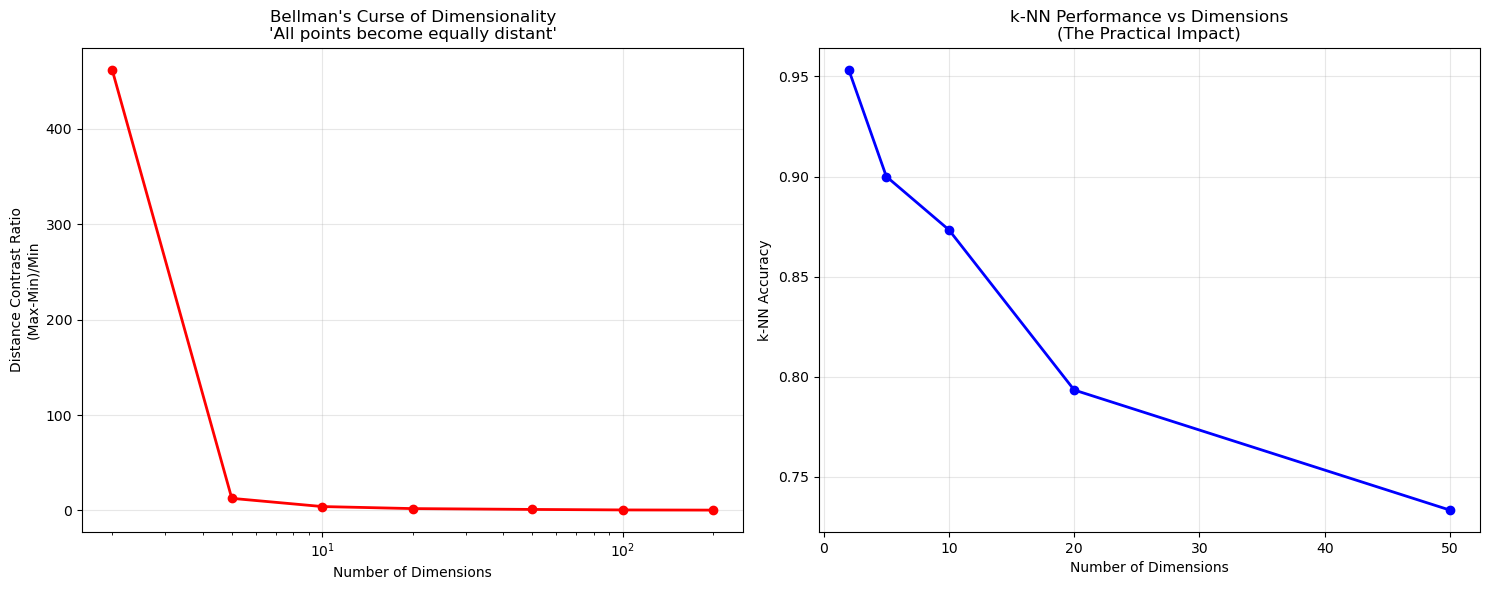


🔑 Bellman's Key Insight (1961):
• In high dimensions, the ratio (max_dist - min_dist)/min_dist → 0
• This means ALL points become 'equally distant'
• k-NN fails because nearest neighbors aren't actually 'near'
• This launched the field of dimensionality reduction!

🌳 Breiman's Tree Instability Analysis (1984)
Famous insight: 'Trees are high-variance estimators'
Training 100 trees on different bootstrap samples...

Breiman's Bias-Variance Analysis:
• Single Tree Average Accuracy: 0.626
• Single Tree Std Dev: 0.076
• Random Forest Accuracy: 0.660
• Variance Reduction: 0.076 → ~0


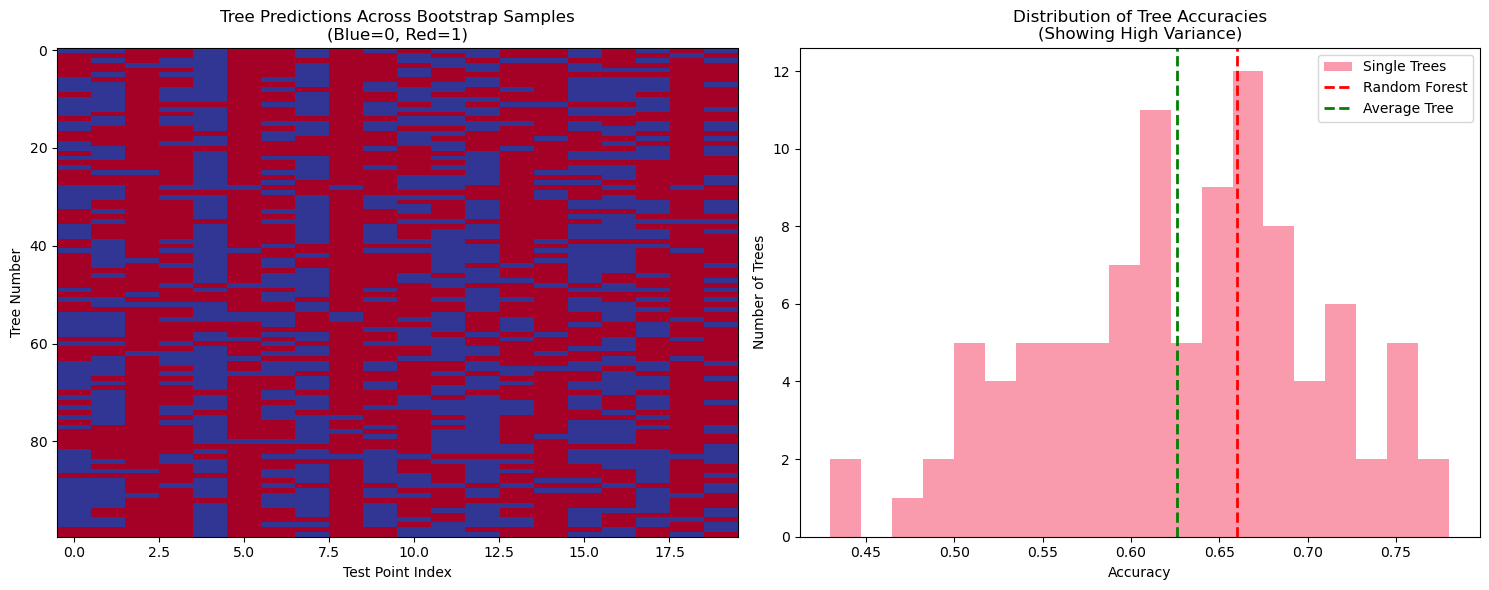


🔑 Breiman's Key Insights:
• Single trees are 'unstable' - small data changes → big tree changes
• This instability = high variance
• Random Forest reduces variance by averaging many trees
• This insight led to ensemble methods!

🧠 Minsky & Papert's Group Invariance (1969)
Famous insight: 'Perceptrons cannot compute group invariant predicates'
Testing connectivity detection:
• 8 patterns (9 pixels each)
• Task: Detect if white pixels are connected

Results:
• Perceptron accuracy: 1.000
• MLP accuracy: 1.000


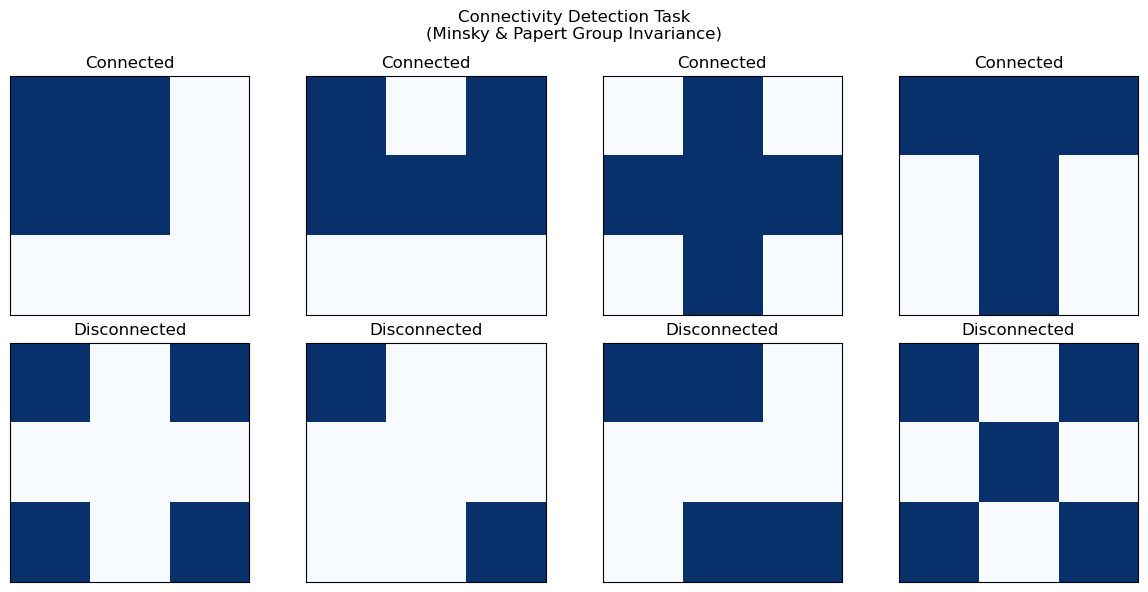


🔑 Minsky & Papert's Insight:
• Connectivity is 'group invariant' - depends on relationships, not positions
• Perceptrons can only compute 'local' properties of individual pixels
• Cannot compute 'global' properties like connectivity, convexity, etc.
• This goes deeper than just XOR - it's about fundamental computational limits


In [45]:
# %% [markdown]
# # Famous ML Experiments - Additional Educational Demonstrations

# %%
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
import pandas as pd

# %% [markdown]
# ## k-NN: Bellman's Curse of Dimensionality (1961)

# %%
def demonstrate_curse_of_dimensionality():
    """
    Recreate Bellman's famous curse of dimensionality demonstration.
    Shows how distance becomes meaningless in high dimensions.
    """
    print("🔮 Bellman's Curse of Dimensionality (1961)")
    print("=" * 50)
    print("Famous insight: 'In high dimensions, all points become equally distant'")
    
    np.random.seed(42)
    n_samples = 1000
    dimensions = [2, 5, 10, 20, 50, 100, 200]
    
    results = []
    
    for d in dimensions:
        # Generate random points in d-dimensional space
        data = np.random.uniform(-1, 1, (n_samples, d))
        
        # Calculate all pairwise distances
        distances = []
        for i in range(min(100, n_samples)):  # Sample to avoid memory issues
            for j in range(i+1, min(100, n_samples)):
                dist = np.linalg.norm(data[i] - data[j])
                distances.append(dist)
        
        distances = np.array(distances)
        
        # Calculate statistics
        min_dist = distances.min()
        max_dist = distances.max()
        mean_dist = distances.mean()
        std_dist = distances.std()
        
        # Key insight: ratio of (max-min)/min approaches 0
        contrast_ratio = (max_dist - min_dist) / min_dist
        
        results.append({
            'Dimensions': d,
            'Min Distance': min_dist,
            'Max Distance': max_dist,
            'Mean Distance': mean_dist,
            'Std Distance': std_dist,
            'Contrast Ratio': contrast_ratio
        })
        
        print(f"D={d:3d}: Min={min_dist:.3f}, Max={max_dist:.3f}, "
              f"Contrast={(max_dist-min_dist)/min_dist:.3f}")
    
    # Visualize the curse
    results_df = pd.DataFrame(results)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Distance contrast diminishes
    ax1.semilogx(results_df['Dimensions'], results_df['Contrast Ratio'], 'ro-', linewidth=2)
    ax1.set_xlabel('Number of Dimensions')
    ax1.set_ylabel('Distance Contrast Ratio\n(Max-Min)/Min')
    ax1.set_title("Bellman's Curse of Dimensionality\n'All points become equally distant'")
    ax1.grid(True, alpha=0.3)
    
    # k-NN performance degrades
    knn_accuracies = []
    for d in [2, 5, 10, 20, 50]:
        X, y = make_classification(n_samples=500, n_features=d, n_informative=min(d, 10),
                                  n_redundant=0, random_state=42)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        knn = KNeighborsClassifier(n_neighbors=5)
        knn.fit(X_train_scaled, y_train)
        accuracy = knn.score(X_test_scaled, y_test)
        knn_accuracies.append(accuracy)
    
    ax2.plot([2, 5, 10, 20, 50], knn_accuracies, 'bo-', linewidth=2)
    ax2.set_xlabel('Number of Dimensions')
    ax2.set_ylabel('k-NN Accuracy')
    ax2.set_title('k-NN Performance vs Dimensions\n(The Practical Impact)')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n🔑 Bellman's Key Insight (1961):")
    print(f"• In high dimensions, the ratio (max_dist - min_dist)/min_dist → 0")
    print(f"• This means ALL points become 'equally distant'")
    print(f"• k-NN fails because nearest neighbors aren't actually 'near'")
    print(f"• This launched the field of dimensionality reduction!")

demonstrate_curse_of_dimensionality()

# %% [markdown]
# ## Decision Trees: Breiman's Bias-Variance Analysis (1984)

# %%
def demonstrate_bias_variance_trees():
    """
    Demonstrate Breiman's famous bias-variance decomposition for trees.
    Shows instability of decision trees.
    """
    print("\n🌳 Breiman's Tree Instability Analysis (1984)")
    print("=" * 50)
    print("Famous insight: 'Trees are high-variance estimators'")
    
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    np.random.seed(42)
    
    # Create a simple dataset
    n_samples = 200
    X, y = make_classification(n_samples=n_samples, n_features=10, n_informative=5,
                              n_redundant=0, random_state=42)
    
    # Split into train/test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
    
    # Breiman's experiment: train many trees on bootstrap samples
    n_trees = 100
    tree_predictions = []
    
    print(f"Training {n_trees} trees on different bootstrap samples...")
    
    for i in range(n_trees):
        # Bootstrap sample
        indices = np.random.choice(len(X_train), len(X_train), replace=True)
        X_boot = X_train[indices]
        y_boot = y_train[indices]
        
        # Train tree
        tree = DecisionTreeClassifier(random_state=i, max_depth=10)
        tree.fit(X_boot, y_boot)
        
        # Predict on test set
        pred = tree.predict(X_test)
        tree_predictions.append(pred)
    
    tree_predictions = np.array(tree_predictions)
    
    # Calculate bias and variance for each test point
    true_labels = y_test
    mean_predictions = np.mean(tree_predictions, axis=0)
    
    # Variance: how much do predictions vary across different trees?
    prediction_variance = np.var(tree_predictions, axis=0)
    avg_variance = np.mean(prediction_variance)
    
    # Bias: how far is average prediction from truth?
    bias_squared = np.mean((mean_predictions - true_labels) ** 2)
    
    # Compare with Random Forest (Breiman's solution!)
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    rf_pred = rf.predict(X_test)
    rf_accuracy = np.mean(rf_pred == true_labels)
    
    # Single tree average accuracy
    tree_accuracies = [np.mean(pred == true_labels) for pred in tree_predictions]
    avg_tree_accuracy = np.mean(tree_accuracies)
    
    print(f"\nBreiman's Bias-Variance Analysis:")
    print(f"• Single Tree Average Accuracy: {avg_tree_accuracy:.3f}")
    print(f"• Single Tree Std Dev: {np.std(tree_accuracies):.3f}")
    print(f"• Random Forest Accuracy: {rf_accuracy:.3f}")
    print(f"• Variance Reduction: {np.std(tree_accuracies) - 0:.3f} → ~0")
    
    # Visualize prediction instability
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Show how predictions vary across trees for first 20 test points
    test_subset = tree_predictions[:, :20]
    ax1.imshow(test_subset, cmap='RdYlBu', aspect='auto')
    ax1.set_xlabel('Test Point Index')
    ax1.set_ylabel('Tree Number')
    ax1.set_title('Tree Predictions Across Bootstrap Samples\n(Blue=0, Red=1)')
    
    # Histogram of accuracies
    ax2.hist(tree_accuracies, bins=20, alpha=0.7, label='Single Trees')
    ax2.axvline(rf_accuracy, color='red', linestyle='--', linewidth=2, label='Random Forest')
    ax2.axvline(avg_tree_accuracy, color='green', linestyle='--', linewidth=2, label='Average Tree')
    ax2.set_xlabel('Accuracy')
    ax2.set_ylabel('Number of Trees')
    ax2.set_title('Distribution of Tree Accuracies\n(Showing High Variance)')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n🔑 Breiman's Key Insights:")
    print(f"• Single trees are 'unstable' - small data changes → big tree changes")
    print(f"• This instability = high variance")
    print(f"• Random Forest reduces variance by averaging many trees")
    print(f"• This insight led to ensemble methods!")

demonstrate_bias_variance_trees()

# %% [markdown]
# ## Perceptron: Minsky & Papert's Group Invariance (1969)

# %%
def demonstrate_group_invariance():
    """
    Demonstrate Minsky & Papert's group invariance theorem.
    Shows fundamental limitations beyond just XOR.
    """
    print("\n🧠 Minsky & Papert's Group Invariance (1969)")
    print("=" * 50)
    print("Famous insight: 'Perceptrons cannot compute group invariant predicates'")
    
    from sklearn.linear_model import Perceptron
    from sklearn.neural_network import MLPClassifier
    
    # Connectivity problem: "Is the figure connected?"
    def create_connectivity_problem():
        """Create patterns where connectivity is the key feature"""
        patterns = []
        labels = []
        
        # Connected patterns (label = 1)
        connected_patterns = [
            [[1, 1, 0], [1, 1, 0], [0, 0, 0]],  # 2x2 block
            [[1, 0, 1], [1, 1, 1], [0, 0, 0]],  # Connected L-shape
            [[0, 1, 0], [1, 1, 1], [0, 1, 0]],  # Cross
            [[1, 1, 1], [0, 1, 0], [0, 1, 0]],  # T-shape
        ]
        
        # Disconnected patterns (label = 0)  
        disconnected_patterns = [
            [[1, 0, 1], [0, 0, 0], [1, 0, 1]],  # Four corners
            [[1, 0, 0], [0, 0, 0], [0, 0, 1]],  # Two opposite corners
            [[1, 1, 0], [0, 0, 0], [0, 1, 1]],  # Two disconnected pairs
            [[1, 0, 1], [0, 1, 0], [1, 0, 1]],  # Checkerboard-like
        ]
        
        # Flatten patterns for ML algorithms
        for pattern in connected_patterns:
            patterns.append(np.array(pattern).flatten())
            labels.append(1)
            
        for pattern in disconnected_patterns:
            patterns.append(np.array(pattern).flatten())
            labels.append(0)
        
        return np.array(patterns), np.array(labels)
    
    X, y = create_connectivity_problem()
    
    print(f"Testing connectivity detection:")
    print(f"• {len(X)} patterns (9 pixels each)")
    print(f"• Task: Detect if white pixels are connected")
    
    # Test perceptron
    perceptron = Perceptron(max_iter=1000, random_state=42)
    perceptron.fit(X, y)
    perc_accuracy = perceptron.score(X, y)
    
    # Test MLP
    mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)
    mlp.fit(X, y)
    mlp_accuracy = mlp.score(X, y)
    
    print(f"\nResults:")
    print(f"• Perceptron accuracy: {perc_accuracy:.3f}")
    print(f"• MLP accuracy: {mlp_accuracy:.3f}")
    
    # Visualize some patterns
    fig, axes = plt.subplots(2, 4, figsize=(12, 6))
    
    for i in range(8):
        ax = axes[i // 4, i % 4]
        pattern = X[i].reshape(3, 3)
        ax.imshow(pattern, cmap='Blues')
        ax.set_title(f'{"Connected" if y[i] else "Disconnected"}')
        ax.set_xticks([])
        ax.set_yticks([])
    
    plt.suptitle('Connectivity Detection Task\n(Minsky & Papert Group Invariance)')
    plt.tight_layout()
    plt.show()
    
    print(f"\n🔑 Minsky & Papert's Insight:")
    print(f"• Connectivity is 'group invariant' - depends on relationships, not positions")
    print(f"• Perceptrons can only compute 'local' properties of individual pixels")
    print(f"• Cannot compute 'global' properties like connectivity, convexity, etc.")
    print(f"• This goes deeper than just XOR - it's about fundamental computational limits")

demonstrate_group_invariance()